# 국민건강보험공단 질병 예측 정보

## 라이브러리 불러오기

날짜별

In [28]:
import pandas as pd
import seaborn as sns

## 데이터 불러오기

In [29]:
df_trial_1 = pd.read_csv("시도 지역코드.csv", encoding="cp949")
df_trial_2 = pd.read_csv("실제진료정보_감기_시도.csv", encoding="cp949")
df_trial_3 = pd.read_csv("실제진료정보_눈병_시도.csv", encoding="cp949")
df_trial_4 = pd.read_csv("실제진료정보_천식_시도.csv", encoding="cp949")
df_trial_5 = pd.read_csv("실제진료정보_피부염_시도.csv", encoding="cp949")
df_trial_2.tail

<bound method NDFrame.tail of              날짜  시도지역코드  발생건수(건)
0      20140101      11     5992
1      20140101      26     3158
2      20140101      27     2190
3      20140101      28     3426
4      20140101      29     2635
...         ...     ...      ...
41900  20200930      46     3436
41901  20200930      47     4081
41902  20200930      48     4881
41903  20200930      49     1364
41904  20200930      99    61493

[41905 rows x 3 columns]>

In [30]:
df_trial_2

,날짜,시도지역코드,발생건수(건)
0,20140101,11,5992
1,20140101,26,3158
2,20140101,27,2190
3,20140101,28,3426
4,20140101,29,2635
...,...,...,...
41900,20200930,46,3436
41901,20200930,47,4081
41902,20200930,48,4881
41903,20200930,49,1364


# 데이터 전처리 작업

## 전국 데이터 삭제

In [31]:
drop_sample_1 = df_trial_2[df_trial_2["시도지역코드"] == 99].index
drop_sample_2 = df_trial_3[df_trial_3["시도지역코드"] == 99].index
drop_sample_3 = df_trial_4[df_trial_4["시도지역코드"] == 99].index
drop_sample_4 = df_trial_5[df_trial_5["시도지역코드"] == 99].index

In [32]:
df_trial_2 = df_trial_2.drop(drop_sample_1).copy()
df_trial_3 = df_trial_3.drop(drop_sample_2).copy()
df_trial_4 = df_trial_4.drop(drop_sample_3).copy()
df_trial_5 = df_trial_5.drop(drop_sample_4).copy()

In [33]:
df_trial_2[df_trial_2["시도지역코드"] == 99]

,날짜,시도지역코드,발생건수(건)


## 날짜 데이터 수정

In [34]:
df_trial_2["날짜"] = df_trial_2["날짜"].astype("str")
df_trial_3["날짜"] = df_trial_3["날짜"].astype("str")
df_trial_4["날짜"] = df_trial_4["날짜"].astype("str")
df_trial_5["날짜"] = df_trial_5["날짜"].astype("str")

In [35]:
df_trial_2["날짜"] = pd.to_datetime(df_trial_2["날짜"])
df_trial_3["날짜"] = pd.to_datetime(df_trial_3["날짜"])
df_trial_4["날짜"] = pd.to_datetime(df_trial_4["날짜"])
df_trial_5["날짜"] = pd.to_datetime(df_trial_5["날짜"])

In [36]:
df_trial_2["날짜"]

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
41899   2020-09-30
41900   2020-09-30
41901   2020-09-30
41902   2020-09-30
41903   2020-09-30
Name: 날짜, Length: 39440, dtype: datetime64[ns]

In [37]:
df_trial_2["연도"] = df_trial_2["날짜"].dt.year
df_trial_3["연도"] = df_trial_3["날짜"].dt.year
df_trial_4["연도"] = df_trial_4["날짜"].dt.year
df_trial_5["연도"] = df_trial_5["날짜"].dt.year

In [38]:
df_trial_2

,날짜,시도지역코드,발생건수(건),연도
0,2014-01-01,11,5992,2014
1,2014-01-01,26,3158,2014
2,2014-01-01,27,2190,2014
3,2014-01-01,28,3426,2014
4,2014-01-01,29,2635,2014
...,...,...,...,...
41899,2020-09-30,45,3483,2020
41900,2020-09-30,46,3436,2020
41901,2020-09-30,47,4081,2020
41902,2020-09-30,48,4881,2020


# 새로운 데이터 생성

## 연도별 지역 데이터 생성

In [39]:
df_year_trial_1 = df_trial_2.copy()
df_year_trial_2 = df_trial_3.copy()
df_year_trial_3 = df_trial_4.copy()
df_year_trial_4 = df_trial_5.copy()

In [40]:
df_year_trial_1["시도지역코드"] = df_year_trial_1["시도지역코드"].astype("str").copy()
df_year_trial_2["시도지역코드"] = df_year_trial_2["시도지역코드"].astype("str").copy()
df_year_trial_3["시도지역코드"] = df_year_trial_3["시도지역코드"].astype("str").copy()
df_year_trial_4["시도지역코드"] = df_year_trial_4["시도지역코드"].astype("str").copy()

In [41]:
df_year_trial_1["시도지역코드"]

0        11
1        26
2        27
3        28
4        29
         ..
41899    45
41900    46
41901    47
41902    48
41903    49
Name: 시도지역코드, Length: 39440, dtype: object

In [42]:
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [43]:
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [44]:
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [45]:
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [46]:
df_year_trial_1 = df_year_trial_1.drop("시도지역코드", axis=1).copy()
df_year_trial_2 = df_year_trial_2.drop("시도지역코드", axis=1).copy()
df_year_trial_3 = df_year_trial_3.drop("시도지역코드", axis=1).copy()
df_year_trial_4 = df_year_trial_4.drop("시도지역코드", axis=1).copy()

In [47]:
df_year_trial_1.columns = ["날짜", "감기발생건수", "연도", "시도명"]
df_year_trial_2.columns = ["날짜", "눈병발생건수", "연도", "시도명"]
df_year_trial_3.columns = ["날짜", "천식발생건수", "연도", "시도명"]
df_year_trial_4.columns = ["날짜", "피부염발생건수", "연도", "시도명"]

In [48]:
df_year_trial = pd.merge(df_year_trial_1, df_year_trial_2)
df_year_trial = pd.merge(df_year_trial, df_year_trial_3)
df_year_trial = pd.merge(df_year_trial, df_year_trial_4)

In [49]:
df_year_trial = df_year_trial.reindex(columns=["날짜", "시도명", "연도", "감기발생건수", "눈병발생건수", "천식발생건수", "피부염발생건수"])

In [50]:
df_year_trial = df_year_trial.drop("날짜", axis=1)

In [51]:
df_year_trial[df_year_trial["연도"] == 2014]

,시도명,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,서울특별시,2014,5992,247,715,246
1,부산광역시,2014,3158,91,554,138
2,대구광역시,2014,2190,96,370,85
3,인천광역시,2014,3426,83,437,138
4,광주광역시,2014,2635,57,480,81
...,...,...,...,...,...,...
5835,전라북도,2014,19756,1899,2091,1751
5836,전라남도,2014,20409,1417,2585,2331
5837,경상북도,2014,23727,2147,2601,2666
5838,경상남도,2014,35631,2497,3531,3805


In [52]:
df_year_2014 = df_year_trial[df_year_trial["연도"] == 2014]

In [53]:
df_year_2014

,시도명,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,서울특별시,2014,5992,247,715,246
1,부산광역시,2014,3158,91,554,138
2,대구광역시,2014,2190,96,370,85
3,인천광역시,2014,3426,83,437,138
4,광주광역시,2014,2635,57,480,81
...,...,...,...,...,...,...
5835,전라북도,2014,19756,1899,2091,1751
5836,전라남도,2014,20409,1417,2585,2331
5837,경상북도,2014,23727,2147,2601,2666
5838,경상남도,2014,35631,2497,3531,3805


## 연도별 전국 데이터 생성

In [54]:
df_year_sample_1 = df_trial_2.groupby('연도').sum().copy()
df_year_sample_2 = df_trial_3.groupby('연도').sum().copy()
df_year_sample_3 = df_trial_4.groupby('연도').sum().copy()
df_year_sample_4 = df_trial_5.groupby('연도').sum().copy()

In [55]:
df_year_sample_1 = df_year_sample_1.drop("시도지역코드", axis=1).copy()
df_year_sample_2 = df_year_sample_2.drop("시도지역코드", axis=1).copy()
df_year_sample_3 = df_year_sample_3.drop("시도지역코드", axis=1).copy()
df_year_sample_4 = df_year_sample_4.drop("시도지역코드", axis=1).copy()

In [56]:
df_year_sample_1 = df_year_sample_1.reset_index()
df_year_sample_2 = df_year_sample_2.reset_index()
df_year_sample_3 = df_year_sample_3.reset_index()
df_year_sample_4 = df_year_sample_4.reset_index()

In [57]:
df_year_sample_1

,연도,발생건수(건)
0,2014,135466305
1,2015,128084258
2,2016,137509780
3,2017,162224708
4,2018,164529730
5,2019,157428403
6,2020,63623431


In [58]:
df_year_sample_1.columns = ["연도", "감기발생건수"]
df_year_sample_2.columns = ["연도", "눈병발생건수"]
df_year_sample_3.columns = ["연도", "천식발생건수"]
df_year_sample_4.columns = ["연도", "피부염발생건수"]

In [59]:
df_year = pd.merge(df_year_sample_1, df_year_sample_2, on="연도")
df_year = pd.merge(df_year, df_year_sample_3, on="연도")
df_year = pd.merge(df_year, df_year_sample_4, on="연도")

In [60]:
df_year

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,135466305,11921225,12659559,17885560
1,2015,128084258,12031557,11581754,17499544
2,2016,137509780,13040941,11206233,17973764
3,2017,162224708,12990778,9969097,17998541
4,2018,164529730,13611587,9752976,18004406
5,2019,157428403,13068638,9133599,18347602
6,2020,63623431,8411730,4095346,13455577


## 지역별 통합 데이터 생성

In [61]:
df_trial_sample_1 = df_trial_2.groupby('시도지역코드').sum().copy()
df_trial_sample_2 = df_trial_3.groupby('시도지역코드').sum().copy()
df_trial_sample_3 = df_trial_4.groupby('시도지역코드').sum().copy()
df_trial_sample_4 = df_trial_5.groupby('시도지역코드').sum().copy()

In [62]:
df_trial_sample_1 = df_trial_sample_1.drop("연도", axis=1).copy()
df_trial_sample_2 = df_trial_sample_2.drop("연도", axis=1).copy()
df_trial_sample_3 = df_trial_sample_3.drop("연도", axis=1).copy()
df_trial_sample_4 = df_trial_sample_4.drop("연도", axis=1).copy()

In [63]:
df_trial_sample_1 = df_trial_sample_1.reset_index()
df_trial_sample_2 = df_trial_sample_2.reset_index()
df_trial_sample_3 = df_trial_sample_3.reset_index()
df_trial_sample_4 = df_trial_sample_4.reset_index()

In [64]:
df_trial_1.columns = ["시도지역코드", "지역명"]
df_trial_sample_1.columns = ["시도지역코드", "감기발생건수"]
df_trial_sample_2.columns = ["시도지역코드", "눈병발생건수"]
df_trial_sample_3.columns = ["시도지역코드", "천식발생건수"]
df_trial_sample_4.columns = ["시도지역코드", "피부염발생건수"]

In [65]:
df_trial = pd.merge(df_trial_1, df_trial_sample_1, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_2, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_3, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_4, on="시도지역코드")

In [66]:
df_trial = df_trial.drop("시도지역코드", axis=1).copy()

In [67]:
df_trial

,지역명,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,서울,170464870,16610150,11108621,21893363
1,부산,63835551,5503428,4310242,8121998
2,대구,44043032,4726490,3360899,6379775
3,인천,54165022,3959952,3958381,7020314
4,광주,27168330,2101182,2427172,3471529
5,대전,30827062,2701921,1894720,3811543
6,울산,23523342,1602715,1639666,2529908
7,경기,246310306,20014677,15087142,27800130
8,강원,24123843,2394625,1778736,3620094
9,충북,29090805,2606803,2467290,3967795


## 지역별 연도 데이터 생성

### 서울특별시 연도별 데이터 생성

In [68]:
df_seoul = df_year_trial[df_year_trial["시도명"] == "서울특별시"]

In [69]:
df_seoul = df_seoul.groupby("연도").sum().copy()

In [70]:
df_seoul = df_seoul.reset_index()

In [71]:
df_seoul

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,25181240,2387303,2084784,3289651
1,2015,22998860,2359266,1834586,3192673
2,2016,25052538,2566958,1854646,3262586
3,2017,29119008,2564717,1643558,3268126
4,2018,29053296,2616547,1579385,3238907
5,2019,28118619,2500100,1475981,3269828
6,2020,10941309,1615259,635681,2371592


### 경기도 연도별 데이터 생성

In [72]:
df_gyunggi = df_year_trial[df_year_trial["시도명"] == "경기도"]

In [73]:
df_gyunggi = df_gyunggi.groupby("연도").sum().copy()

In [74]:
df_gyunggi = df_gyunggi.reset_index()

In [75]:
df_gyunggi

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,34234055,2740496,2836057,4015181
1,2015,31875730,2713670,2487696,3906719
2,2016,35614507,2997364,2456331,4067153
3,2017,42181384,3033000,2158667,4163678
4,2018,43311433,3284870,2160369,4203393
5,2019,42594140,3187807,2080944,4296598
6,2020,16499057,2057470,907078,3147408


### 부산광역시 연도별 데이터 생성

In [76]:
df_busan = df_year_trial[df_year_trial["시도명"] == "부산광역시"]

In [77]:
df_busan = df_busan.groupby("연도").sum().copy()

In [78]:
df_busan = df_busan.reset_index()

In [79]:
df_busan

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,9228054,793134,770710,1212956
1,2015,9057452,810046,743546,1177153
2,2016,9132235,849563,699079,1196844
3,2017,10988141,830821,630975,1197107
4,2018,10963065,868901,613075,1182773
5,2019,10295662,823027,578957,1231269
6,2020,4170942,527936,273900,923896


### 대구광역시 연도별 데이터 생성

In [80]:
df_daegu = df_year_trial[df_year_trial["시도명"] == "대구광역시"]

In [81]:
df_daegu = df_daegu.groupby("연도").sum().copy()

In [82]:
df_daegu = df_daegu.reset_index()

In [83]:
df_daegu

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,6357009,672078,676753,958217
1,2015,6012788,663251,622038,934139
2,2016,6419779,736998,559564,942711
3,2017,7501913,705692,465734,951459
4,2018,7755437,735022,459827,948158
5,2019,7192822,742764,406011,961995
6,2020,2803284,470685,170972,683096


### 인천광역시 연도별 데이터 생성

In [84]:
df_incheon = df_year_trial[df_year_trial["시도명"] == "대구광역시"]

In [85]:
df_incheon = df_incheon.groupby("연도").sum().copy()

In [86]:
df_incheon = df_incheon.reset_index()

In [87]:
df_incheon

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,6357009,672078,676753,958217
1,2015,6012788,663251,622038,934139
2,2016,6419779,736998,559564,942711
3,2017,7501913,705692,465734,951459
4,2018,7755437,735022,459827,948158
5,2019,7192822,742764,406011,961995
6,2020,2803284,470685,170972,683096


### 광주광역시 연도별 데이터 생성

In [88]:
df_gwangju = df_year_trial[df_year_trial["시도명"] == "광주광역시"]

In [89]:
df_gwangju = df_gwangju.groupby("연도").sum().copy()

In [90]:
df_gwangju = df_gwangju.reset_index()

In [91]:
df_gwangju

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,3911135,294134,480552,528365
1,2015,3694027,311052,397974,520631
2,2016,3854654,303870,376768,516332
3,2017,4735046,317693,369284,514201
4,2018,4634741,322844,348585,509611
5,2019,4538672,342227,318330,508291
6,2020,1800055,209362,135679,374098


### 대전광역시 연도별 데이터 생성

In [92]:
df_daejeon = df_year_trial[df_year_trial["시도명"] == "대전광역시"]

In [93]:
df_daejeon = df_daejeon.groupby("연도").sum().copy()

In [94]:
df_daejeon = df_daejeon.reset_index()

In [95]:
df_daejeon

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,4582940,372048,356351,571483
1,2015,4245649,382367,319021,552986
2,2016,4512590,420285,321525,565598
3,2017,5224901,417724,273997,564675
4,2018,5272015,447562,271508,566538
5,2019,4924686,402674,244878,572908
6,2020,2064281,259261,107440,417355


### 울산광역시 연도별 데이터 생성

In [96]:
df_ulsan = df_year_trial[df_year_trial["시도명"] == "울산광역시"]

In [97]:
df_ulsan = df_ulsan.groupby("연도").sum().copy()

In [98]:
df_ulsan = df_ulsan.reset_index()

In [99]:
df_ulsan

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,3387202,236332,304245,380657
1,2015,3382120,228264,287743,373428
2,2016,3404453,263001,276980,380640
3,2017,4024077,234075,235986,370260
4,2018,4034273,255791,232416,365005
5,2019,3772940,236811,215312,375509
6,2020,1518277,148441,86984,284409


### 강원도 연도별 데이터 생성

In [100]:
df_gangwon = df_year_trial[df_year_trial["시도명"] == "강원도"]

In [101]:
df_gangwon = df_gangwon.groupby("연도").sum().copy()

In [102]:
df_gangwon = df_gangwon.reset_index()

In [103]:
df_gangwon

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,3403894,349085,324395,569425
1,2015,3233337,354477,299499,541042
2,2016,3568643,374173,287942,550515
3,2017,4135323,370080,256854,528715
4,2018,4156894,368042,245033,527296
5,2019,3906792,350108,241254,520312
6,2020,1718960,228660,123759,382789


### 충청북도 연도별 데이터 생성

In [104]:
df_ccbuk = df_year_trial[df_year_trial["시도명"] == "충청북도"]

In [105]:
df_ccbuk = df_ccbuk.groupby("연도").sum().copy()

In [106]:
df_ccbuk = df_ccbuk.reset_index()

In [107]:
df_ccbuk

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,4036524,373220,443736,575710
1,2015,3870295,391031,436049,554498
2,2016,4226281,396379,420398,591300
3,2017,4979159,385858,367388,595397
4,2018,5095554,425118,344500,594833
5,2019,4798207,383562,320343,605792
6,2020,2084785,251635,134876,450265


### 충청남도 연도별 데이터 생성

In [108]:
df_ccnam = df_year_trial[df_year_trial["시도명"] == "충청남도"]

In [109]:
df_ccnam = df_ccnam.groupby("연도").sum().copy()

In [110]:
df_ccnam = df_ccnam.reset_index()

In [111]:
df_ccnam

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,6108240,507928,612424,794184
1,2015,6041245,541233,611059,795455
2,2016,6525453,600485,638439,832431
3,2017,7669121,613107,602614,839911
4,2018,8043470,662228,587064,848591
5,2019,7772625,641383,558572,881710
6,2020,3322738,405834,246522,646954


### 전라북도 연도별 데이터 생성

In [112]:
df_jlbuk = df_year_trial[df_year_trial["시도명"] == "전라북도"]

In [113]:
df_jlbuk = df_jlbuk.groupby("연도").sum().copy()

In [114]:
df_jlbuk = df_jlbuk.reset_index()

In [115]:
df_jlbuk

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,5196626,557717,568473,647885
1,2015,4969892,549154,536898,652904
2,2016,5228148,578653,490538,658964
3,2017,6043878,565434,452405,652711
4,2018,6006829,579766,429982,670977
5,2019,5630521,594383,397273,675677
6,2020,2573186,400438,205556,511073


### 전라남도 연도별 데이터 생성

In [116]:
df_jlnam = df_year_trial[df_year_trial["시도명"] == "전라남도"]

In [117]:
df_jlnam = df_jlnam.groupby("연도").sum().copy()

In [118]:
df_jlnam = df_jlnam.reset_index()

In [119]:
df_jlnam

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,5078617,439074,647073,816028
1,2015,5015809,461190,597829,819006
2,2016,5121477,479917,543778,829077
3,2017,5908841,505311,500171,812241
4,2018,5915712,511760,497643,806650
5,2019,5534858,487816,480942,814715
6,2020,2477335,322213,240556,606640


### 경상북도 연도별 데이터 생성

In [120]:
df_gsbuk = df_year_trial[df_year_trial["시도명"] == "경상북도"]

In [121]:
df_gsbuk = df_gsbuk.groupby("연도").sum().copy()

In [122]:
df_gsbuk = df_gsbuk.reset_index()

In [123]:
df_gsbuk

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,6649389,702356,758648,1010215
1,2015,6278099,714684,719032,987935
2,2016,6673977,763173,672988,1024525
3,2017,7695048,753229,560325,1011615
4,2018,7985126,764631,567152,1004289
5,2019,7310878,714460,524478,1005958
6,2020,3078380,440891,240359,718592


### 경상남도 연도별 데이터 생성

In [124]:
df_gsnam = df_year_trial[df_year_trial["시도명"] == "경상남도"]

In [125]:
df_gsnam = df_gsnam.groupby("연도").sum().copy()

In [126]:
df_gsnam = df_gsnam.reset_index()

In [127]:
df_gsnam

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,8683546,781848,874297,1301027
1,2015,8584387,836418,891663,1288346
2,2016,8701798,884760,798566,1311105
3,2017,10435180,863811,722269,1269470
4,2018,10633594,897043,713311,1271303
5,2019,9874139,854640,641916,1306236
6,2020,4086283,547727,302128,969412


### 제주특별차지도 연도별 데이터 생성

In [128]:
df_jeju = df_year_trial[df_year_trial["시도명"] == "제주특별자치도"]

In [129]:
df_jeju = df_jeju.groupby("연도").sum().copy()

In [130]:
df_jeju = df_jeju.reset_index()

In [131]:
df_jeju

,연도,감기발생건수,눈병발생건수,천식발생건수,피부염발생건수
0,2014,1672147,174391,152346,195746
1,2015,1666706,174705,145077,203276
2,2016,1697080,211323,149858,214386
3,2017,2119600,208569,136778,212175
4,2018,2197118,218955,145068,220123
5,2019,2106615,198482,136542,233211
6,2020,1000741,143393,67083,175816


# 시각화

In [132]:
import matplotlib.pyplot as plt
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [133]:
plt.rc('font', family="Malgun Gothic")

## 연도별 전국 데이터

### 2014년 전국 데이터

<AxesSubplot:title={'center':'2014년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

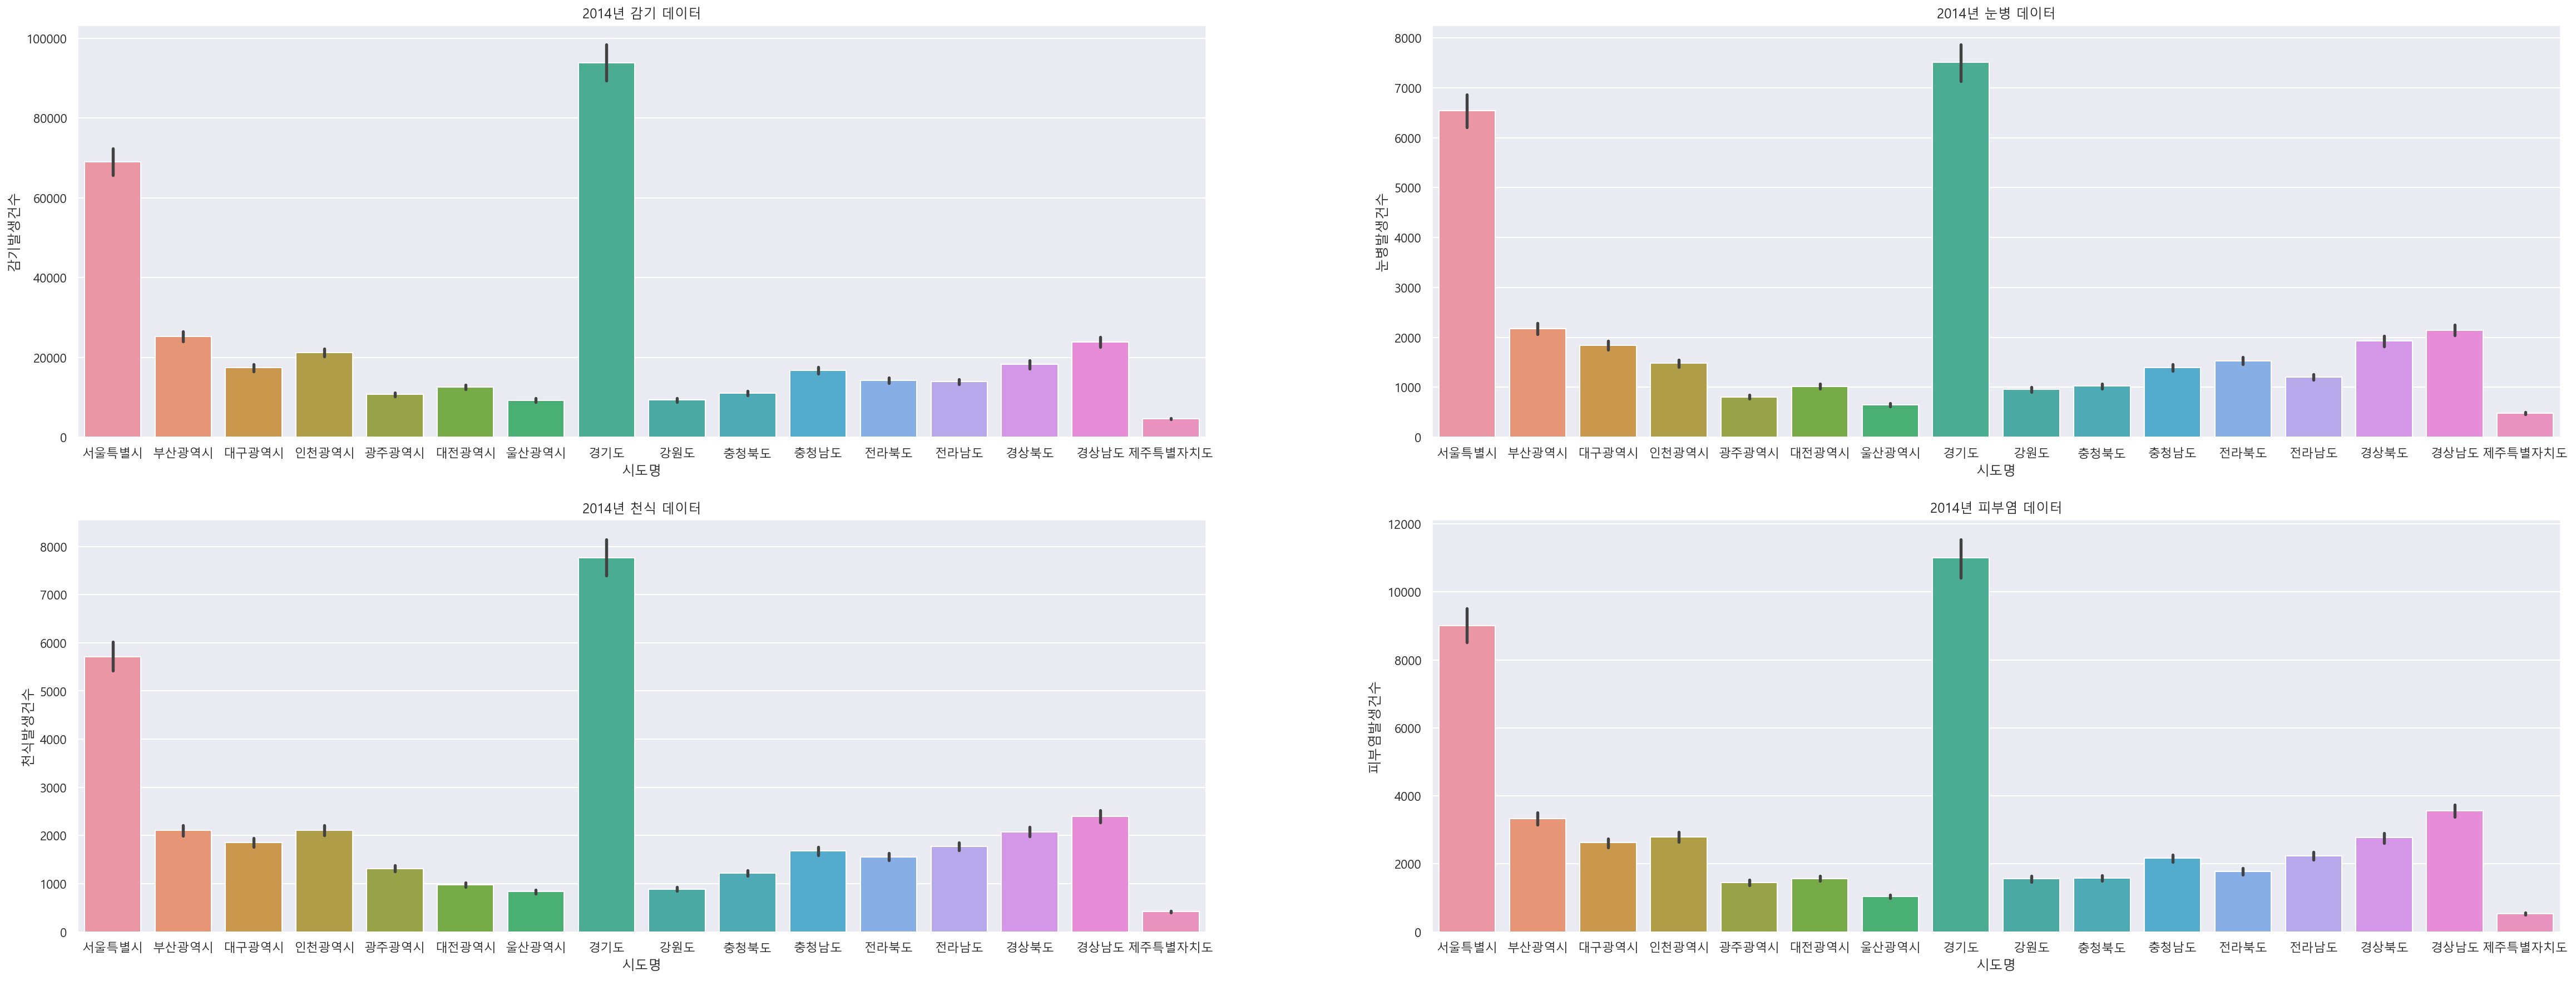

In [134]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2014년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2014년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2014년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2014년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2014년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

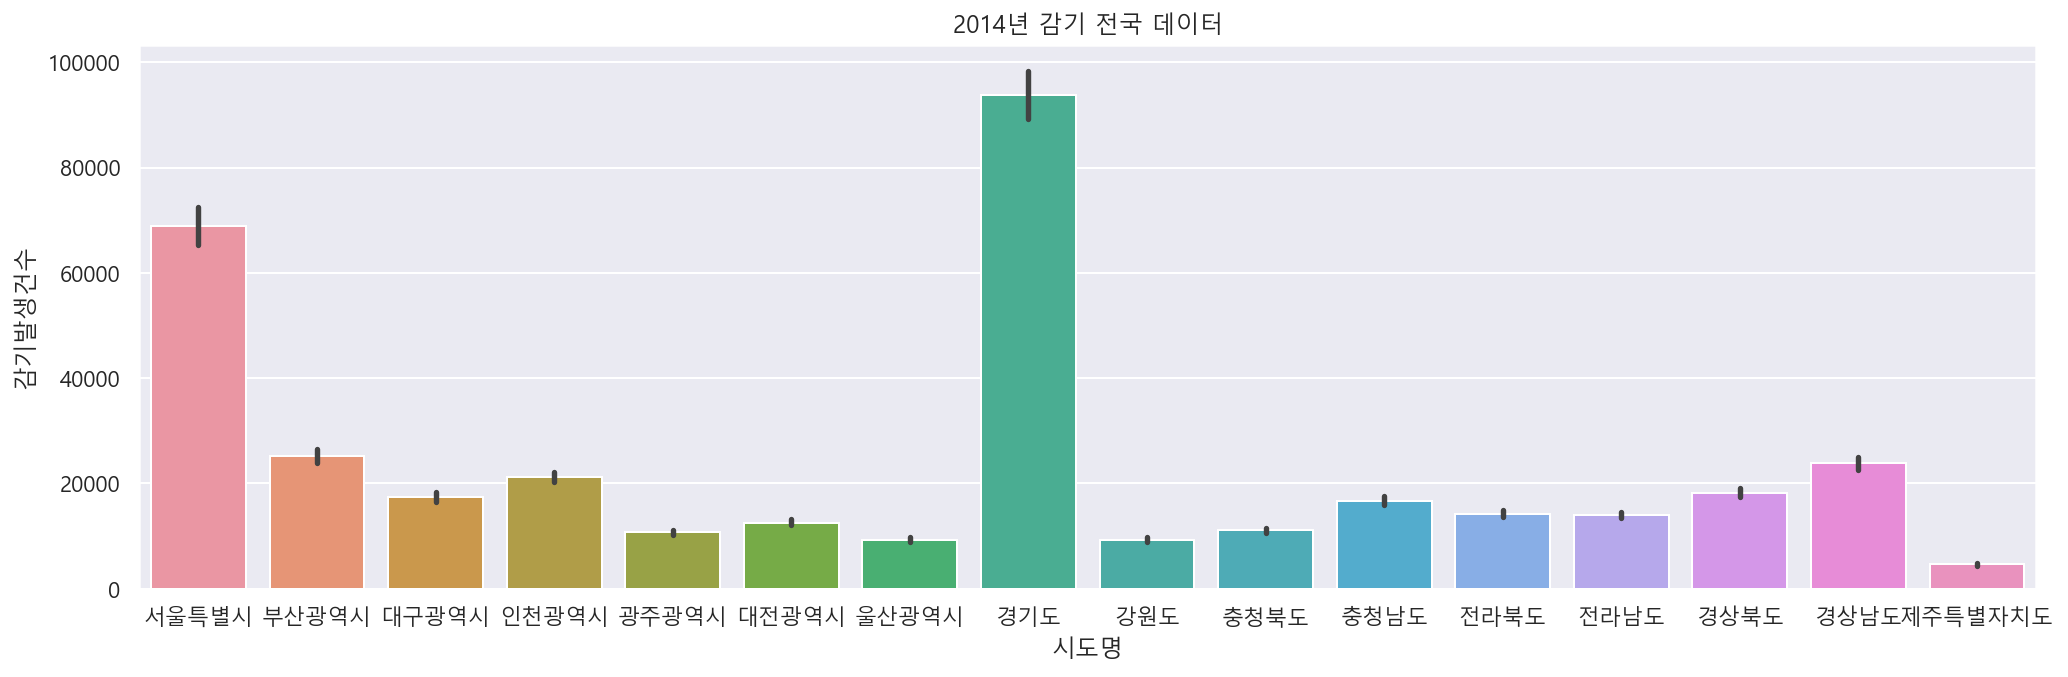

In [135]:
plt.figure(figsize=(17, 5))
plt.title("2014년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2014년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

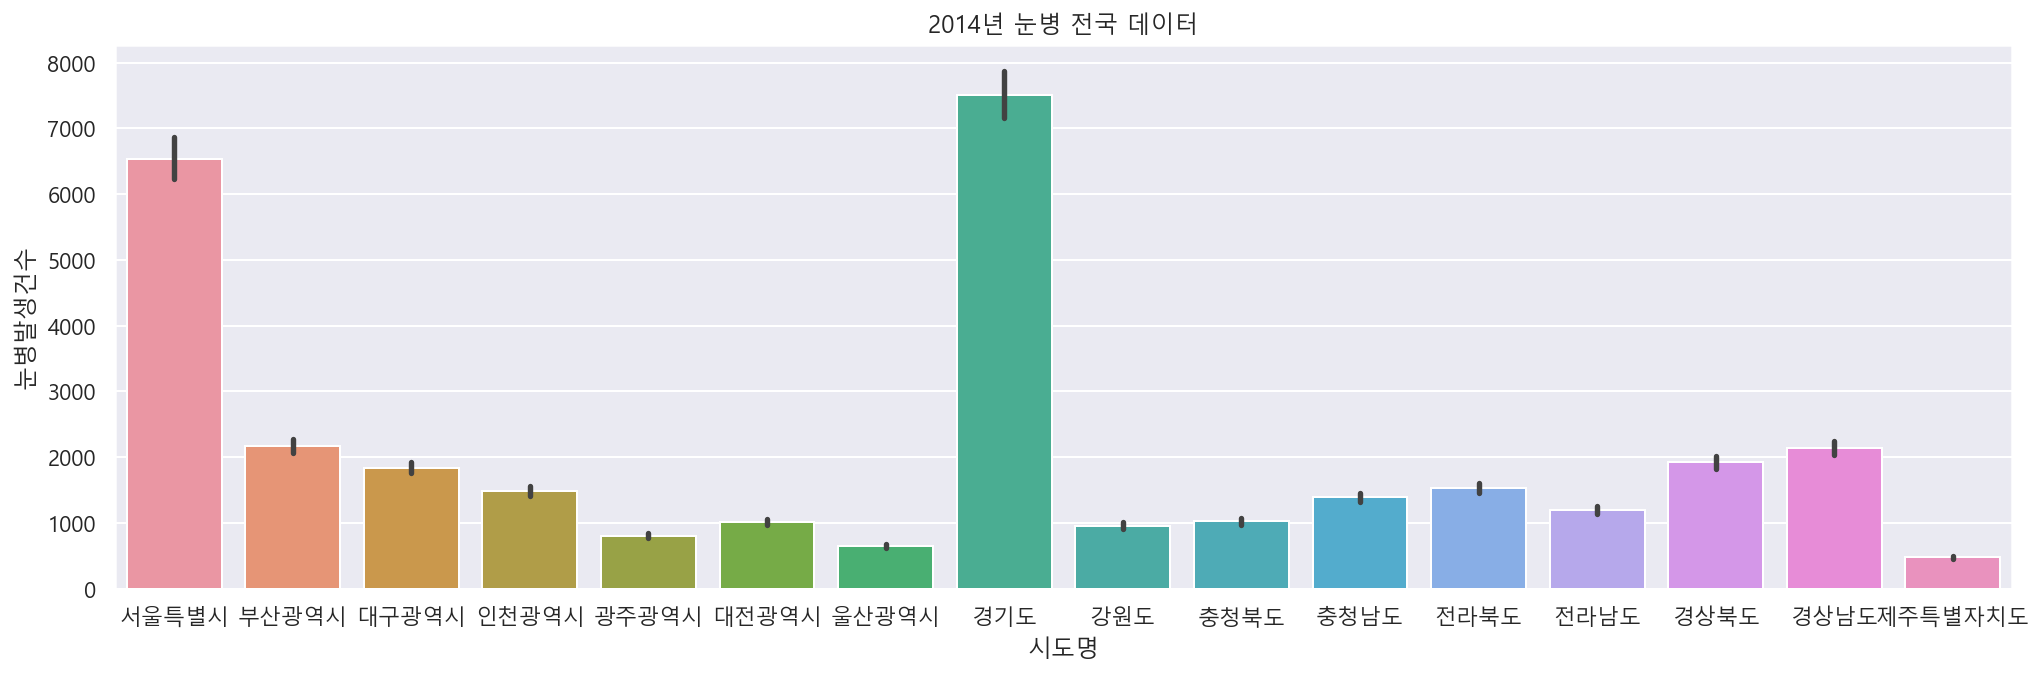

In [136]:
plt.figure(figsize=(17, 5))
plt.title("2014년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2014년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

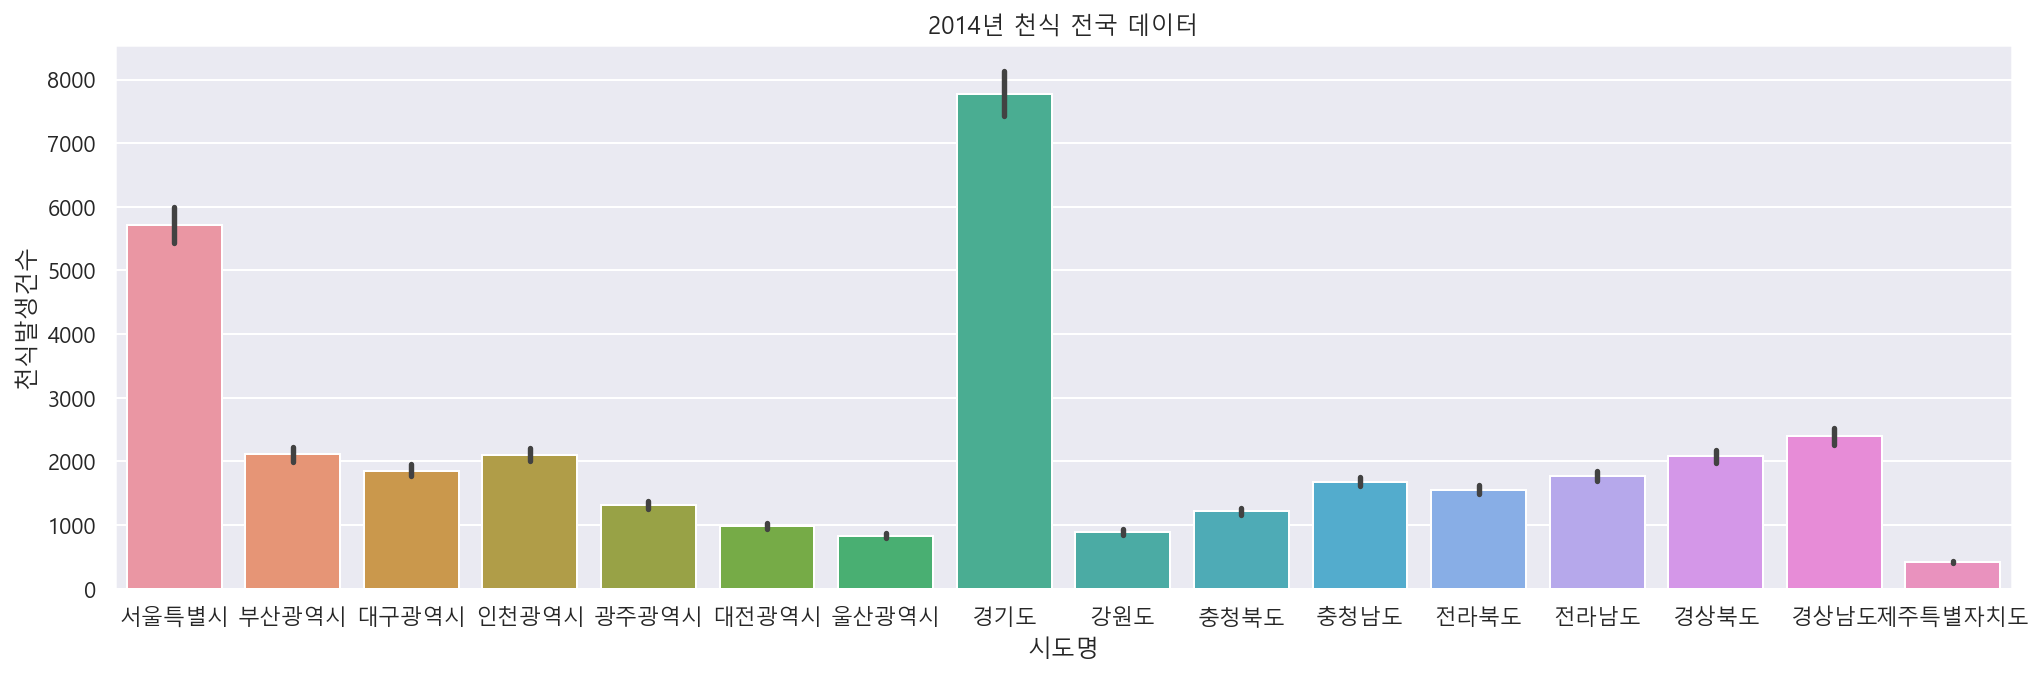

In [137]:
plt.figure(figsize=(17, 5))
plt.title("2014년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2014년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

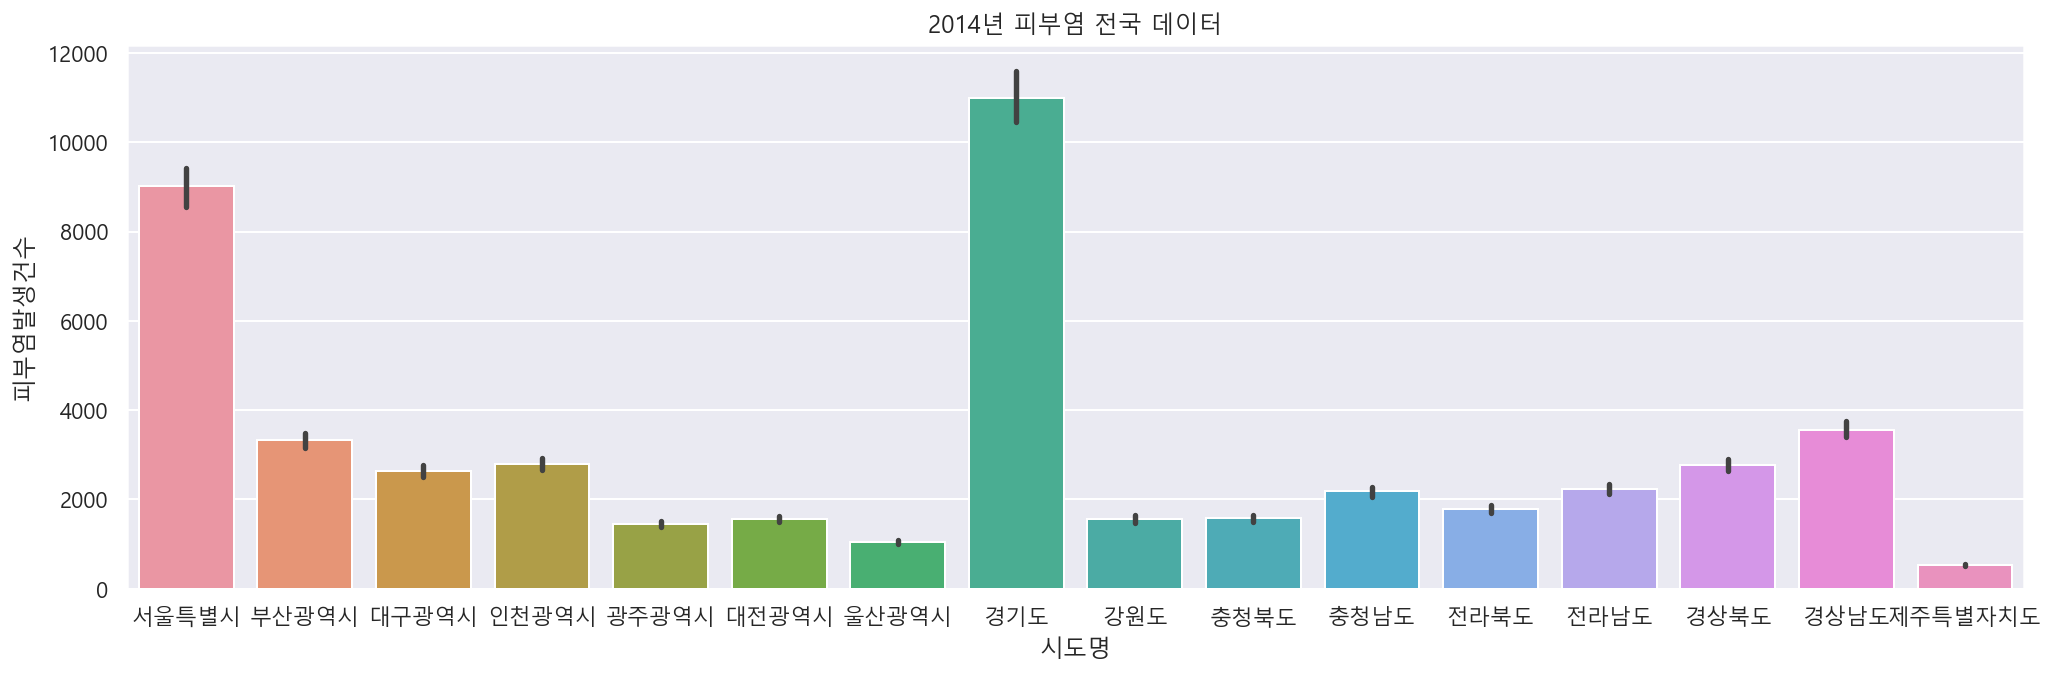

In [138]:
plt.figure(figsize=(17, 5))
plt.title("2014년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="피부염발생건수")

### 2015년 전국 데이터

<AxesSubplot:title={'center':'2015년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

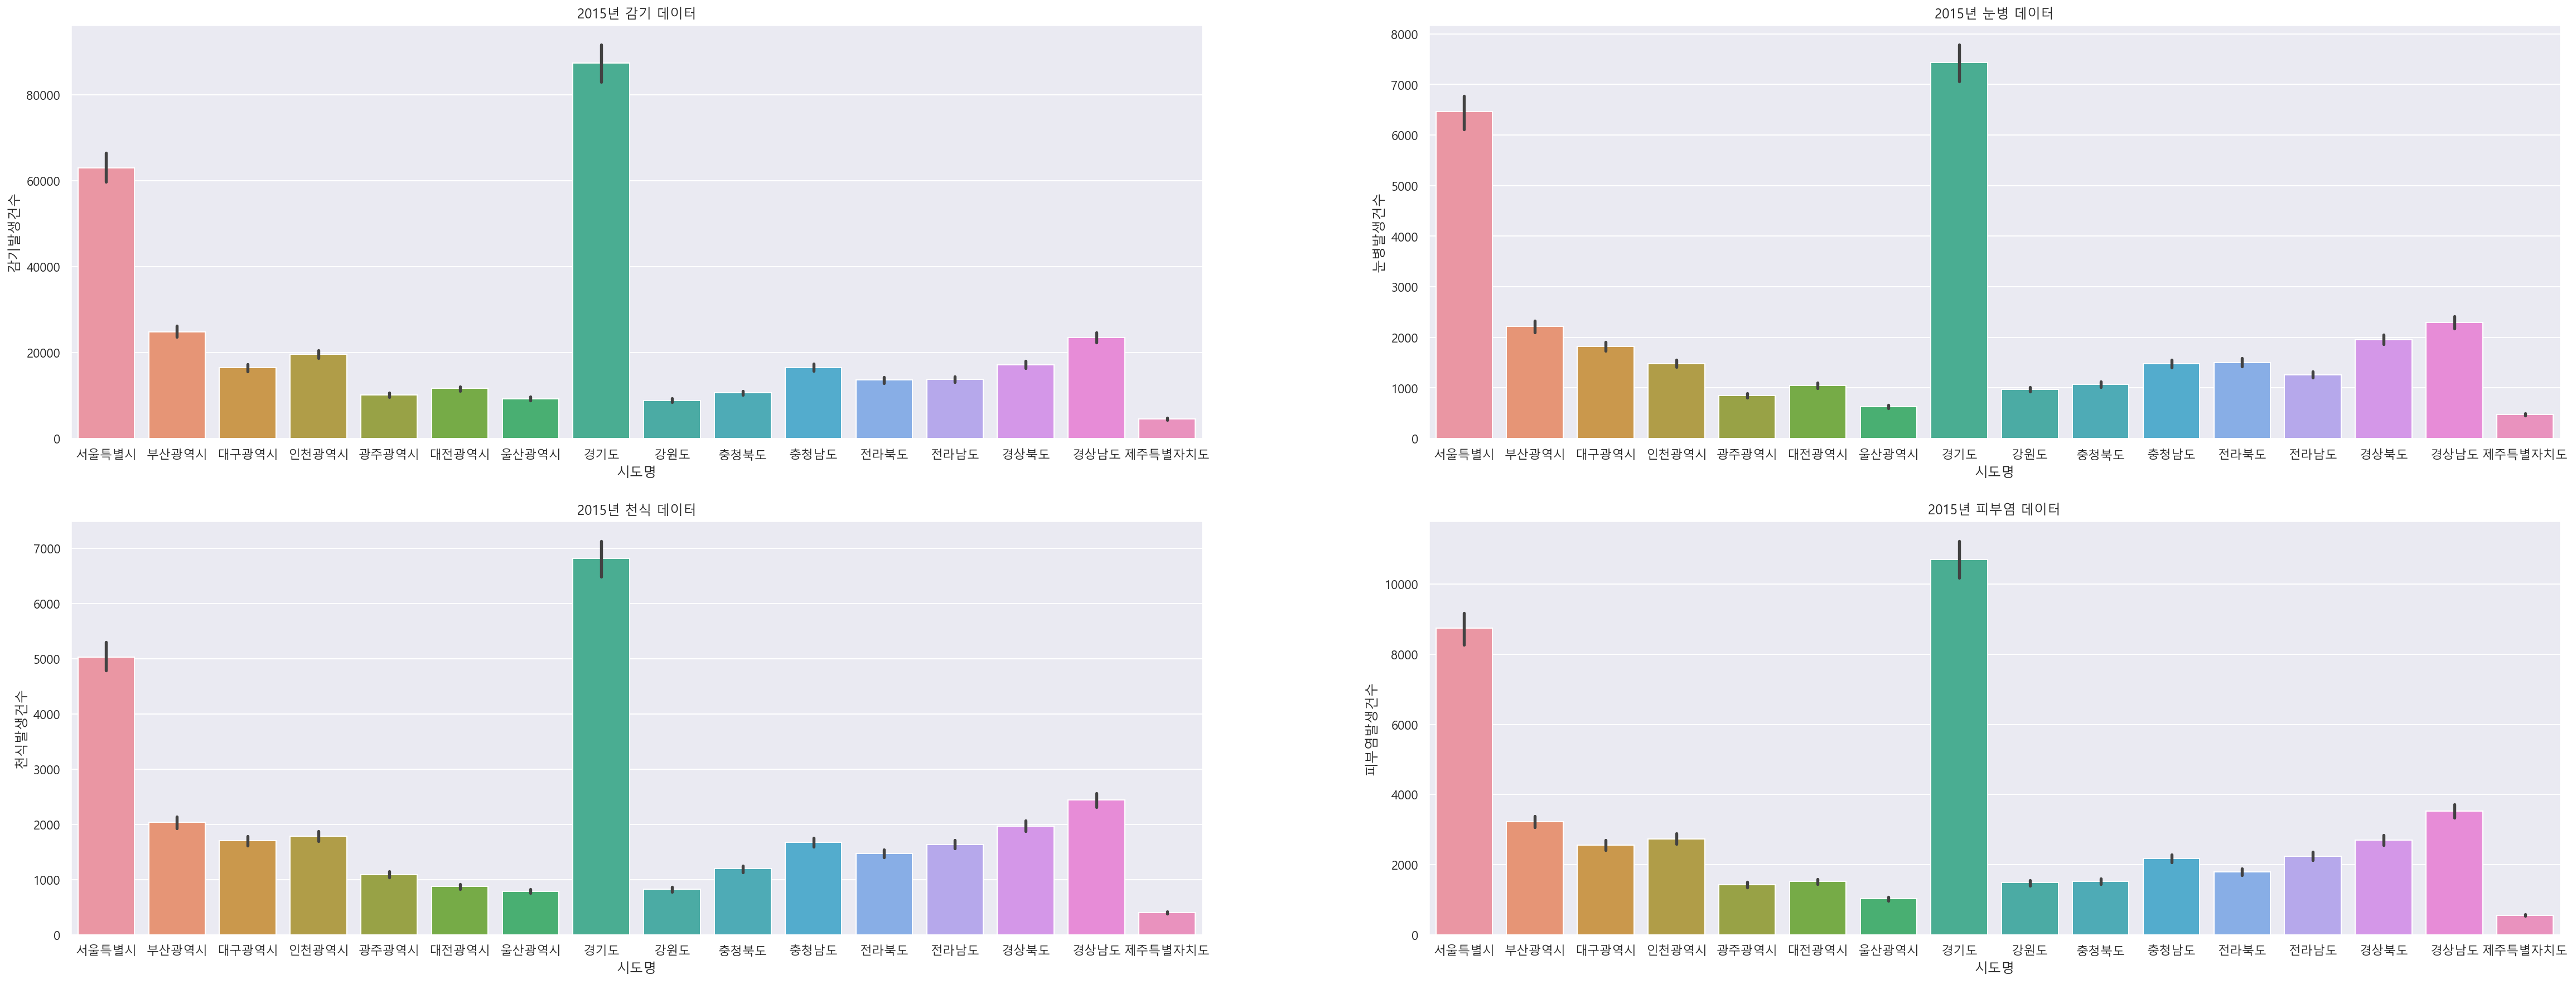

In [139]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2015년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2015년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2015년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2015년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2015년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

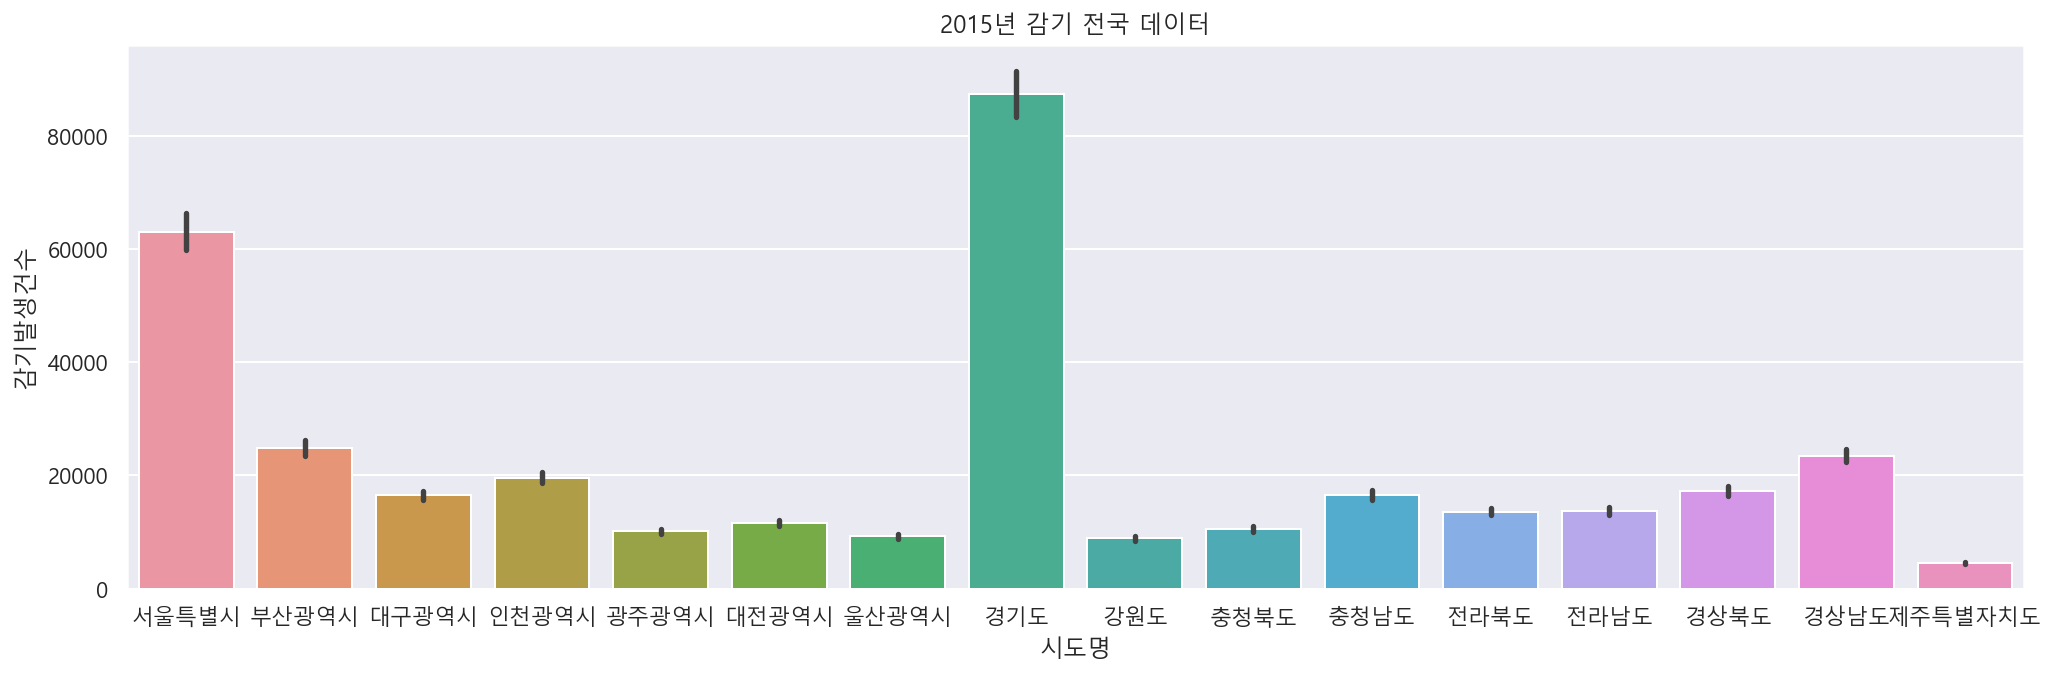

In [140]:
plt.figure(figsize=(17, 5))
plt.title("2015년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2015년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

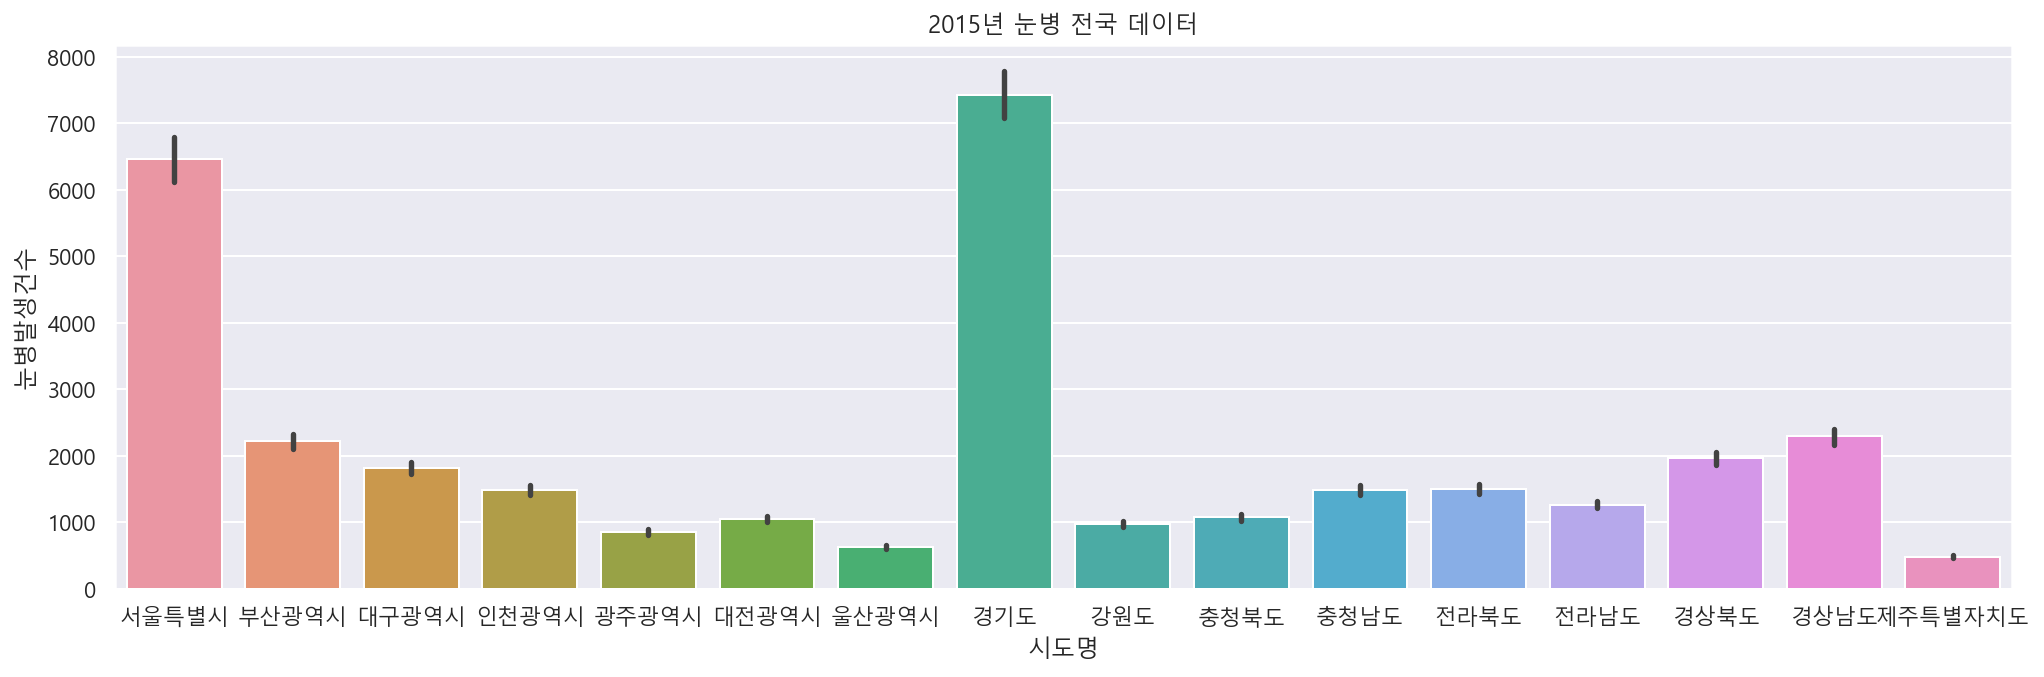

In [141]:
plt.figure(figsize=(17, 5))
plt.title("2015년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2015년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

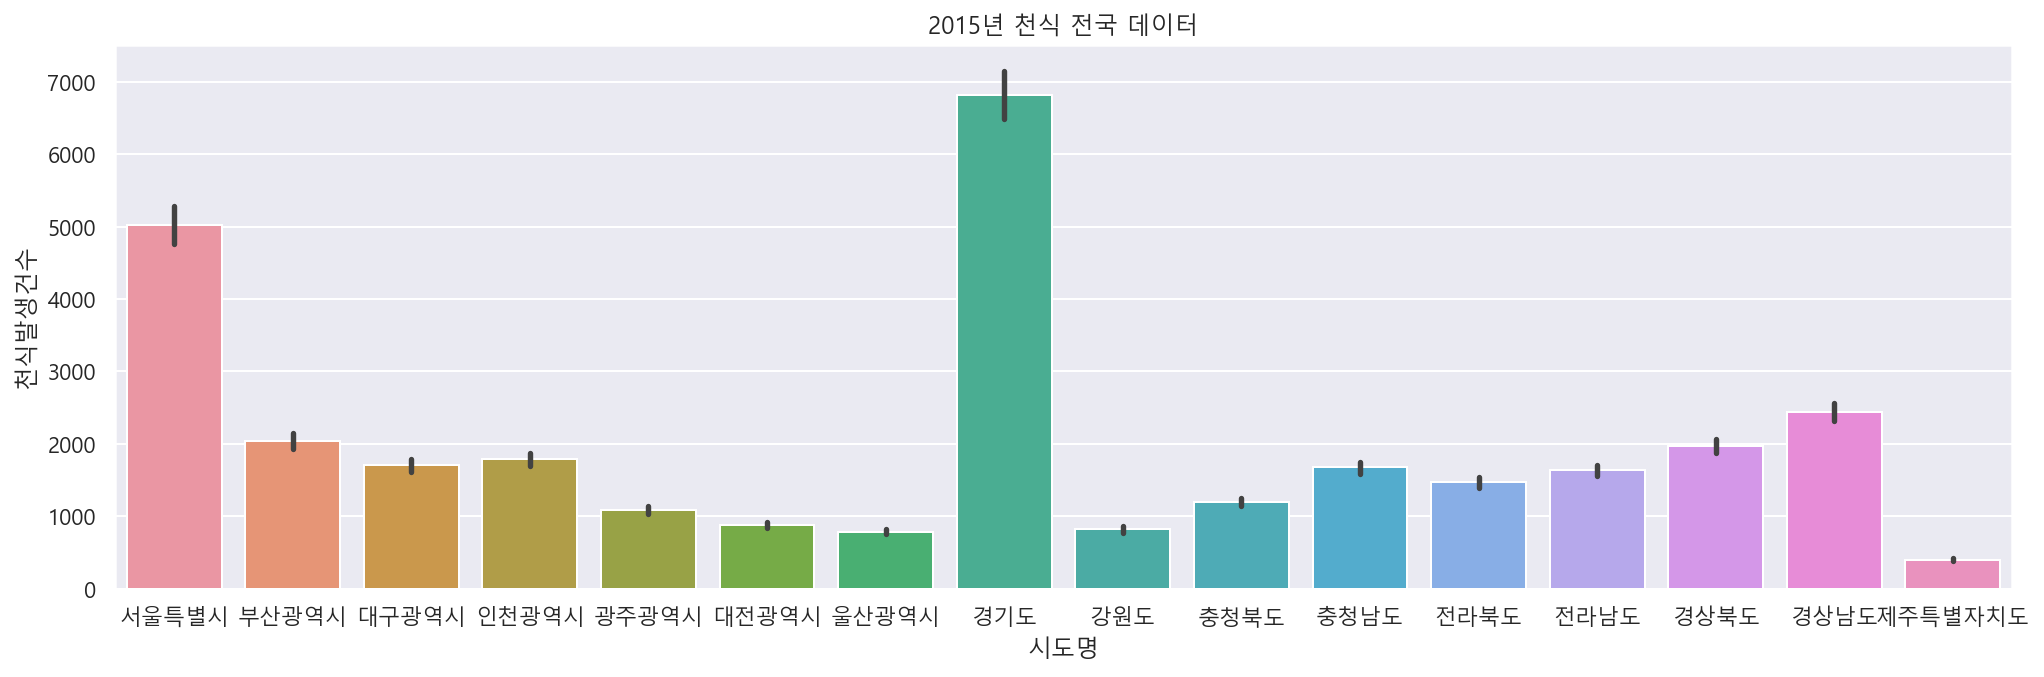

In [142]:
plt.figure(figsize=(17, 5))
plt.title("2015년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2015년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

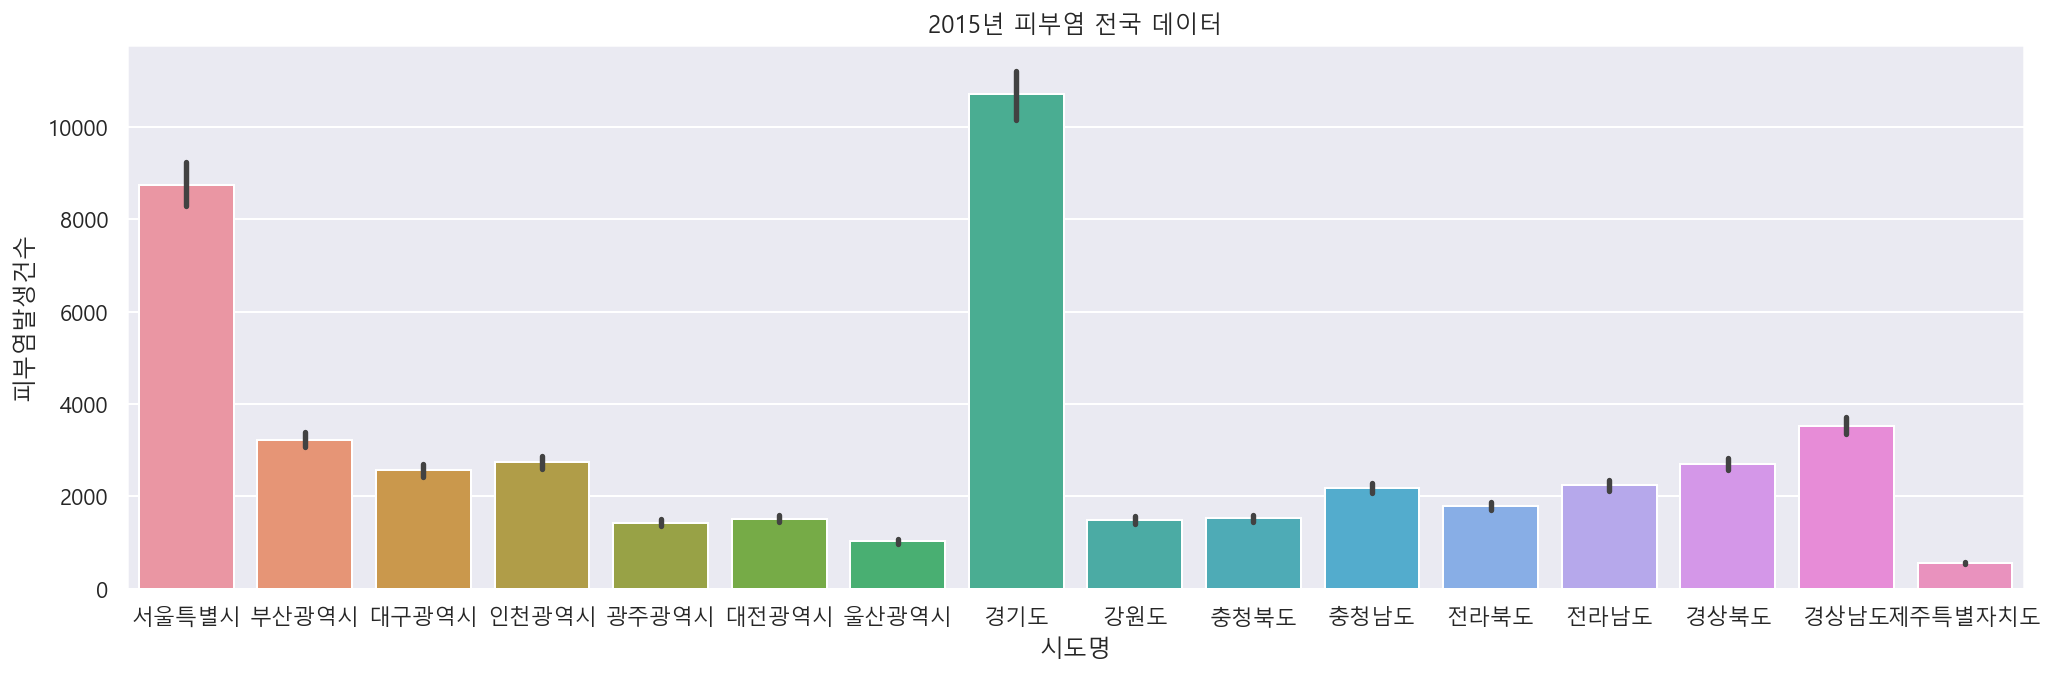

In [143]:
plt.figure(figsize=(17, 5))
plt.title("2015년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="피부염발생건수")

### 2016년 전국 데이터

<AxesSubplot:title={'center':'2016년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

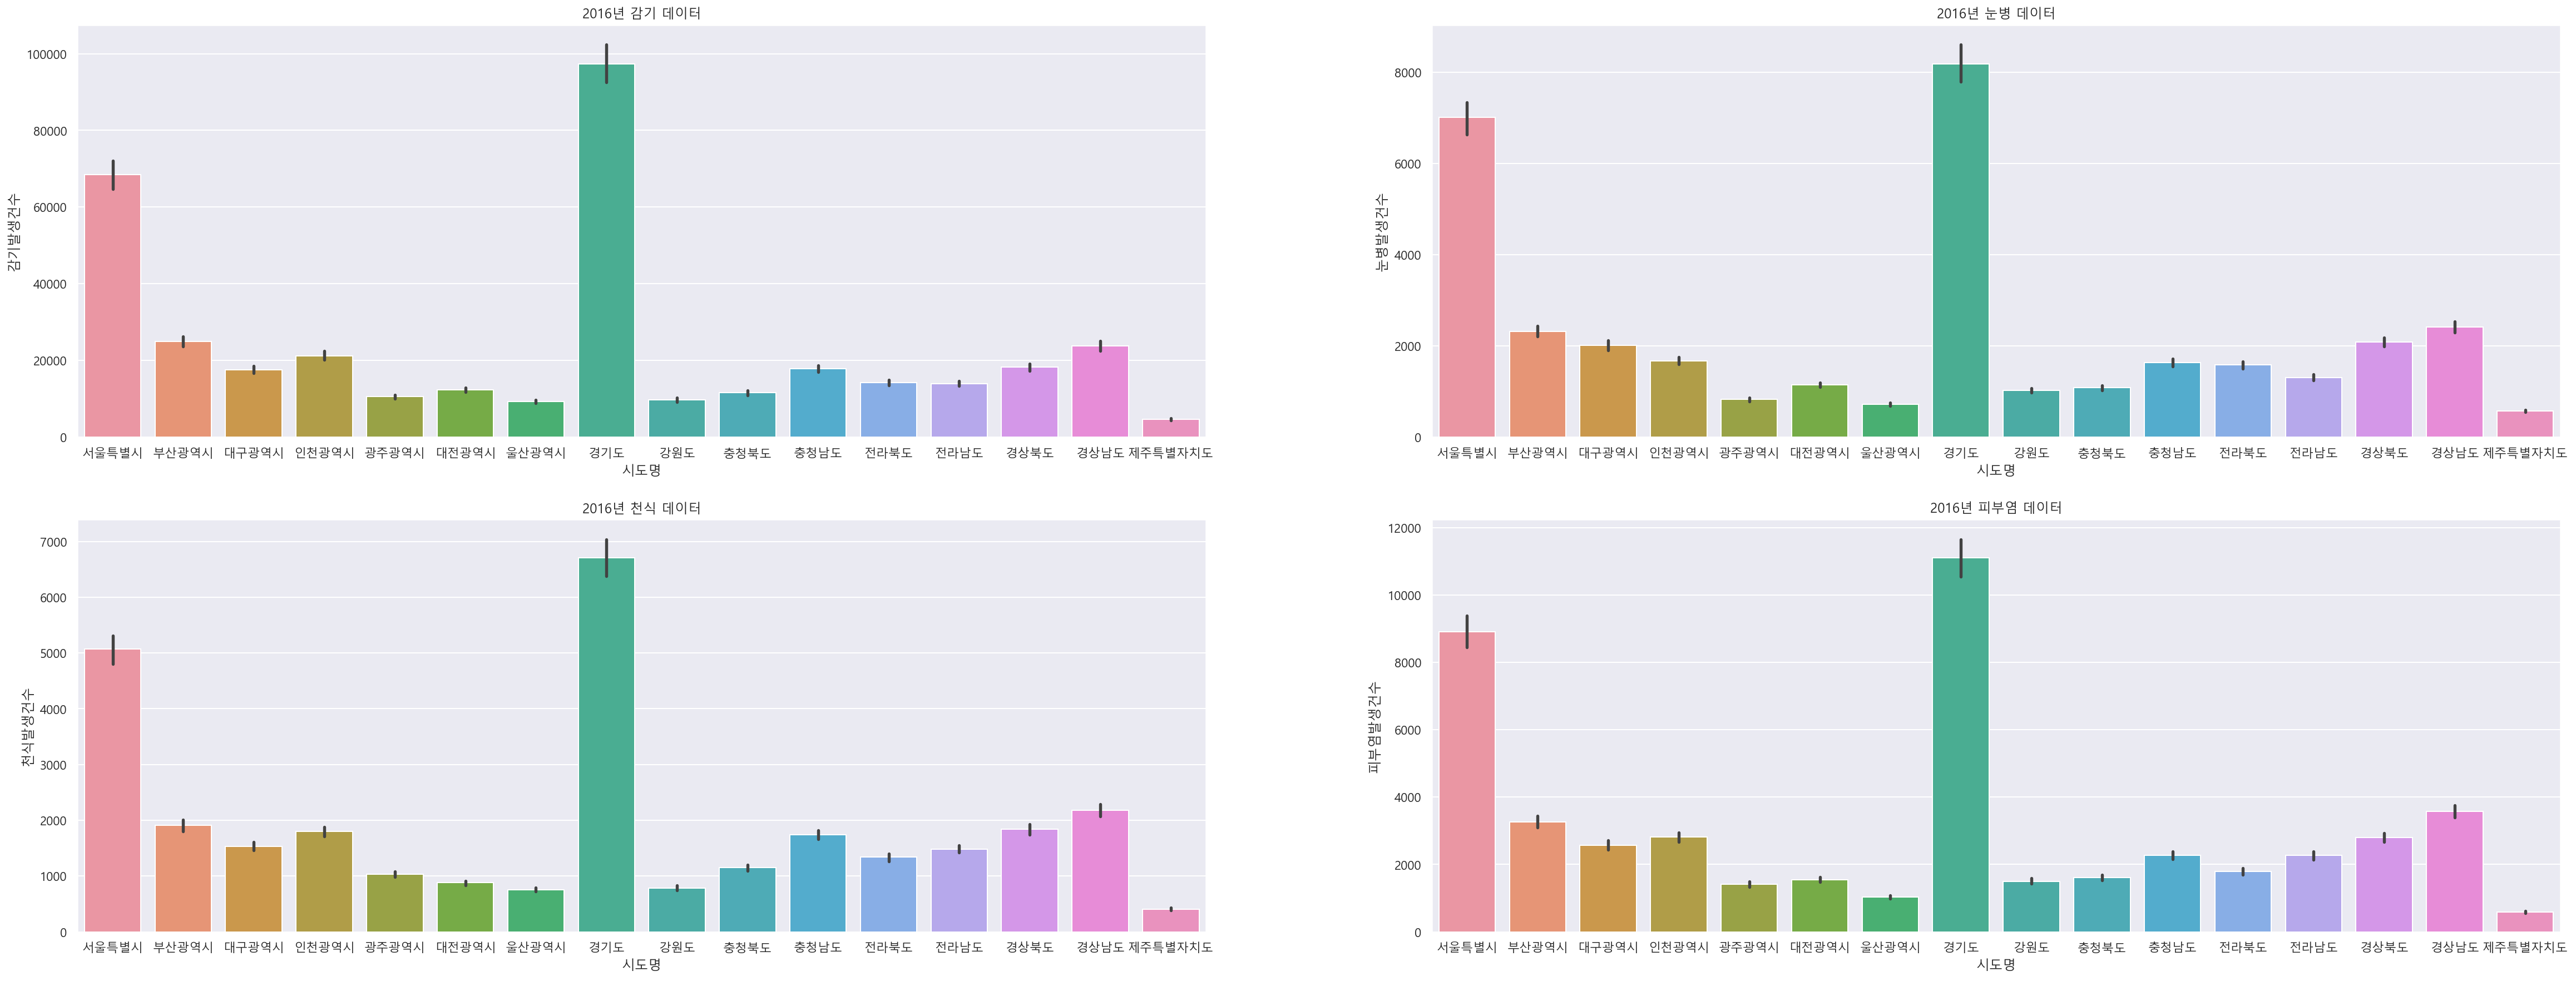

In [144]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2016년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2016년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2016년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2016년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2016년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

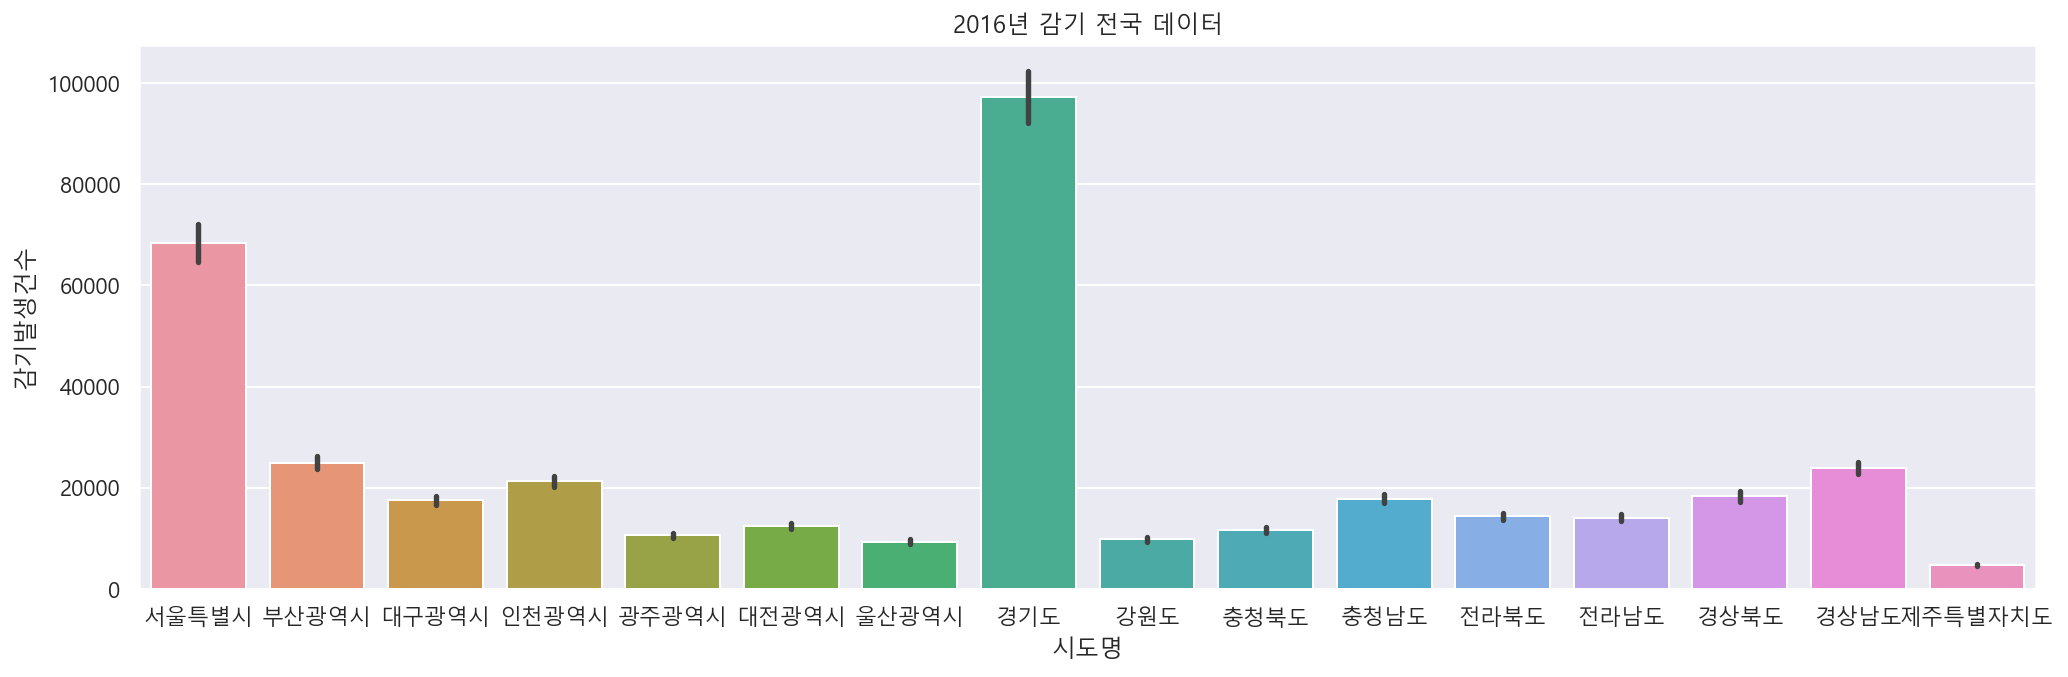

In [145]:
plt.figure(figsize=(17, 5))
plt.title("2016년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2016년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

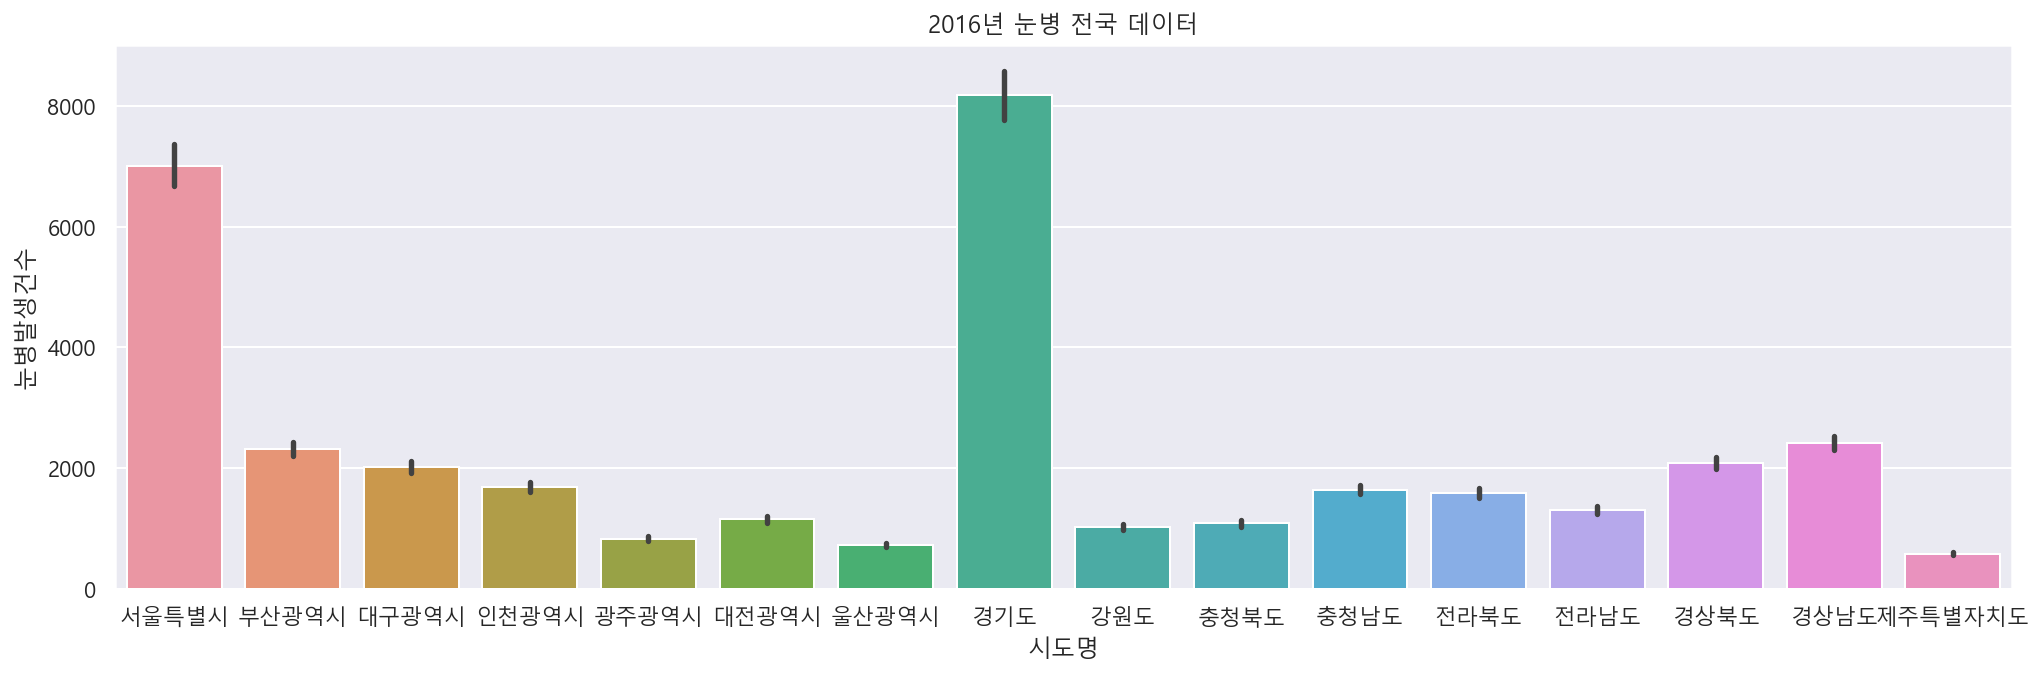

In [146]:
plt.figure(figsize=(17, 5))
plt.title("2016년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2016년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

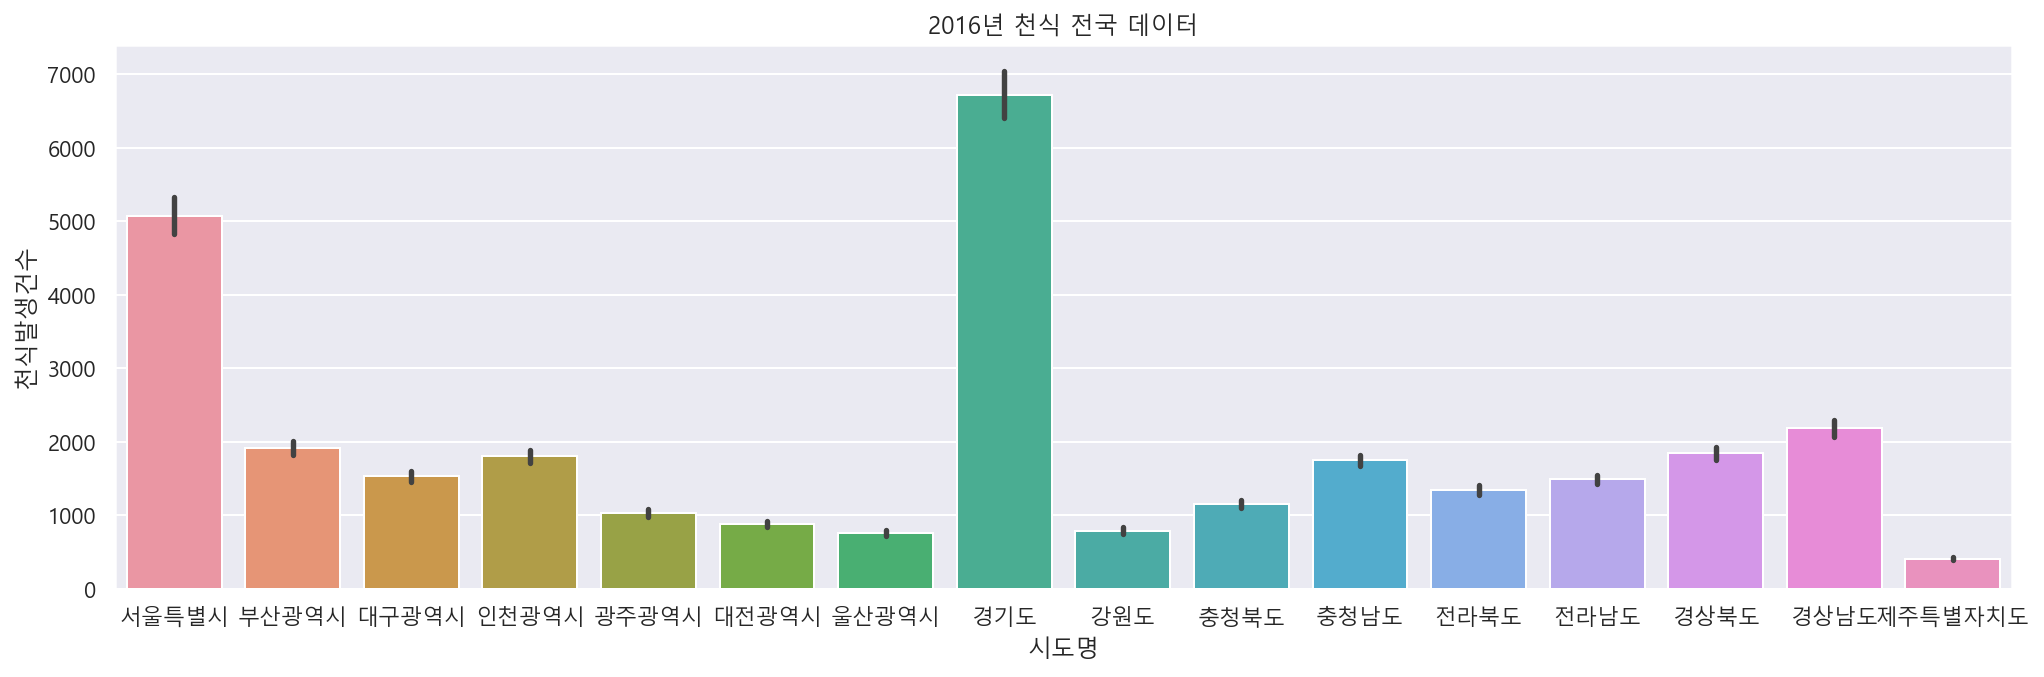

In [147]:
plt.figure(figsize=(17, 5))
plt.title("2016년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2016년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

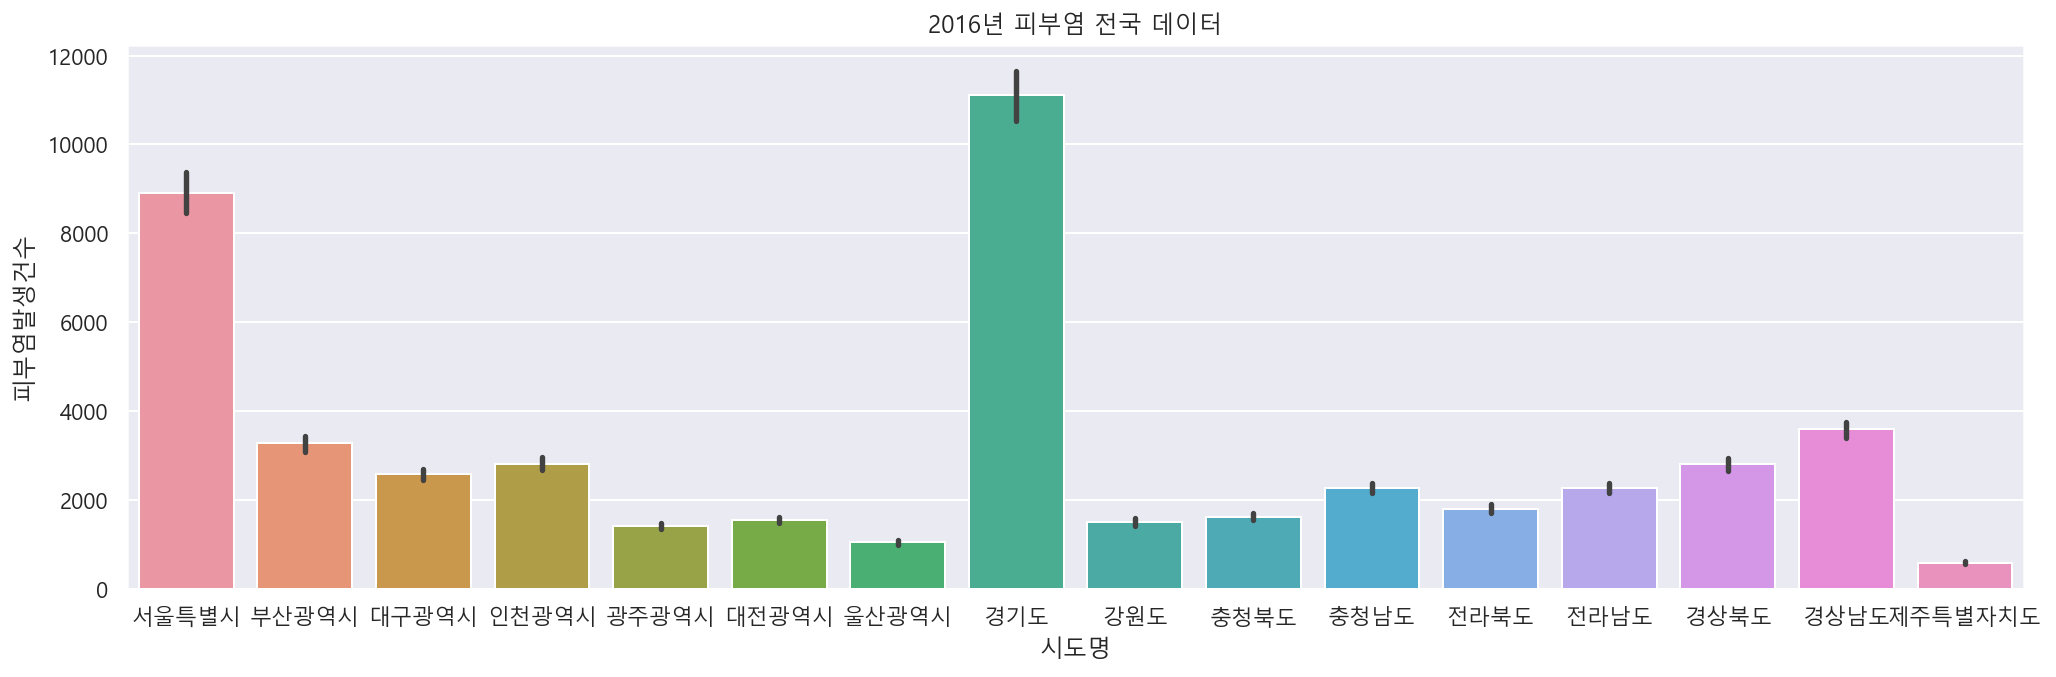

In [148]:
plt.figure(figsize=(17, 5))
plt.title("2016년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="피부염발생건수")

### 2017년 전국 데이터

<AxesSubplot:title={'center':'2017년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

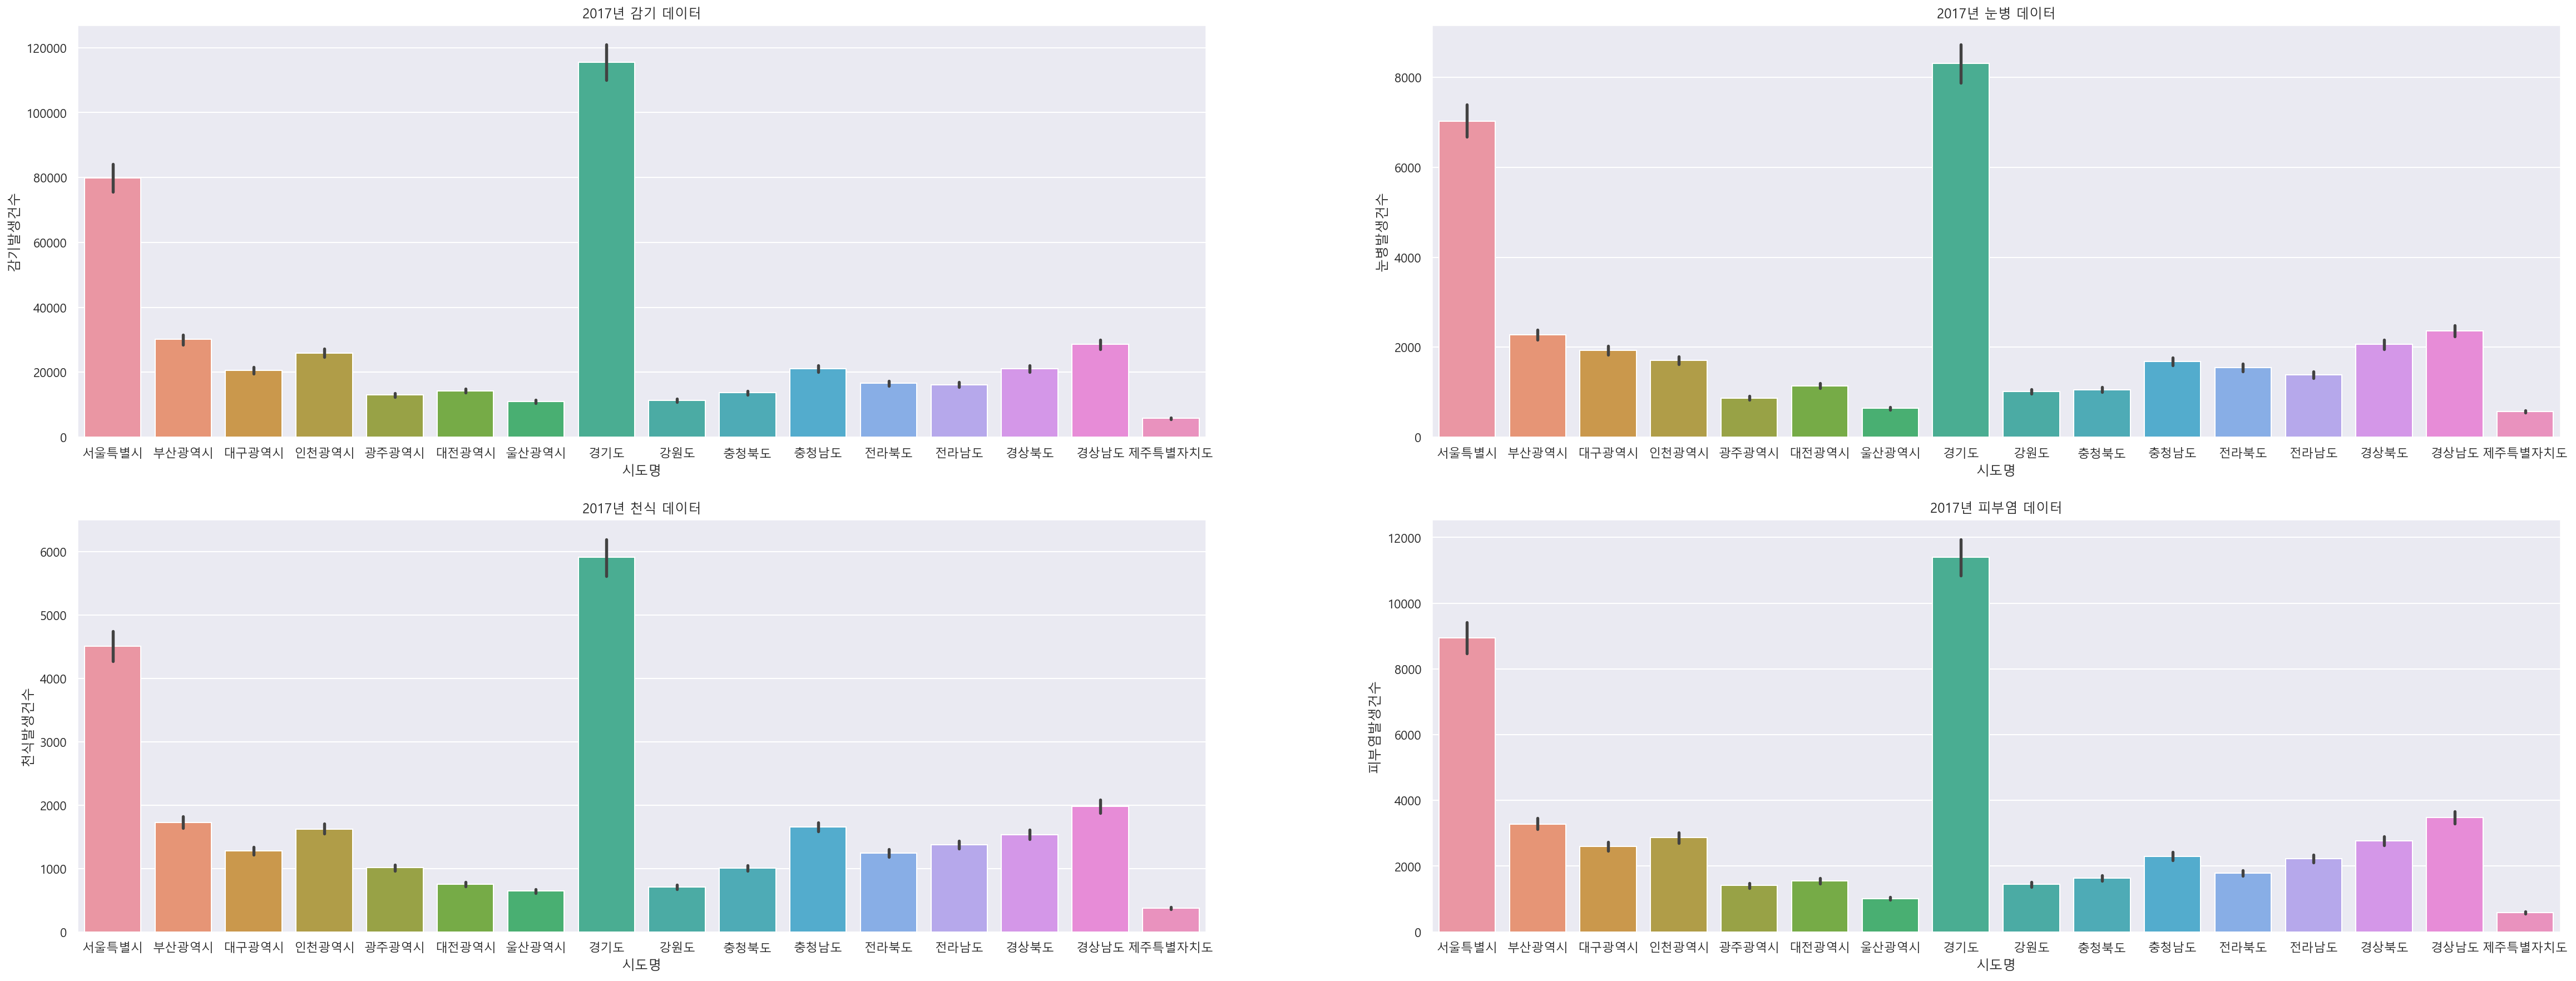

In [149]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2017년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2017년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2017년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2017년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2017년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

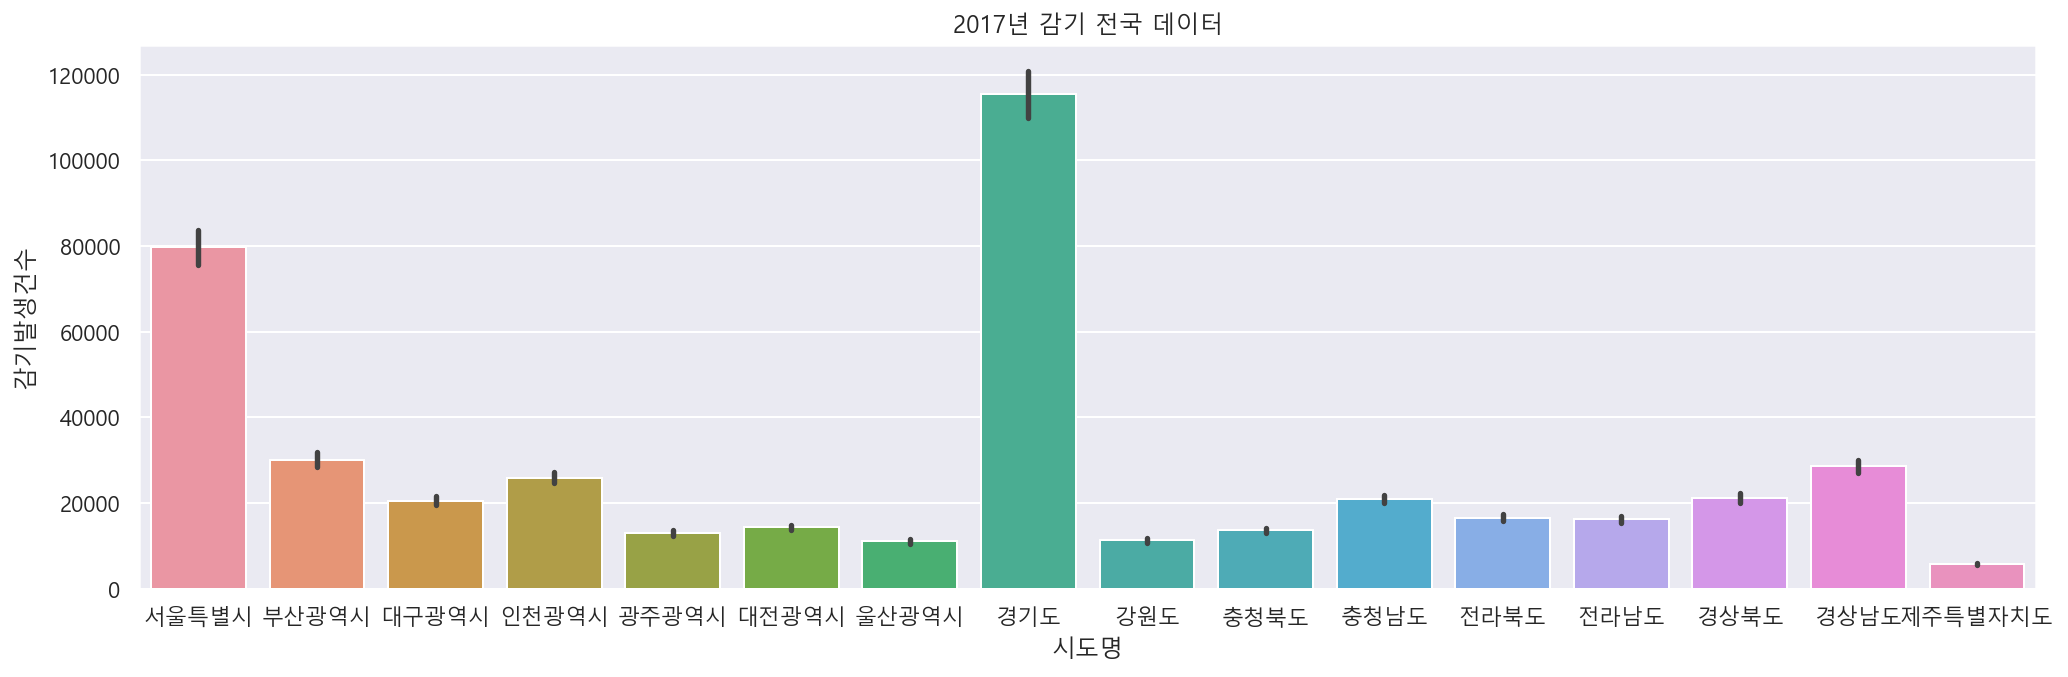

In [150]:
plt.figure(figsize=(17, 5))
plt.title("2017년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2017년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

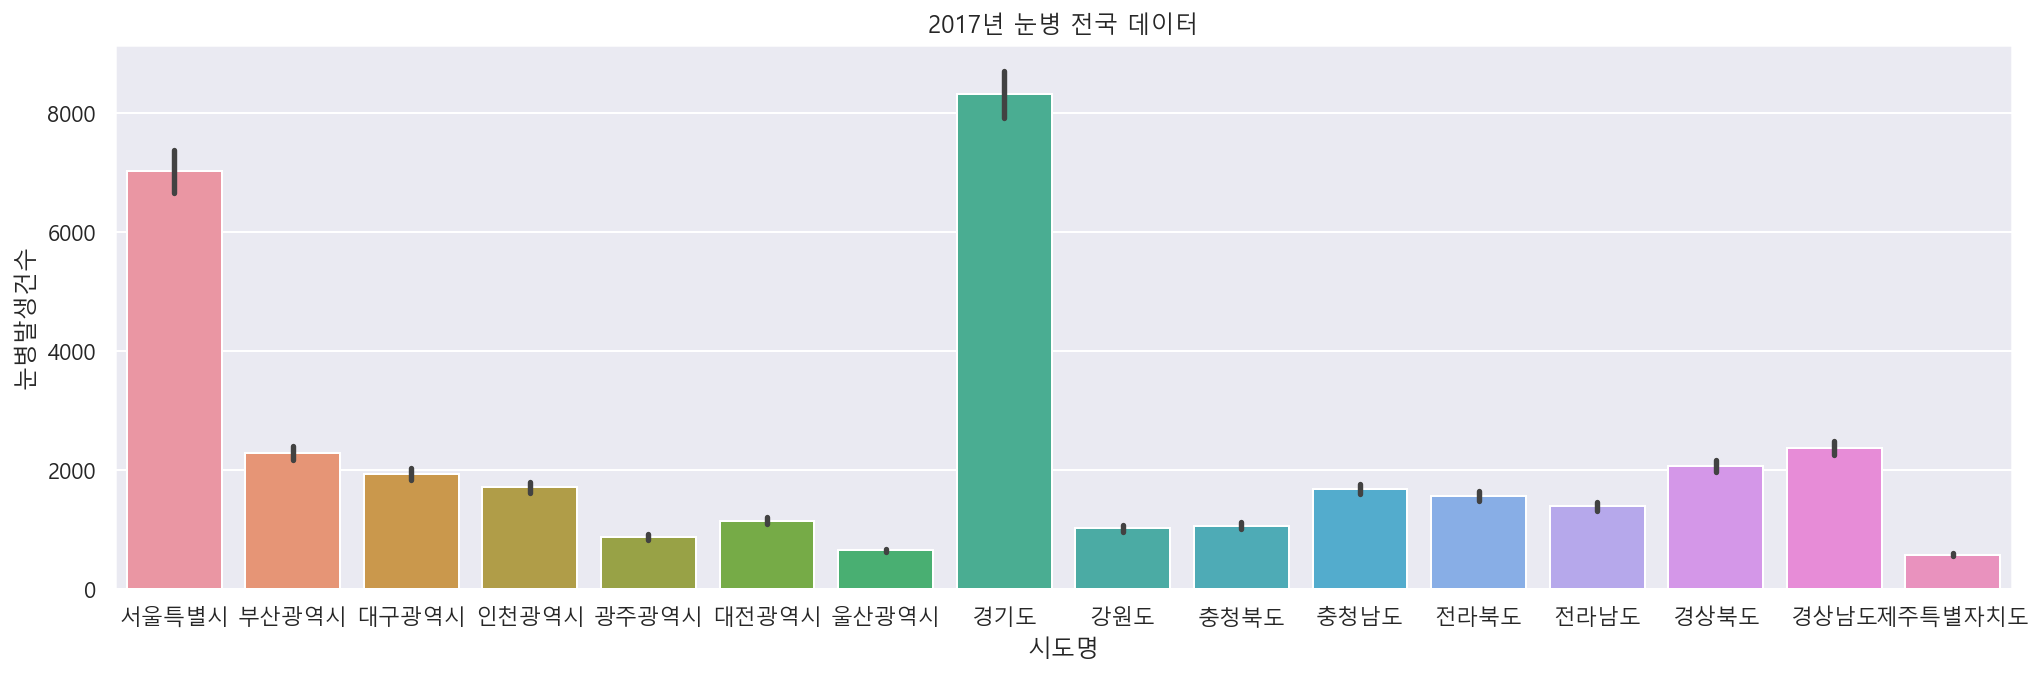

In [151]:
plt.figure(figsize=(17, 5))
plt.title("2017년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2017년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

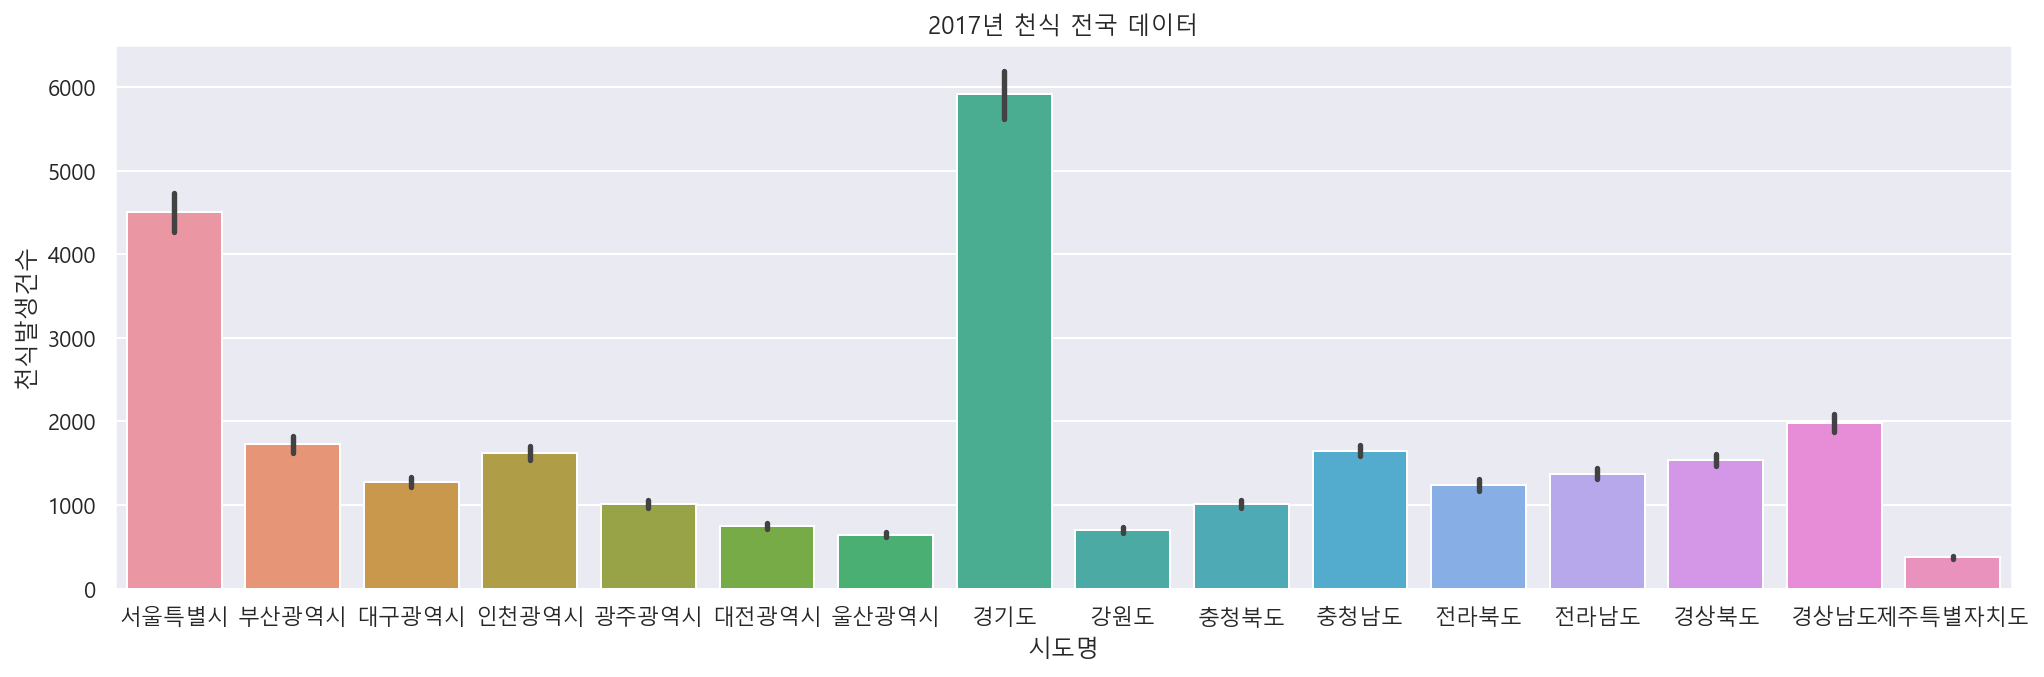

In [152]:
plt.figure(figsize=(17, 5))
plt.title("2017년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2016년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

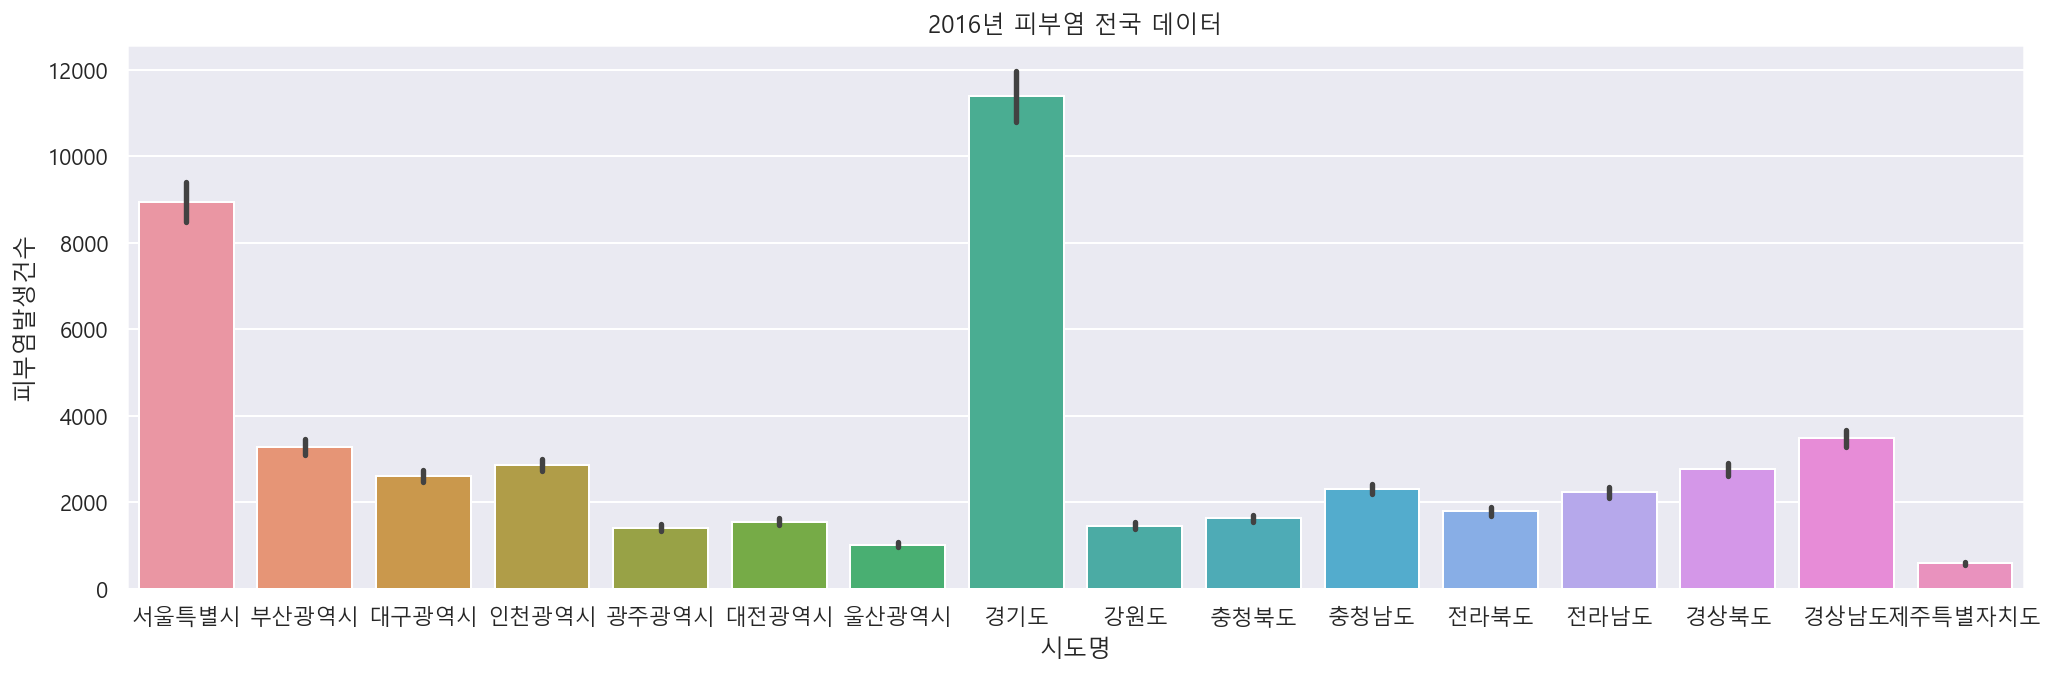

In [153]:
plt.figure(figsize=(17, 5))
plt.title("2016년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="피부염발생건수")

### 2018년 전국 데이터

<AxesSubplot:title={'center':'2018년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

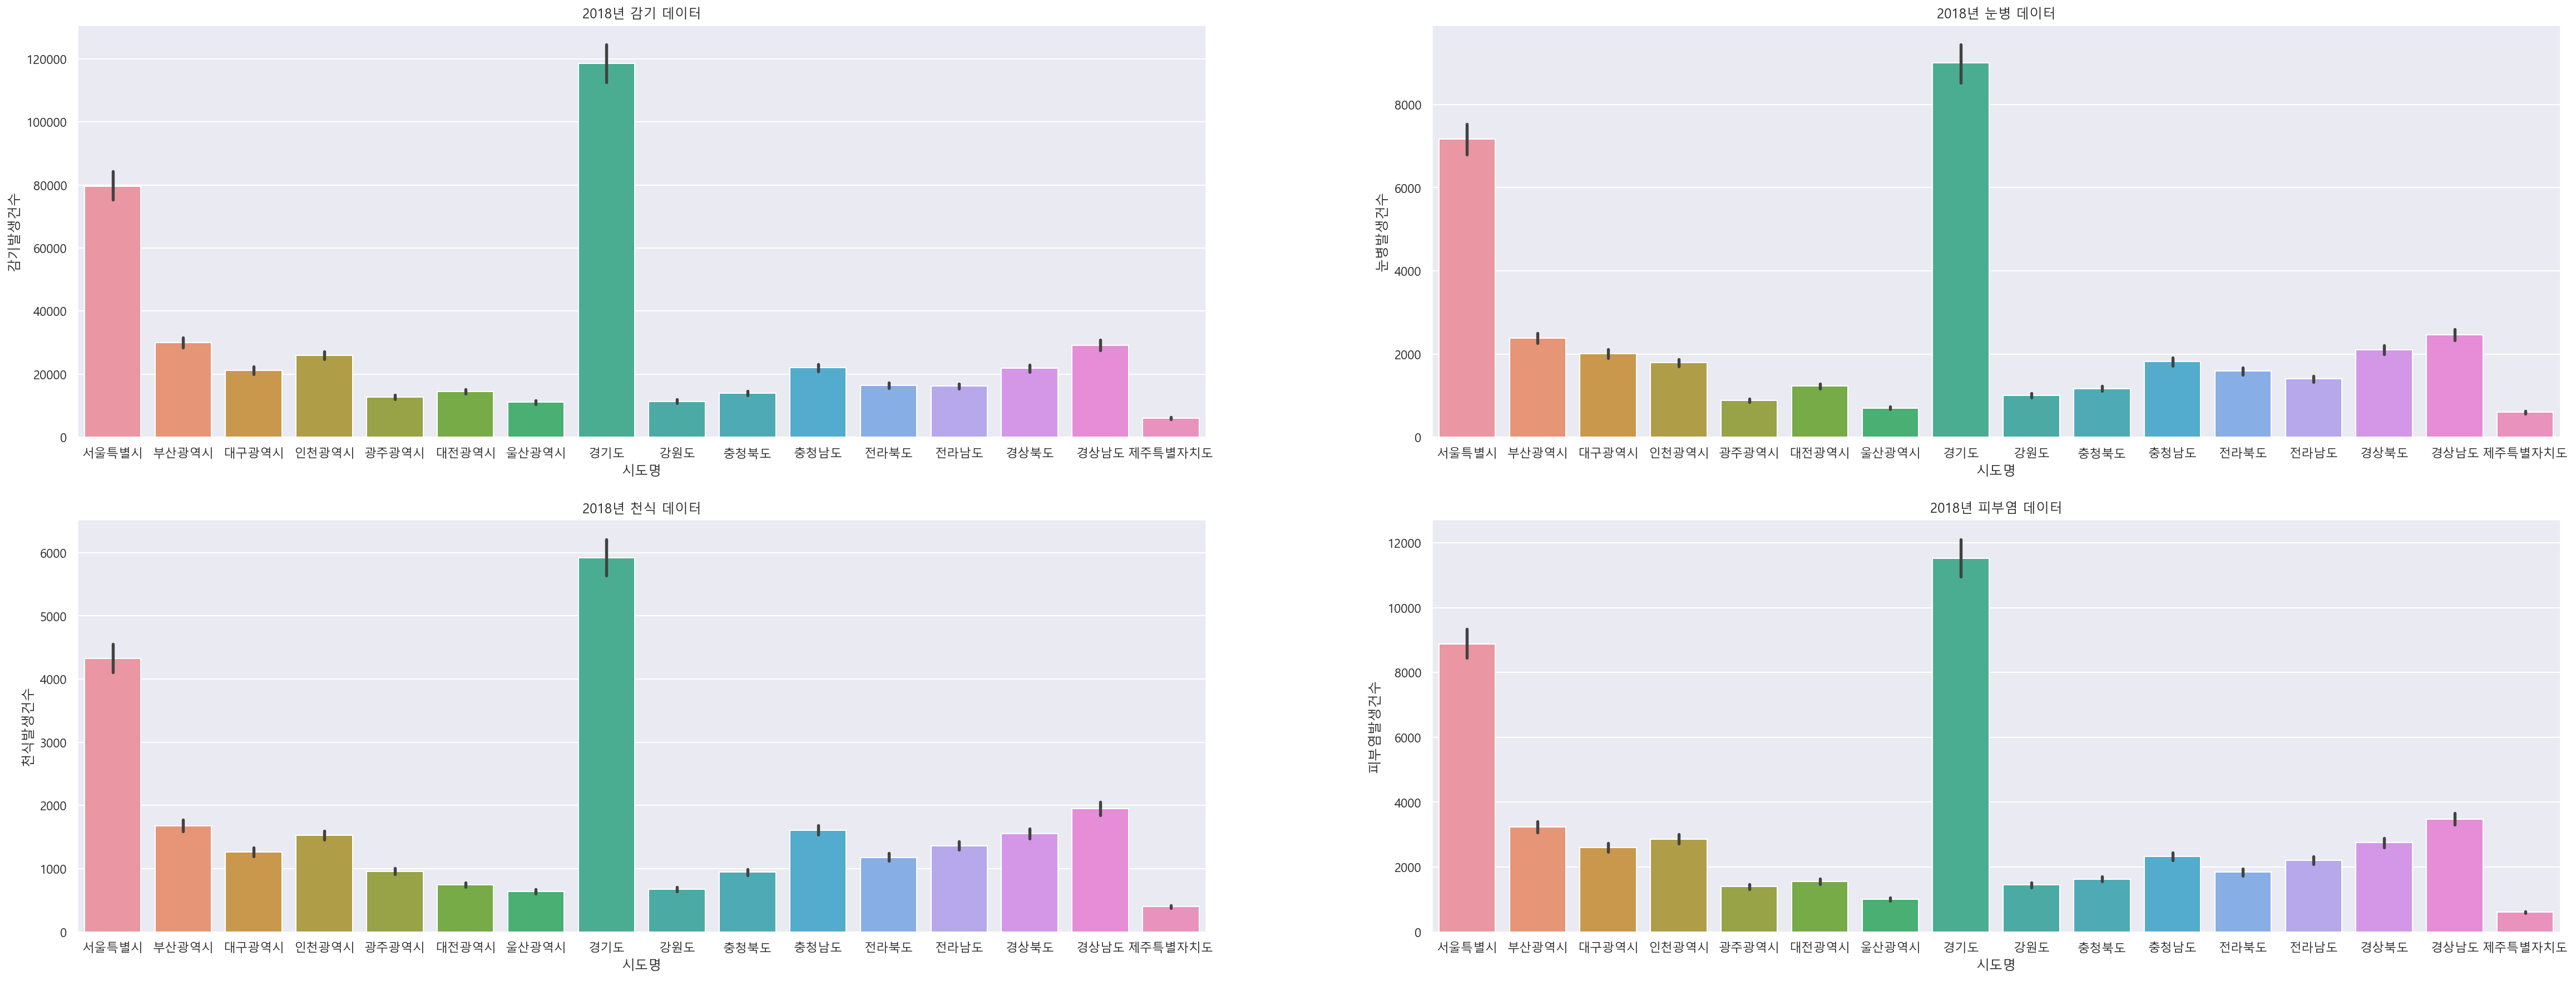

In [154]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2018년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2018년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2018년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2018년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2018년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

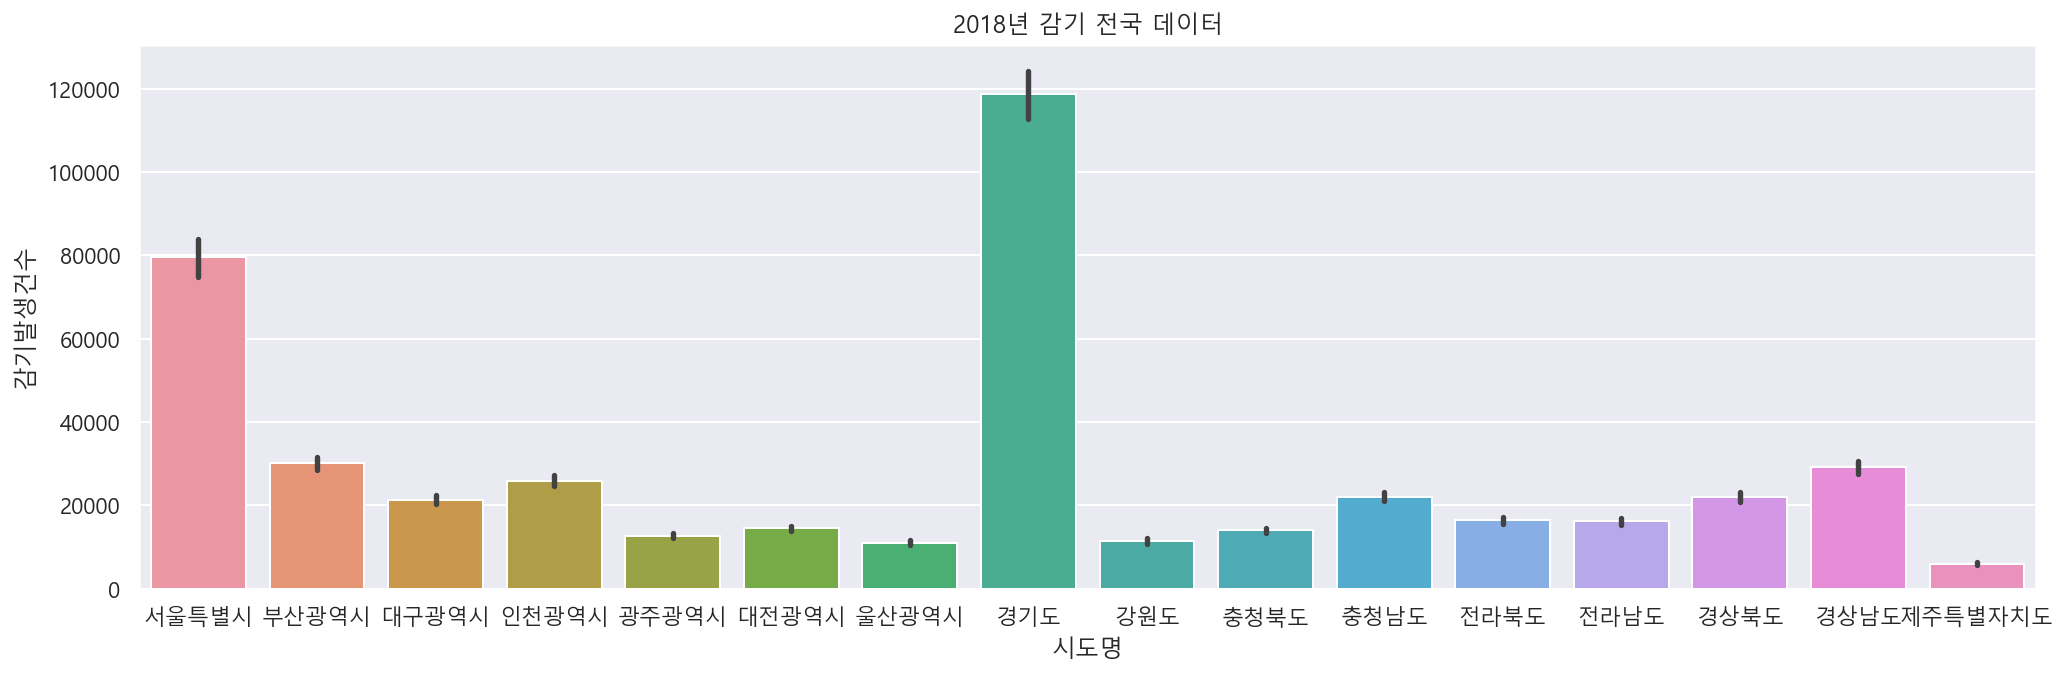

In [155]:
plt.figure(figsize=(17, 5))
plt.title("2018년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2018년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

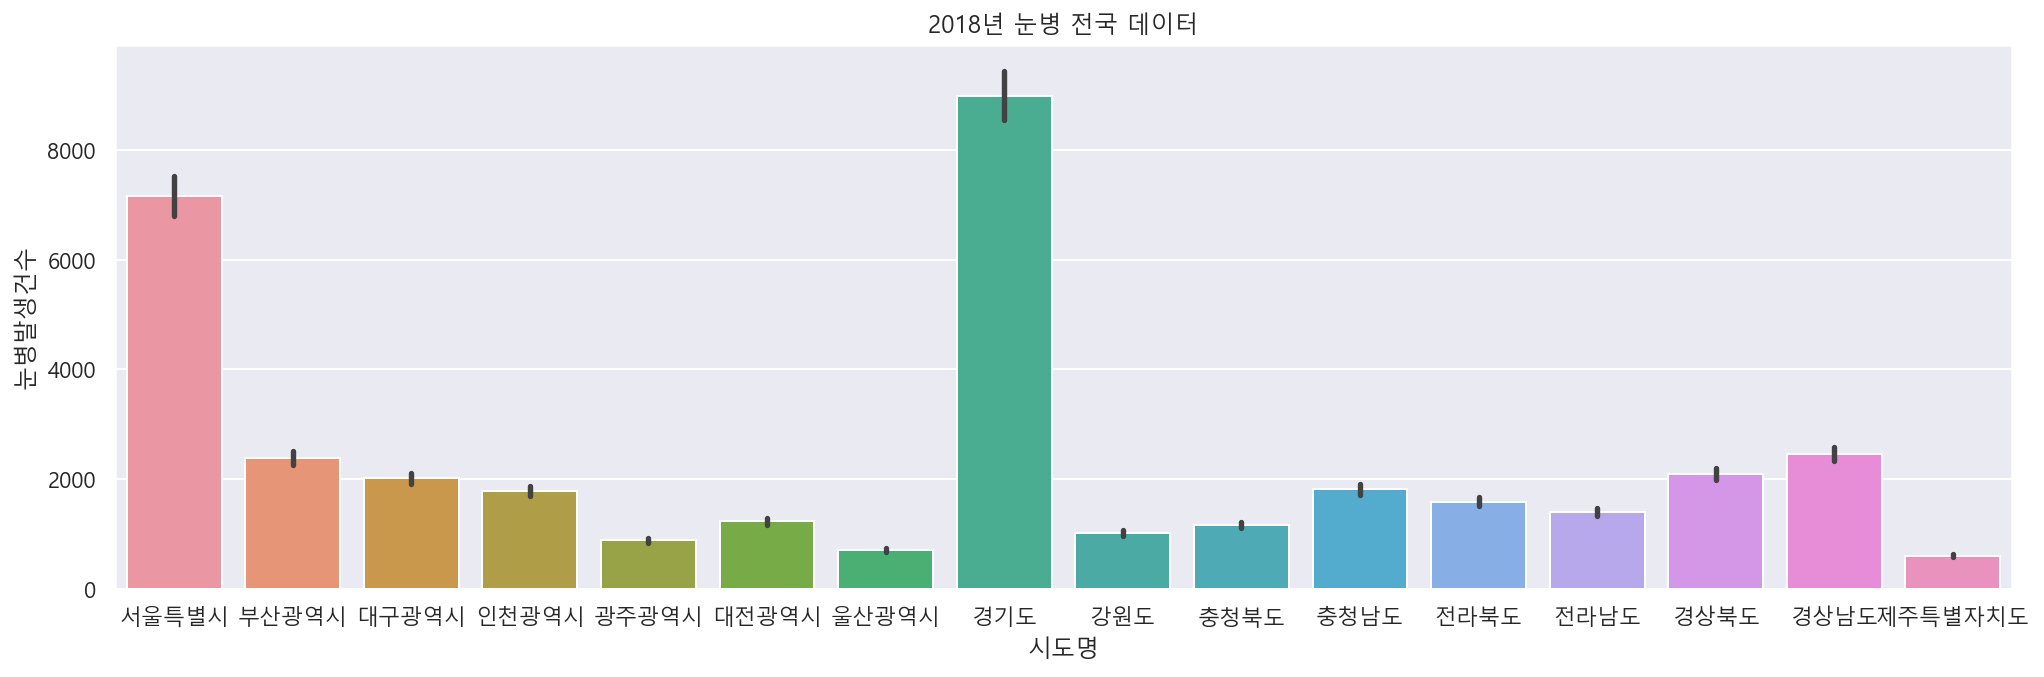

In [156]:
plt.figure(figsize=(17, 5))
plt.title("2018년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2018년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

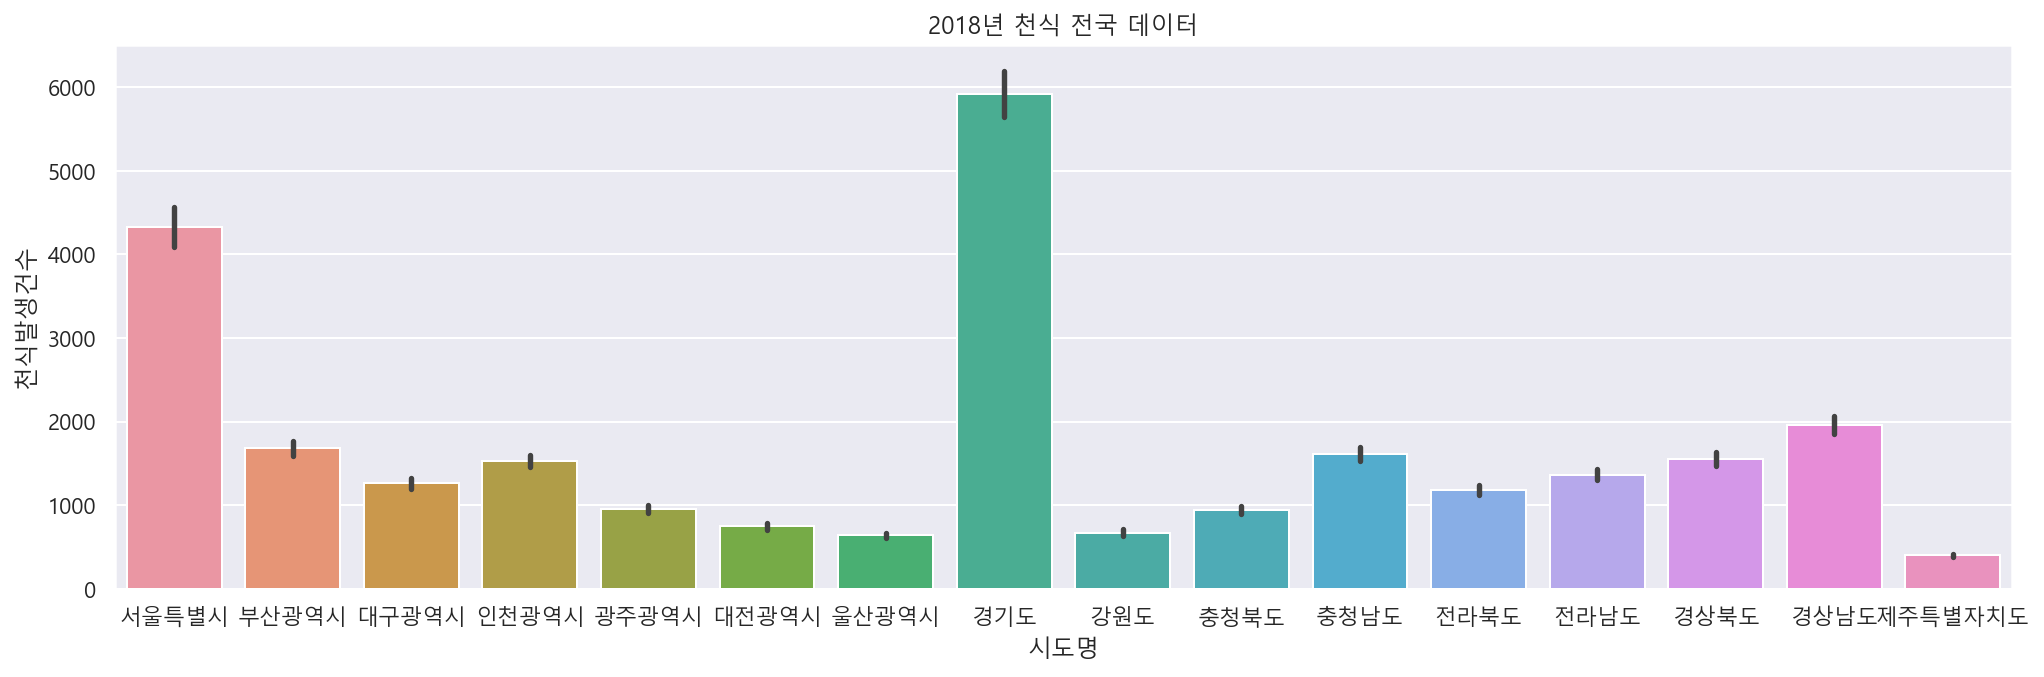

In [157]:
plt.figure(figsize=(17, 5))
plt.title("2018년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2018년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

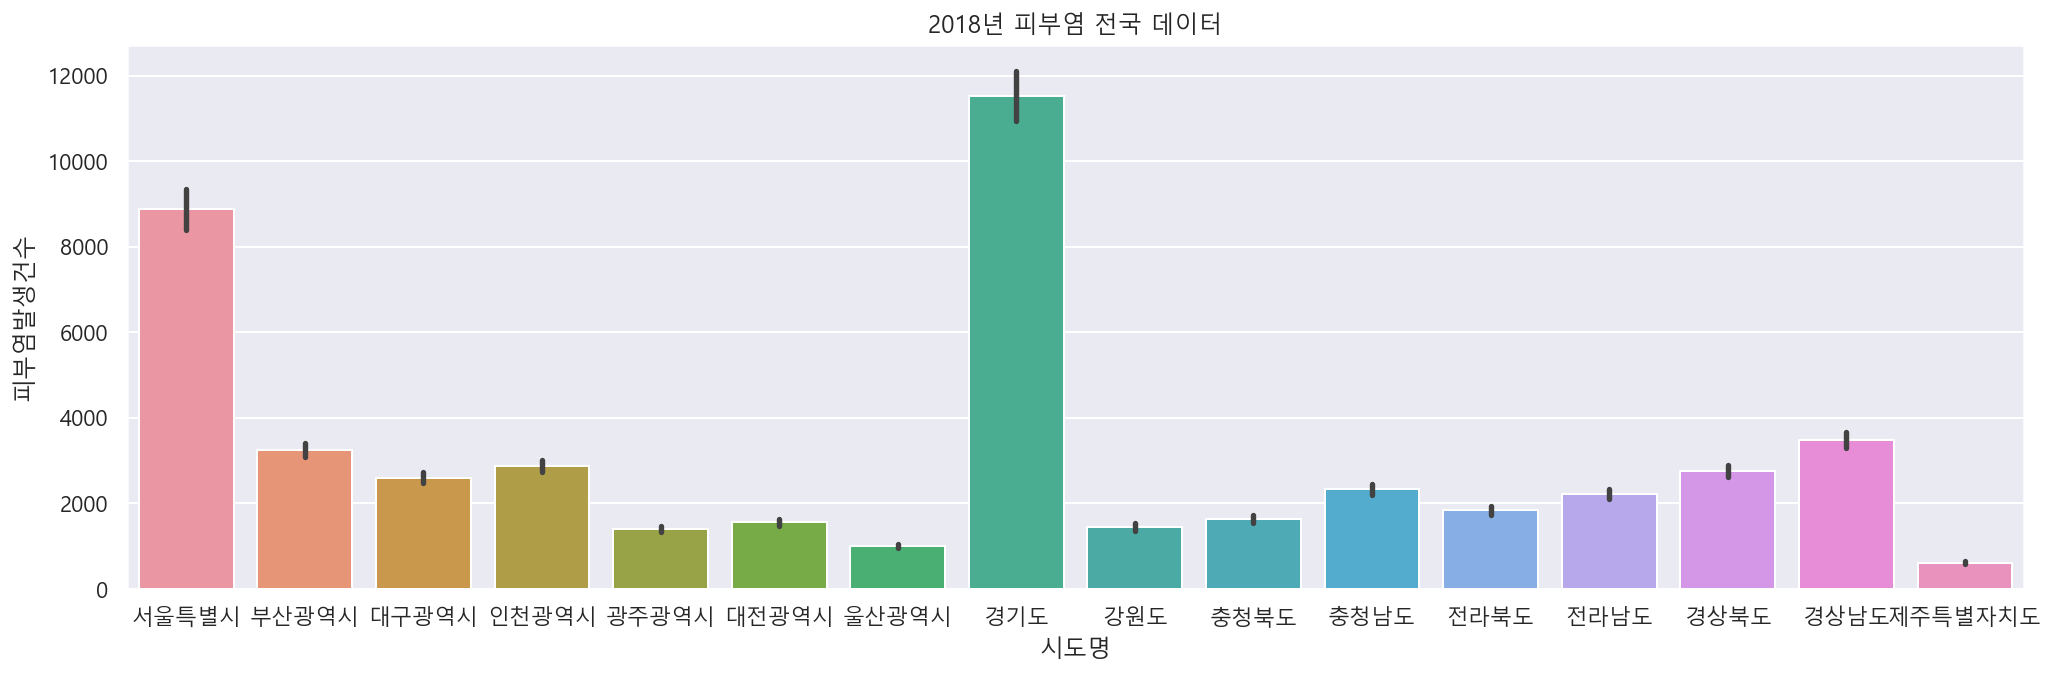

In [158]:
plt.figure(figsize=(17, 5))
plt.title("2018년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="피부염발생건수")

### 2019년 전국 데이터

<AxesSubplot:title={'center':'2019년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

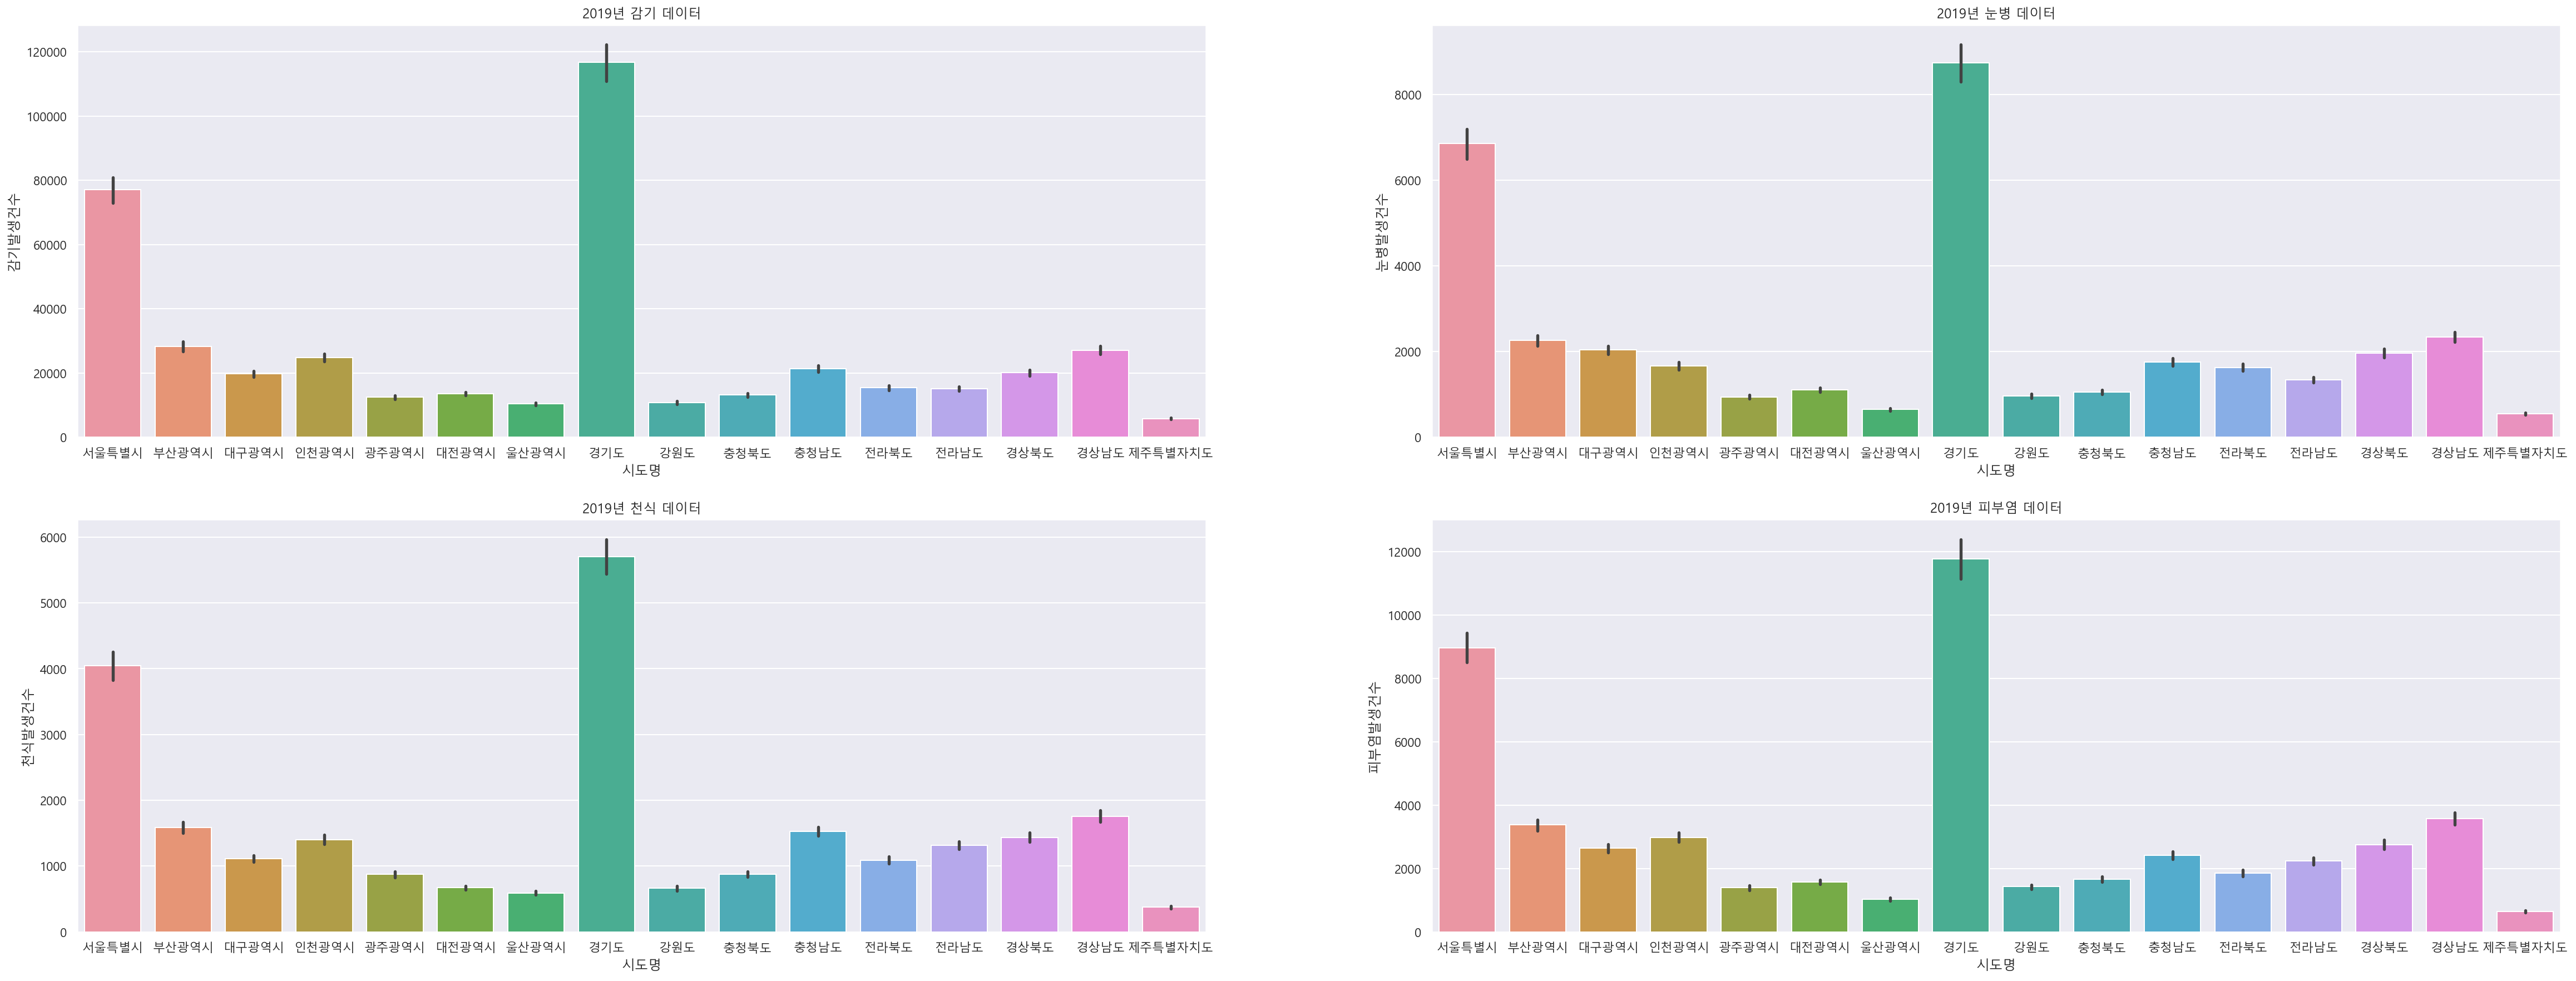

In [159]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2019년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2019년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2019년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2019년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2019년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

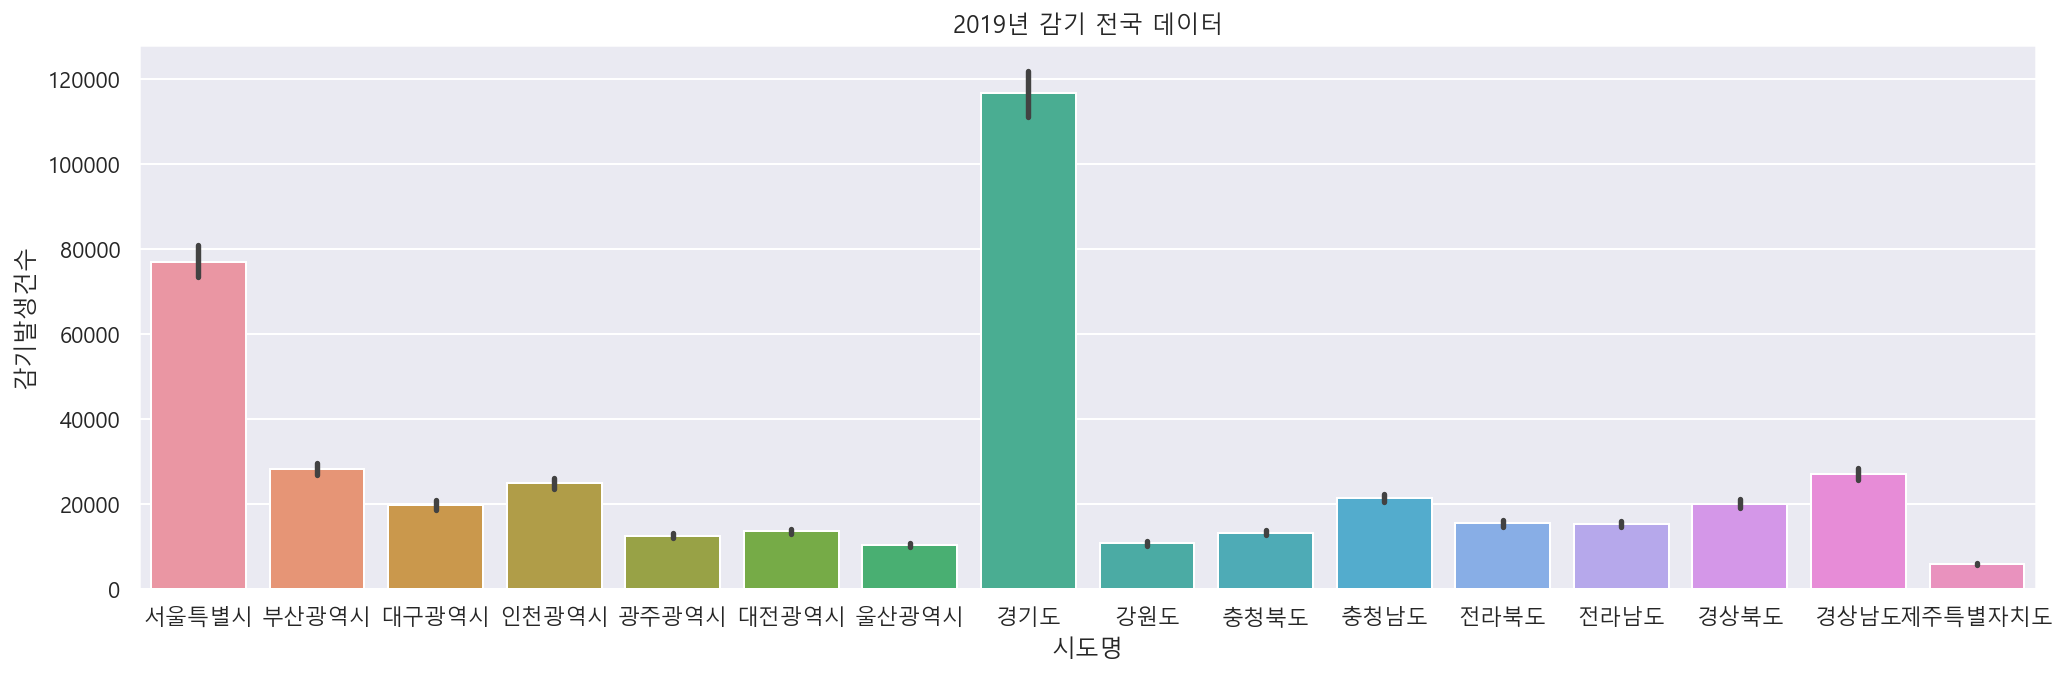

In [160]:
plt.figure(figsize=(17, 5))
plt.title("2019년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2019년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

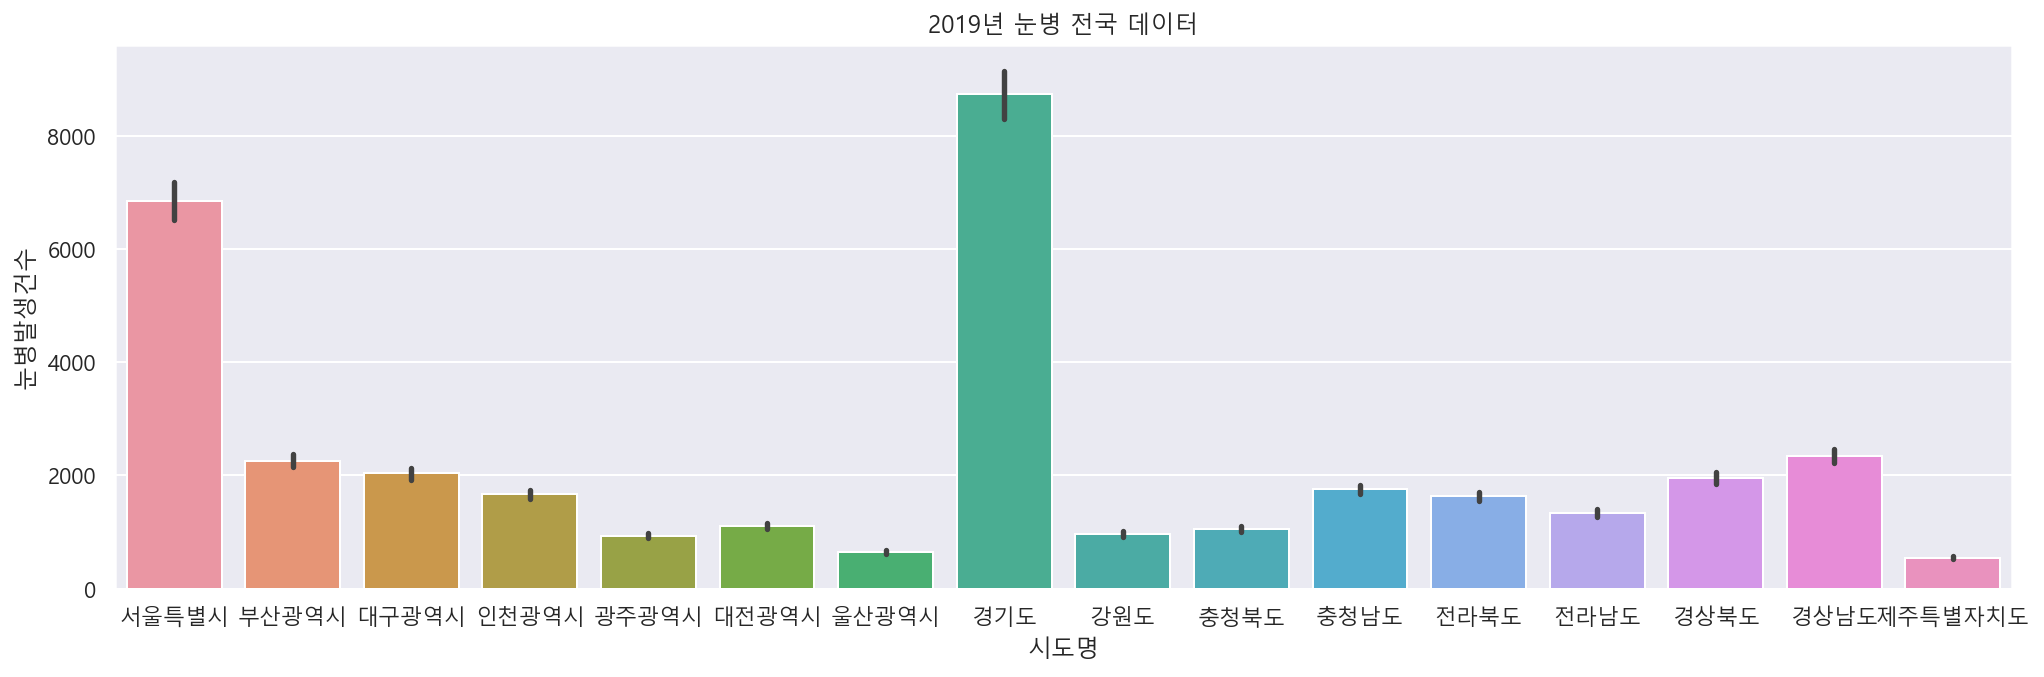

In [161]:
plt.figure(figsize=(17, 5))
plt.title("2019년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2019년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

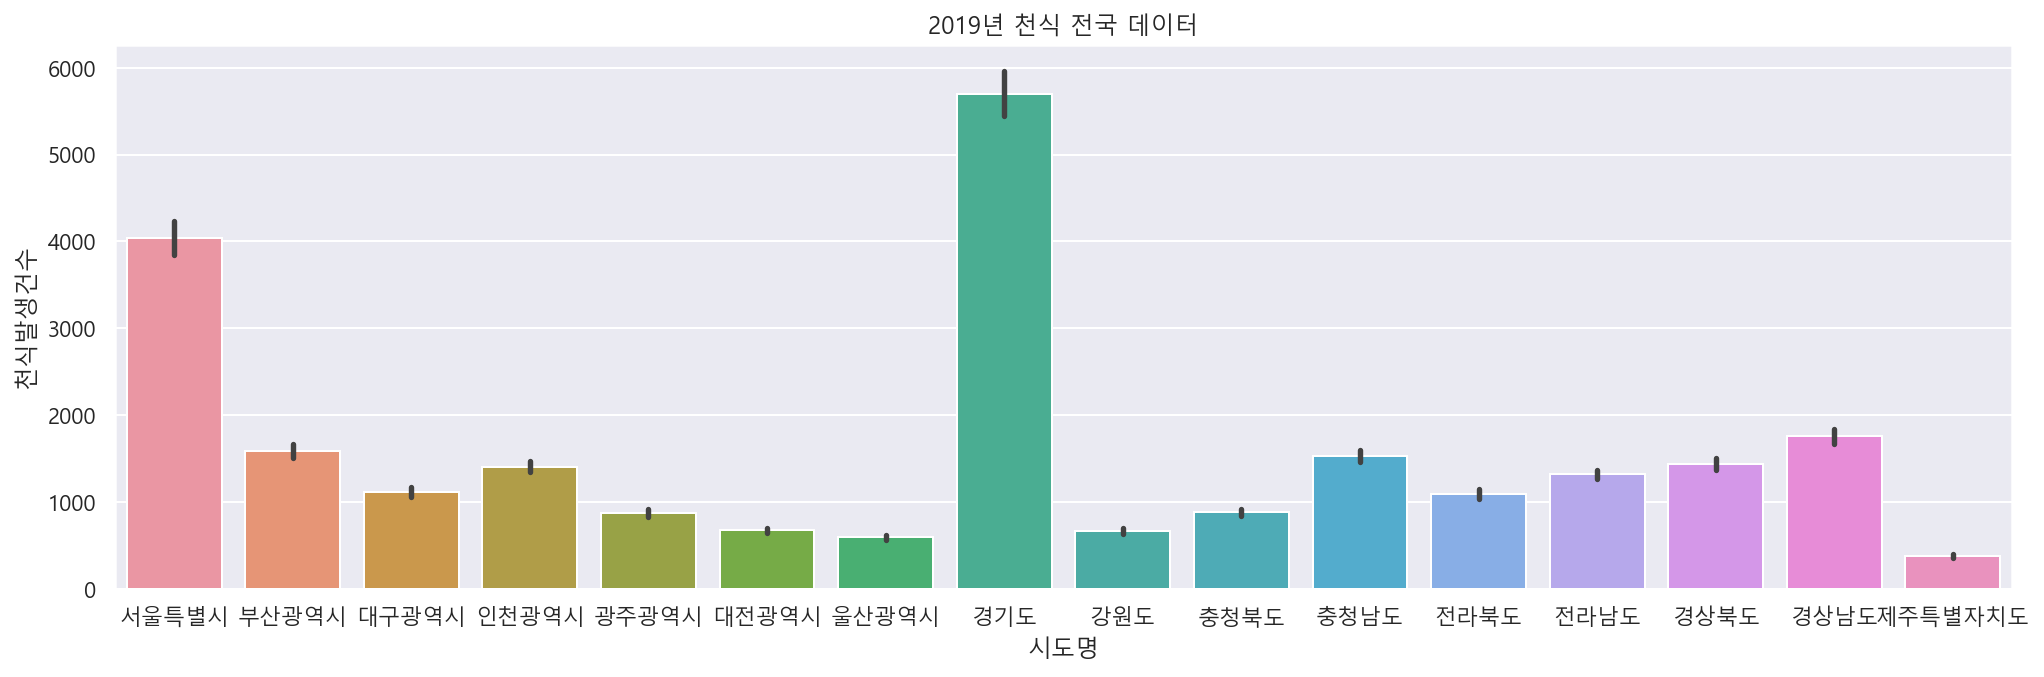

In [162]:
plt.figure(figsize=(17, 5))
plt.title("2019년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2019년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

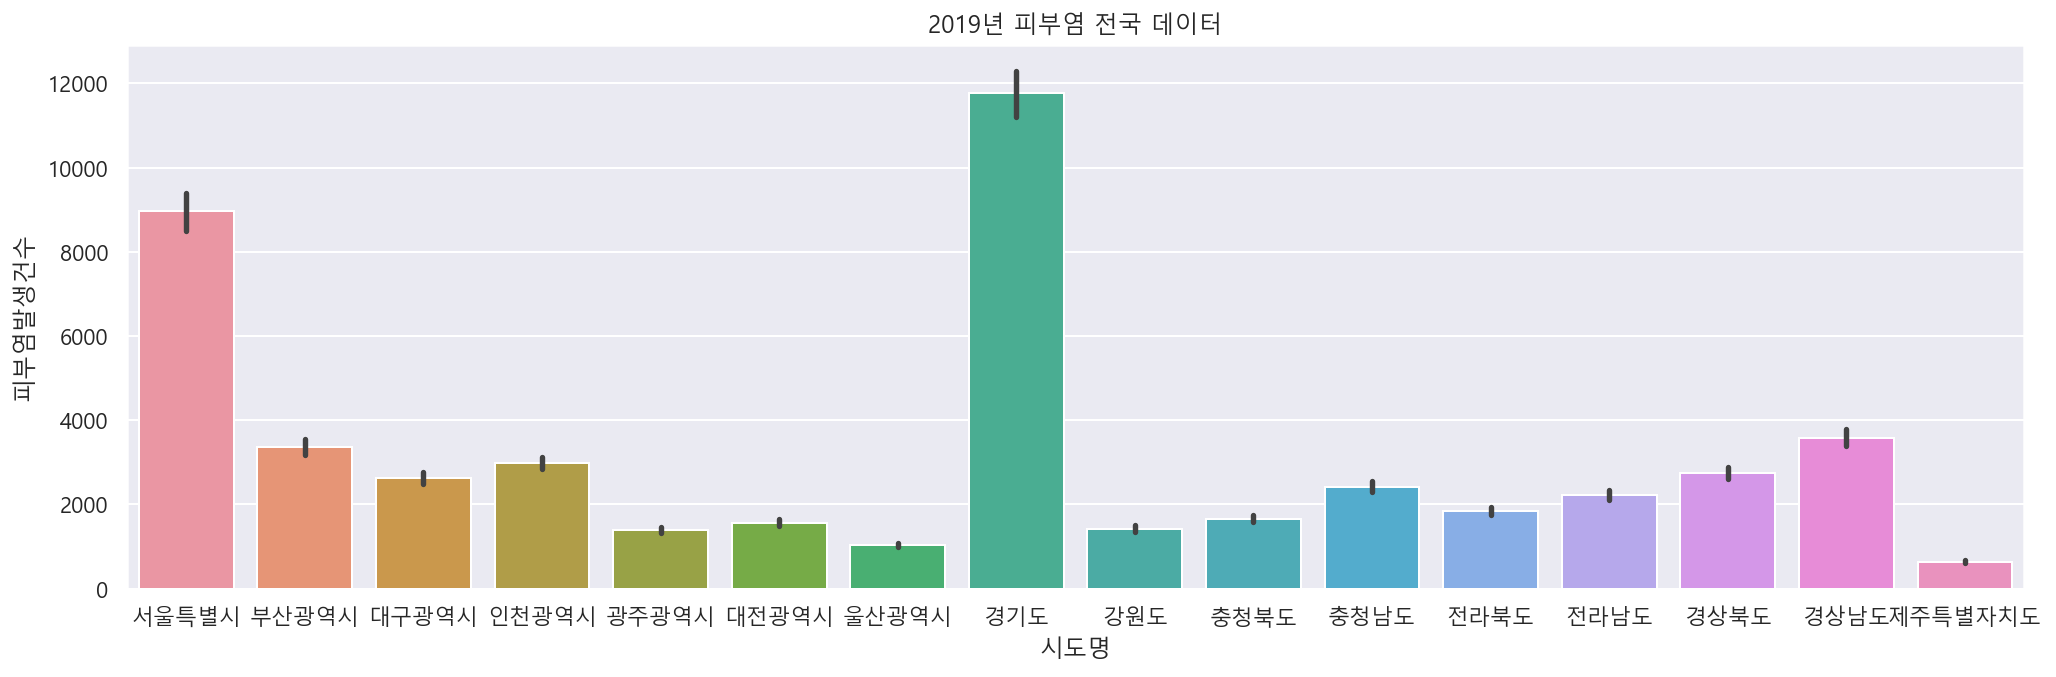

In [163]:
plt.figure(figsize=(17, 5))
plt.title("2019년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="피부염발생건수")

### 2020년 전국 데이터

<AxesSubplot:title={'center':'2020년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

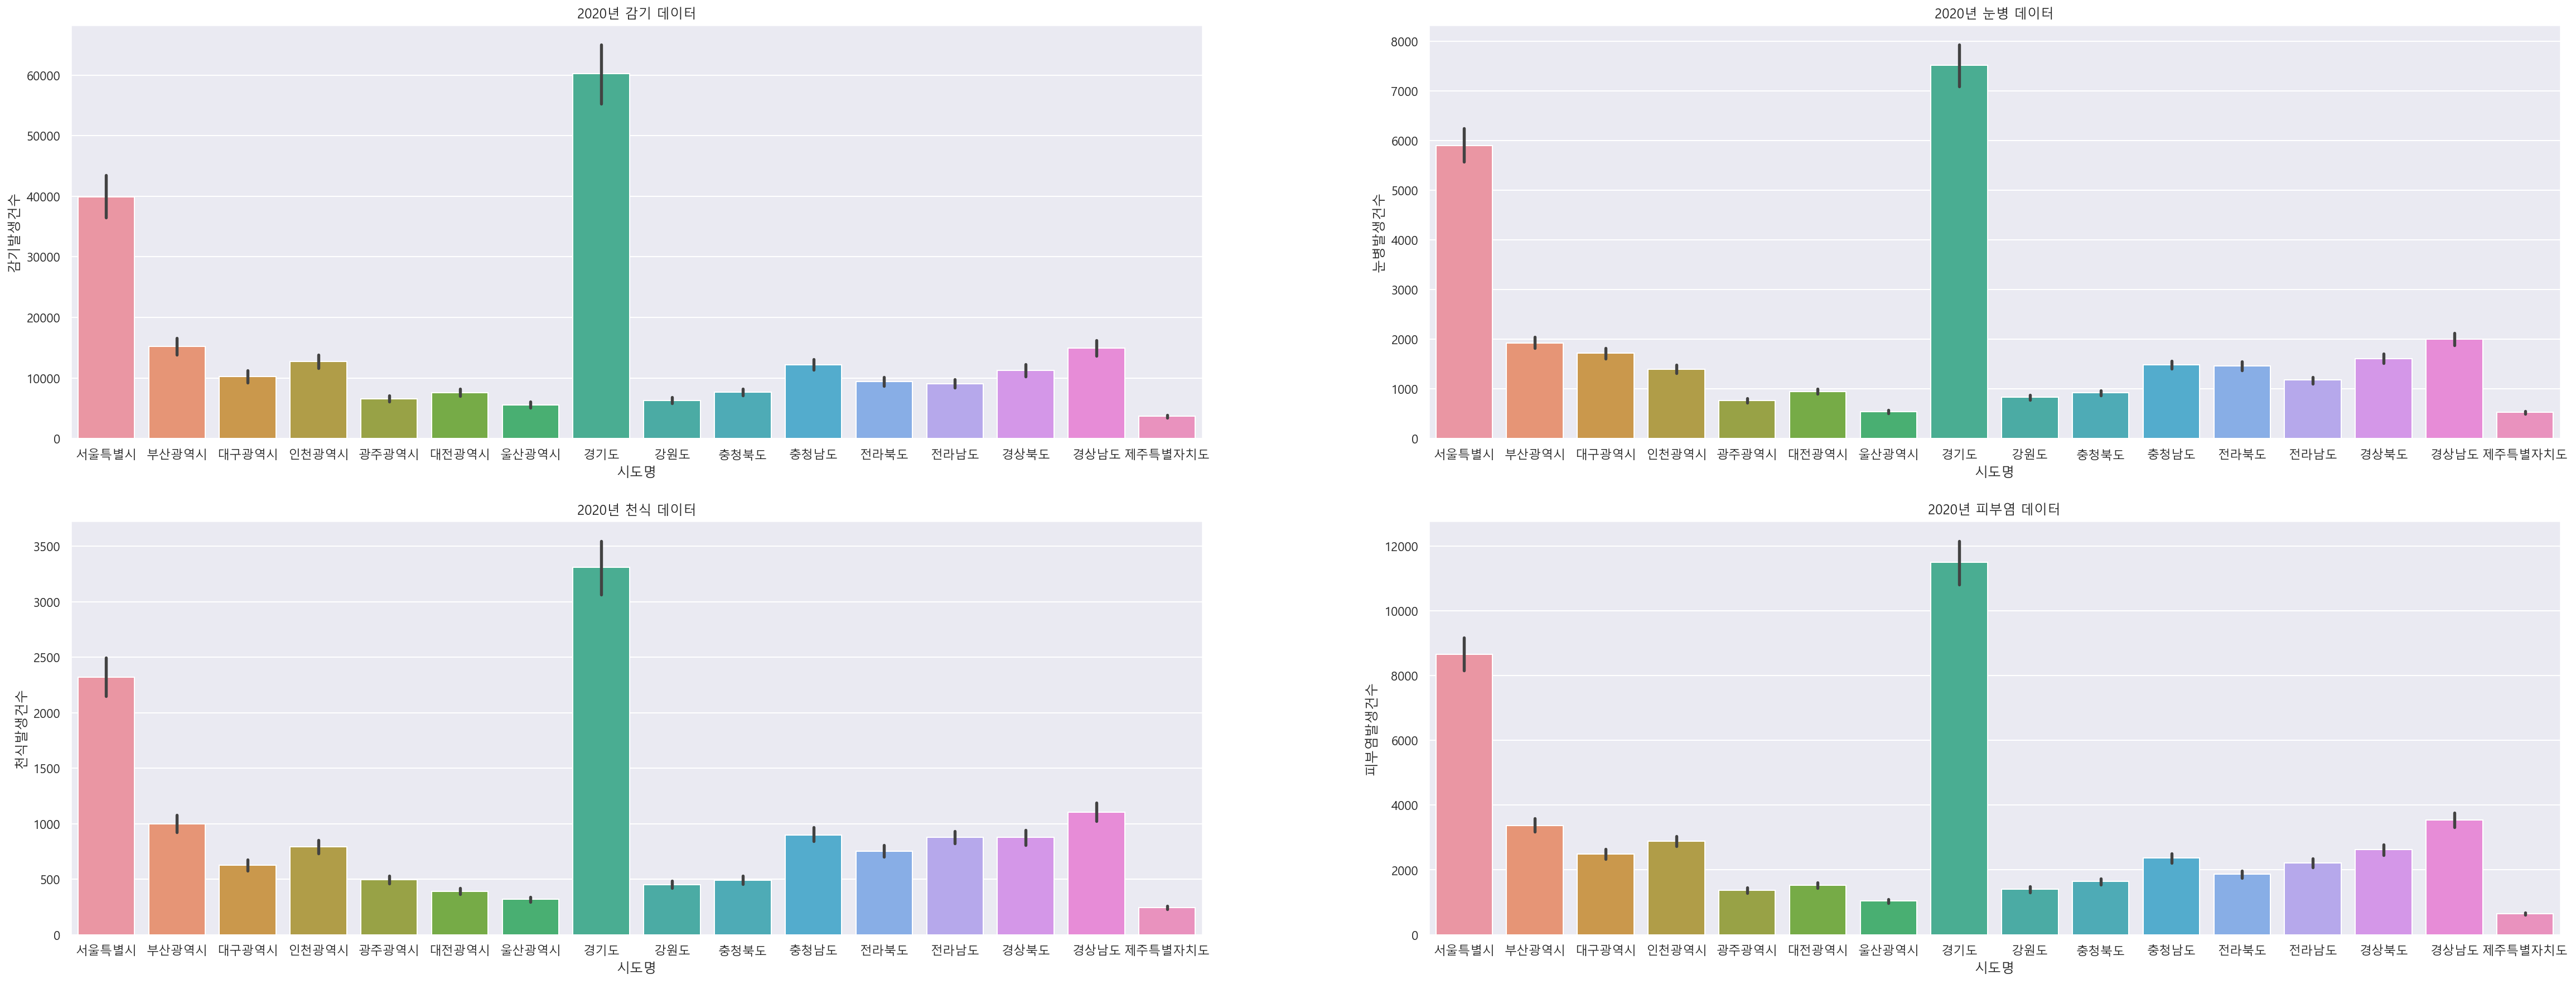

In [164]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2020년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2020년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2020년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2020년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2020년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

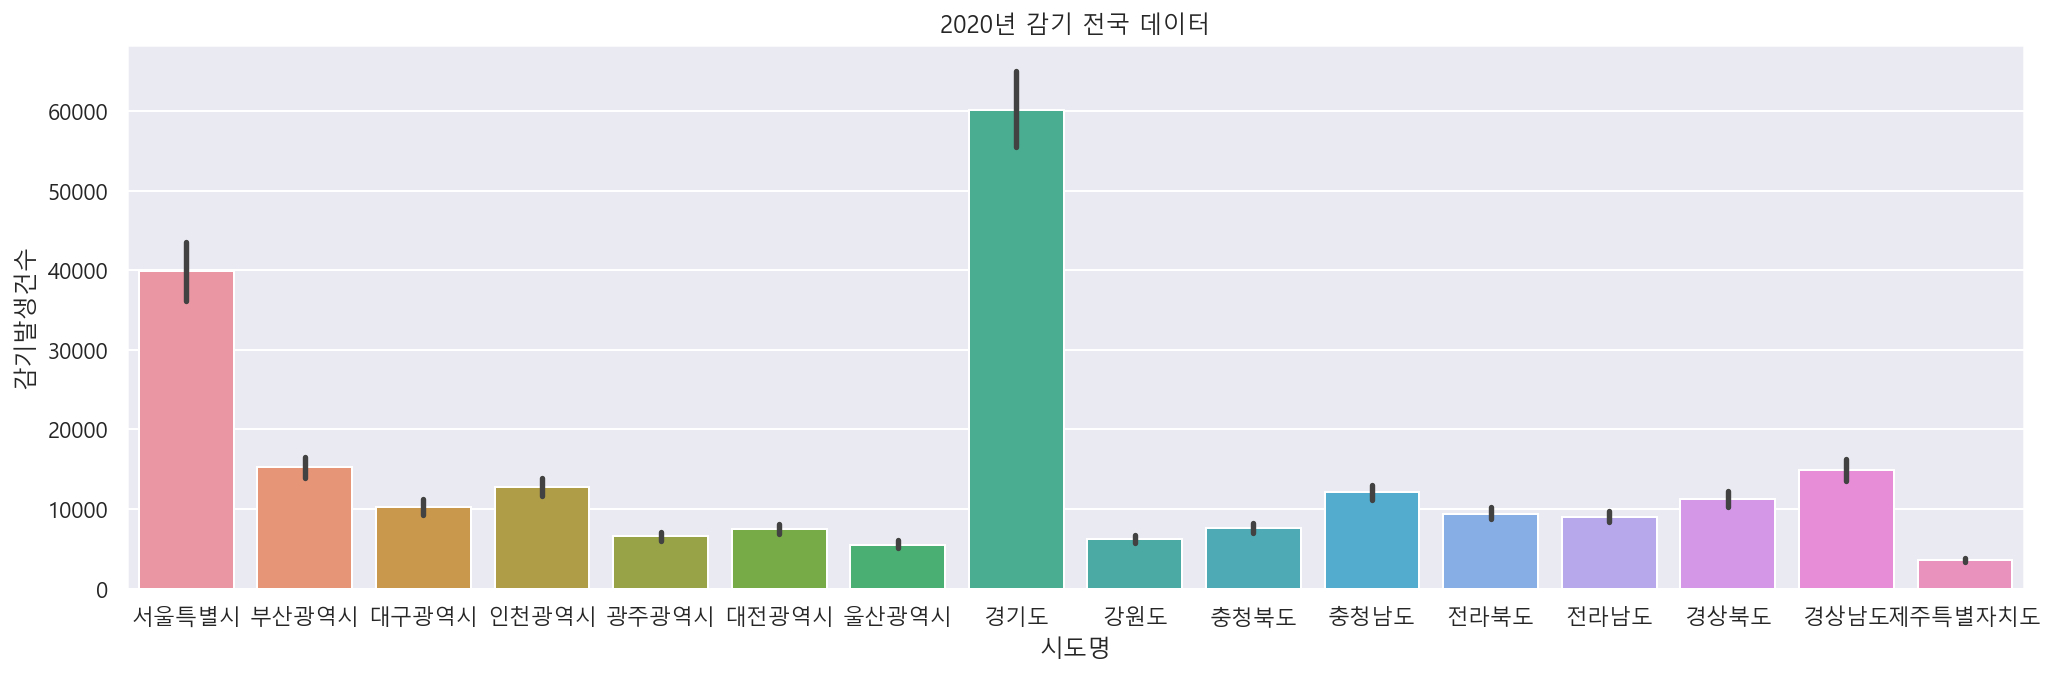

In [165]:
plt.figure(figsize=(17, 5))
plt.title("2020년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2020년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

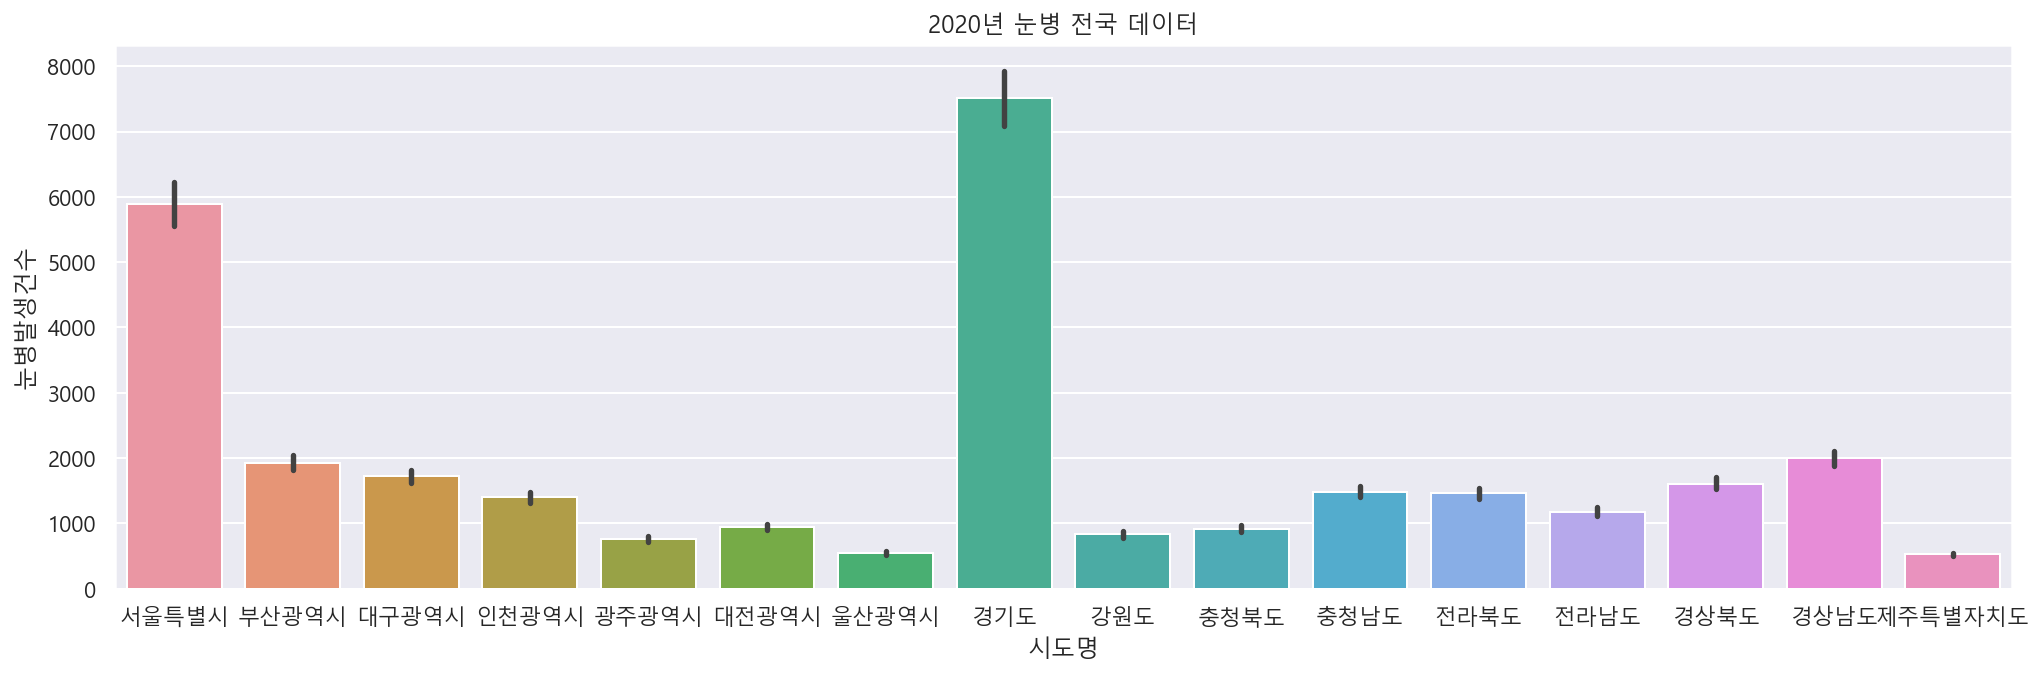

In [166]:
plt.figure(figsize=(17, 5))
plt.title("2020년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2020년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

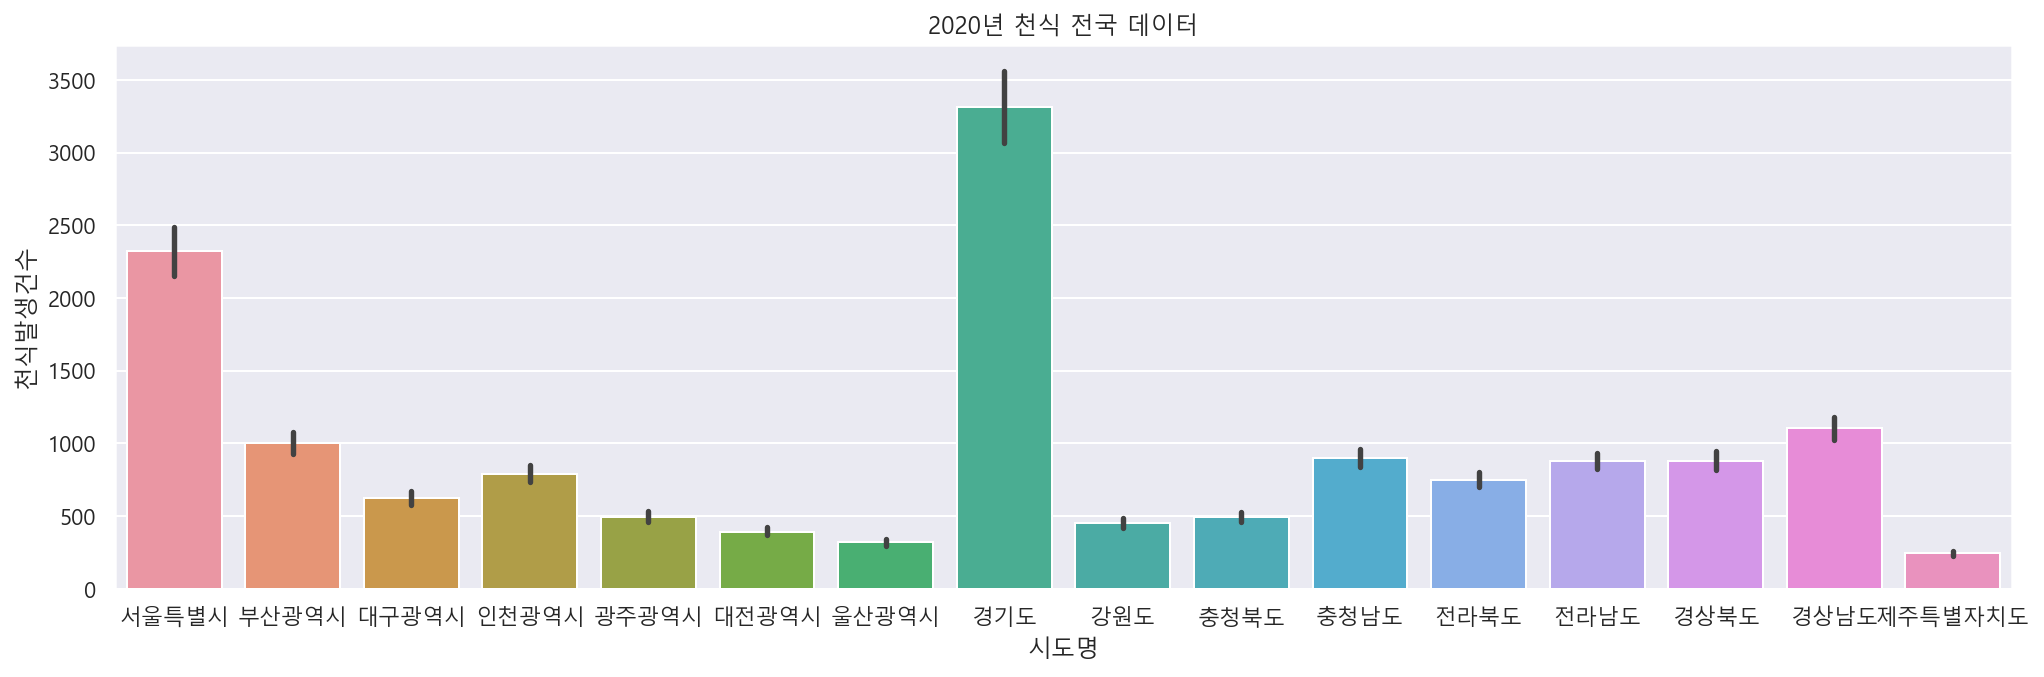

In [167]:
plt.figure(figsize=(17, 5))
plt.title("2020년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2020년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

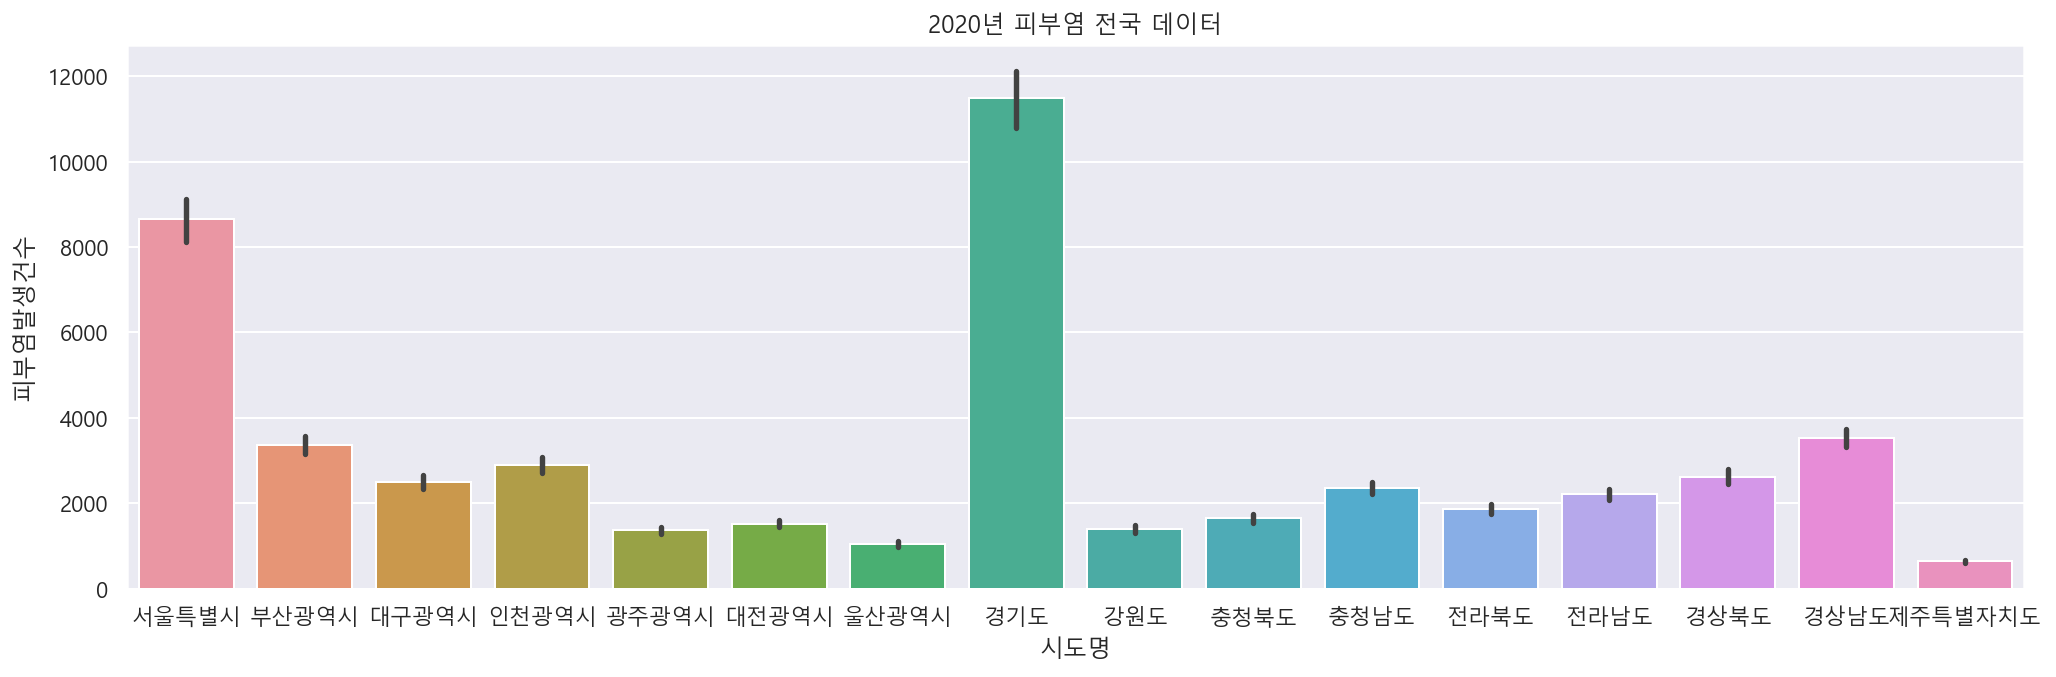

In [168]:
plt.figure(figsize=(17, 5))
plt.title("2020년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="피부염발생건수")

## 지역별 통합 데이터

<AxesSubplot:title={'center':'지역별 감기 통합 데이터'}, xlabel='지역명', ylabel='감기발생건수'>

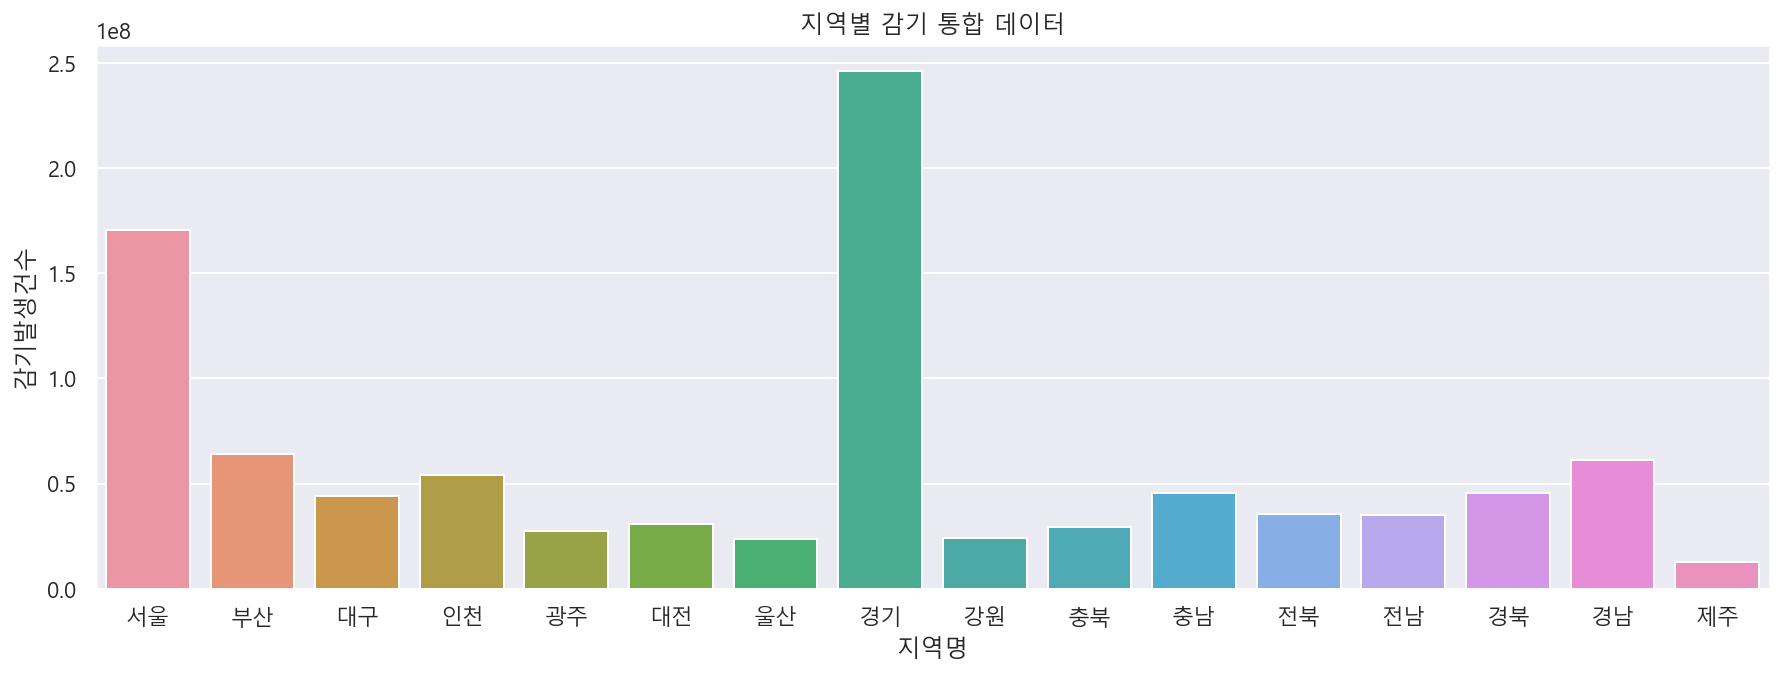

In [169]:
plt.figure(figsize=(15, 5))
plt.title("지역별 감기 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="감기발생건수")

<AxesSubplot:title={'center':'지역별 눈병 통합 데이터'}, xlabel='지역명', ylabel='눈병발생건수'>

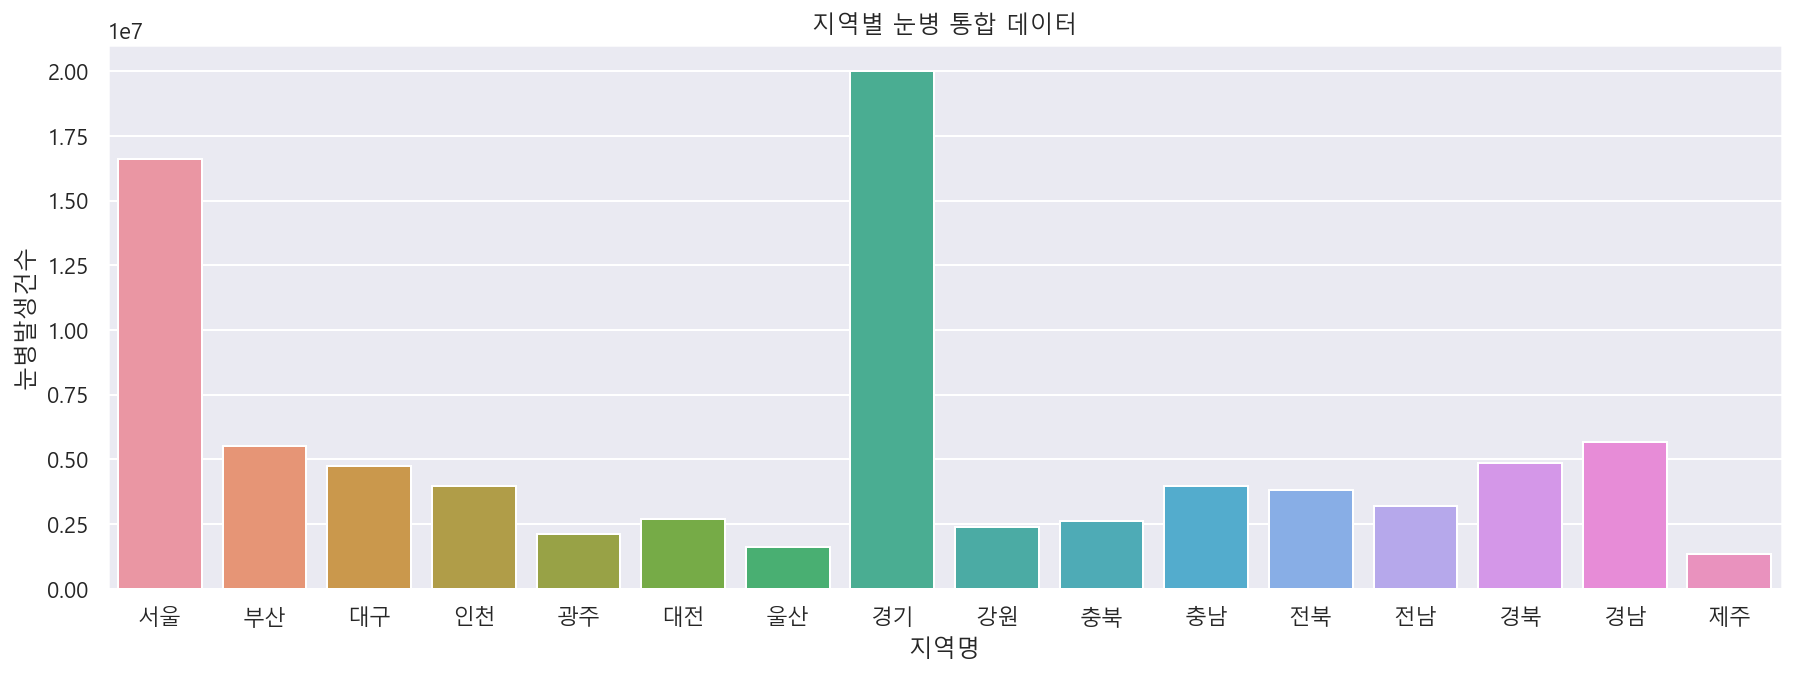

In [170]:
plt.figure(figsize=(15, 5))
plt.title("지역별 눈병 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="눈병발생건수")

<AxesSubplot:title={'center':'지역별 천식 통합 데이터'}, xlabel='지역명', ylabel='천식발생건수'>

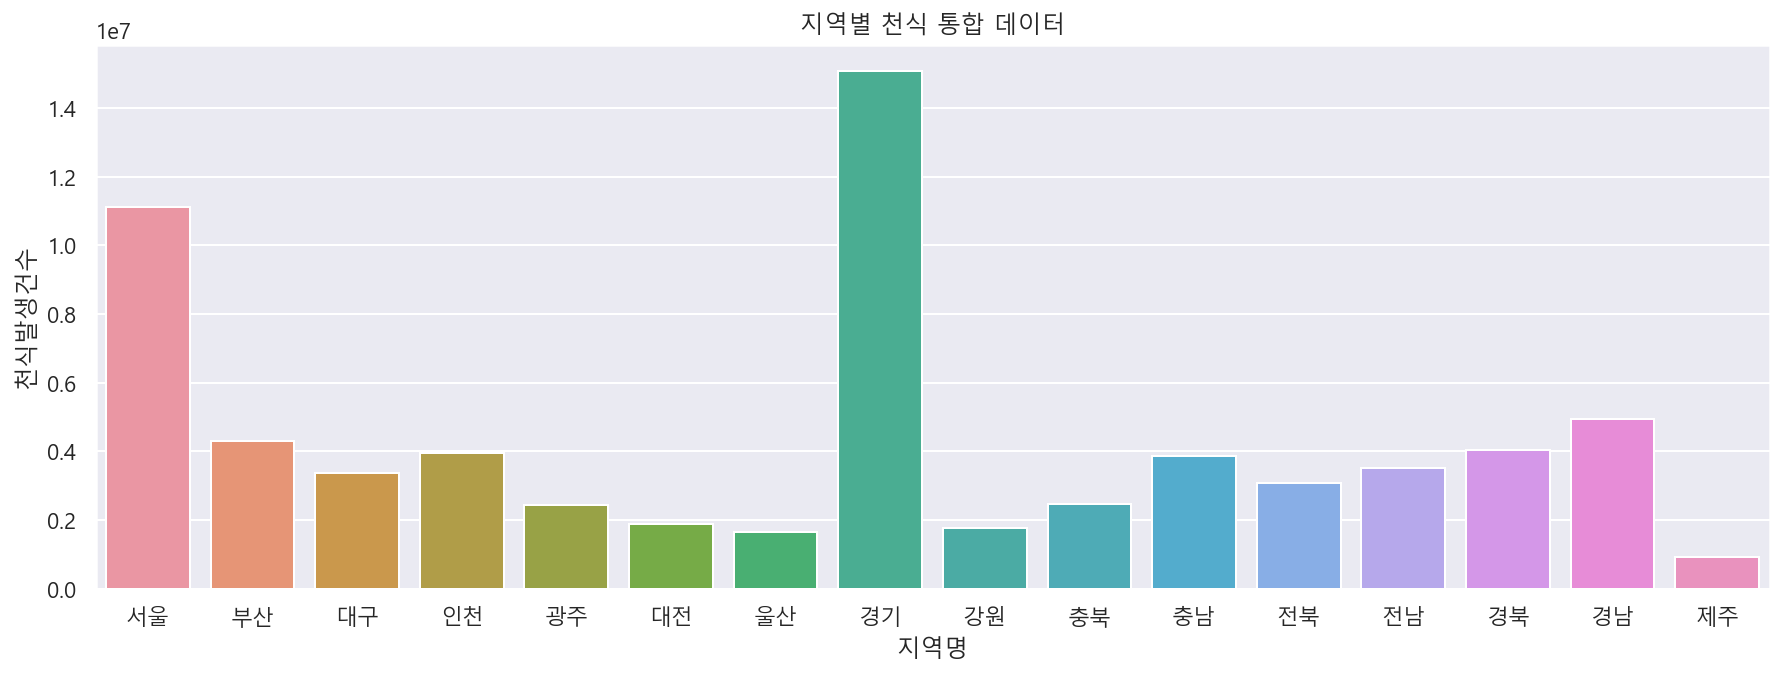

In [171]:
plt.figure(figsize=(15, 5))
plt.title("지역별 천식 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="천식발생건수")

<AxesSubplot:title={'center':'지역별 피부염 통합 데이터'}, xlabel='지역명', ylabel='피부염발생건수'>

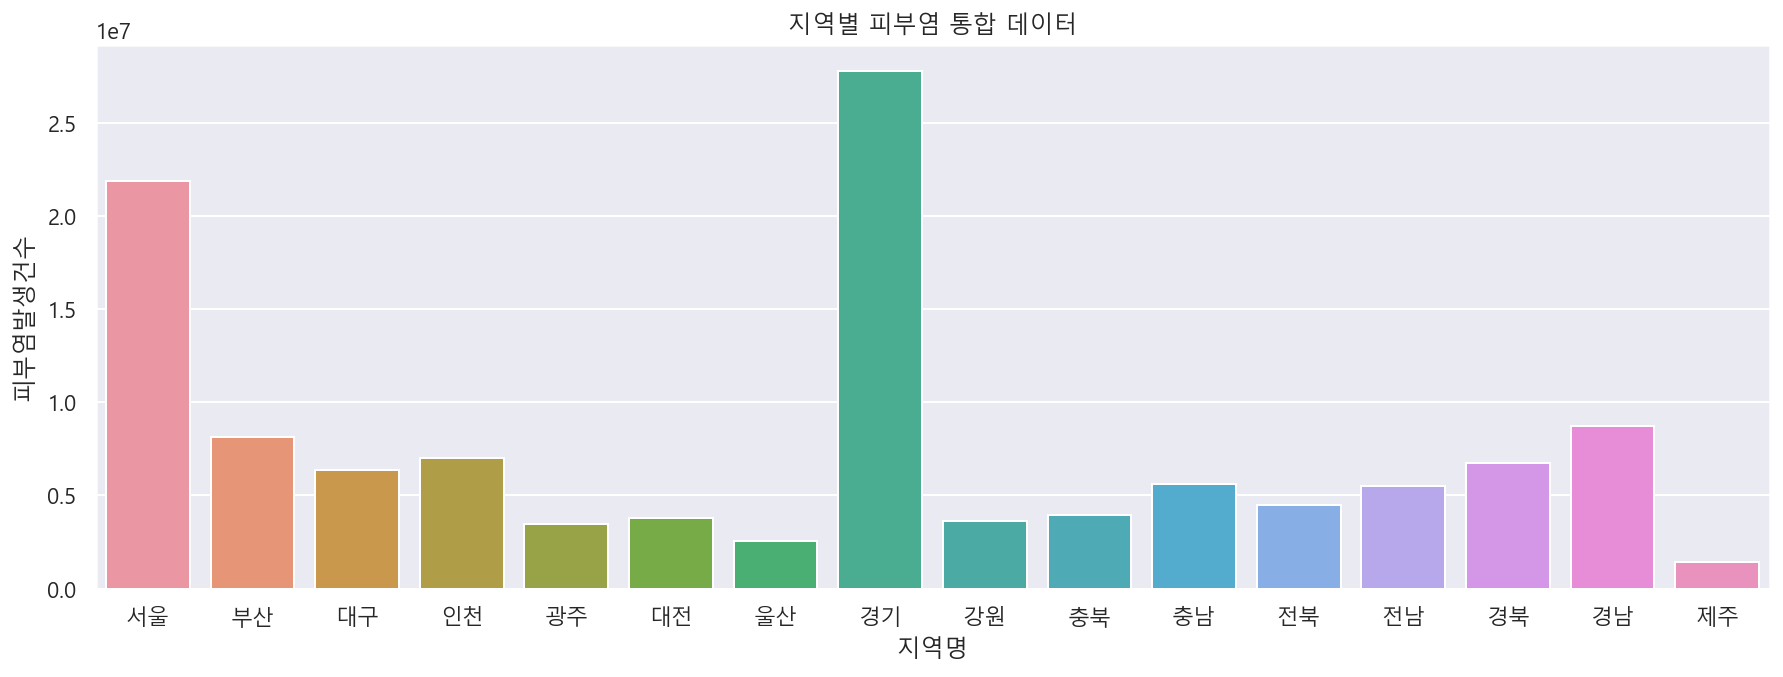

In [172]:
plt.figure(figsize=(15, 5))
plt.title("지역별 피부염 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="피부염발생건수")

## 연도별 전국 데이터

<AxesSubplot:title={'center':'연도별 전국 감기 통합 데이터'}, xlabel='연도', ylabel='감기발생건수'>

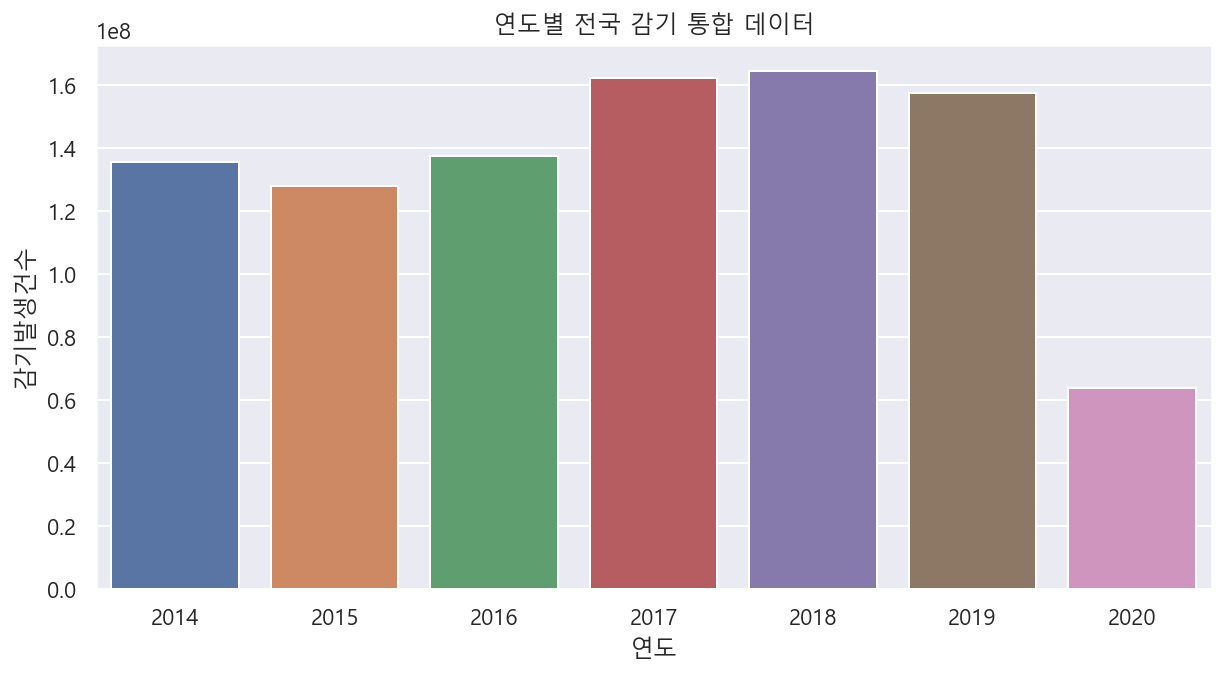

In [173]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 감기 통합 데이터")
sns.barplot(data=df_year, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'연도별 전국 눈병 통합 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

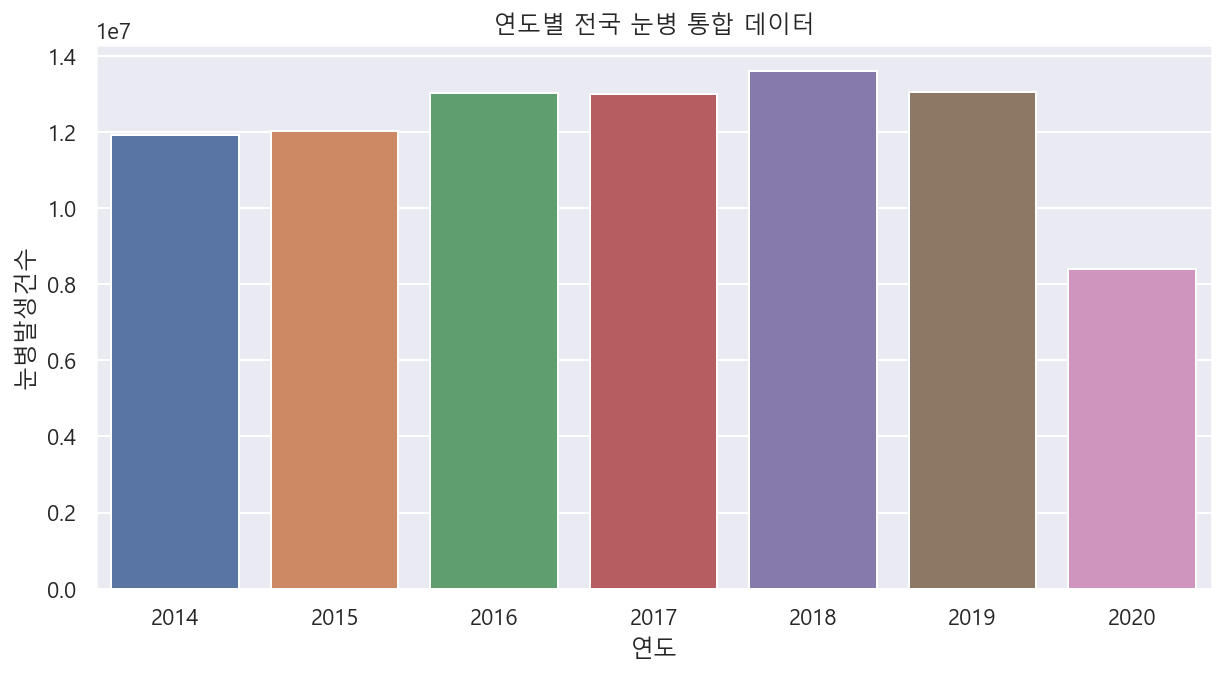

In [174]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 눈병 통합 데이터")
sns.barplot(data=df_year, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'연도별 전국 천식 통합 데이터'}, xlabel='연도', ylabel='천식발생건수'>

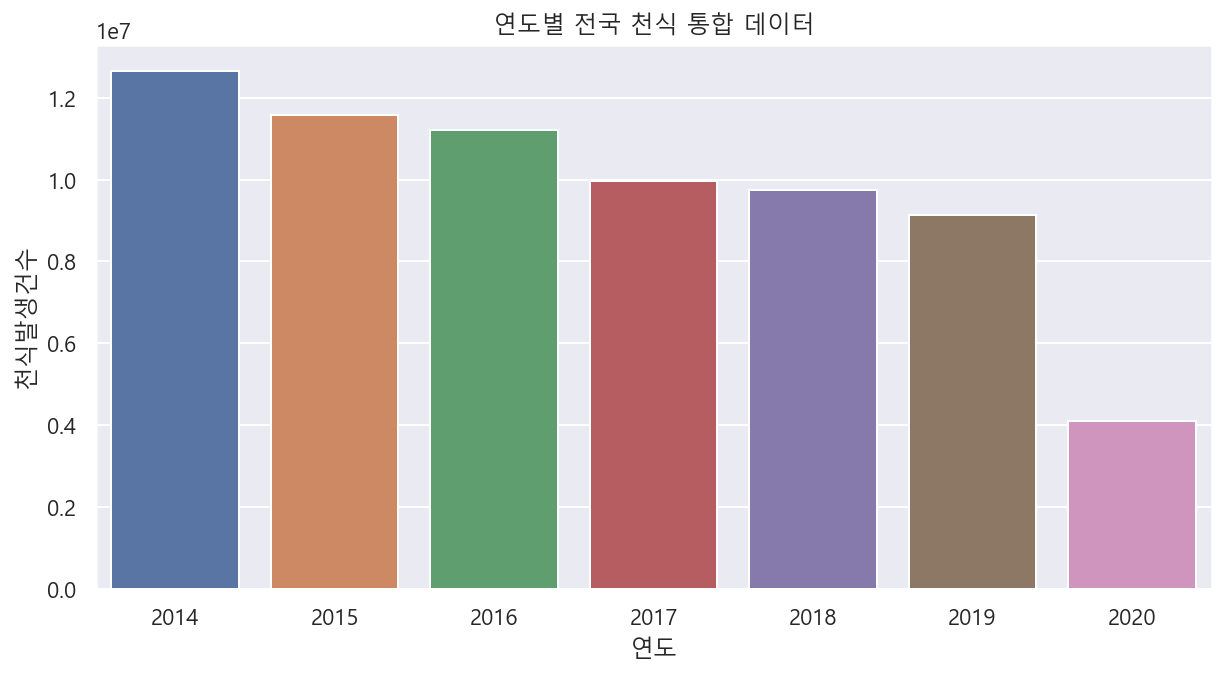

In [175]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 천식 통합 데이터")
sns.barplot(data=df_year, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'연도별 전국 피부염 통합 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

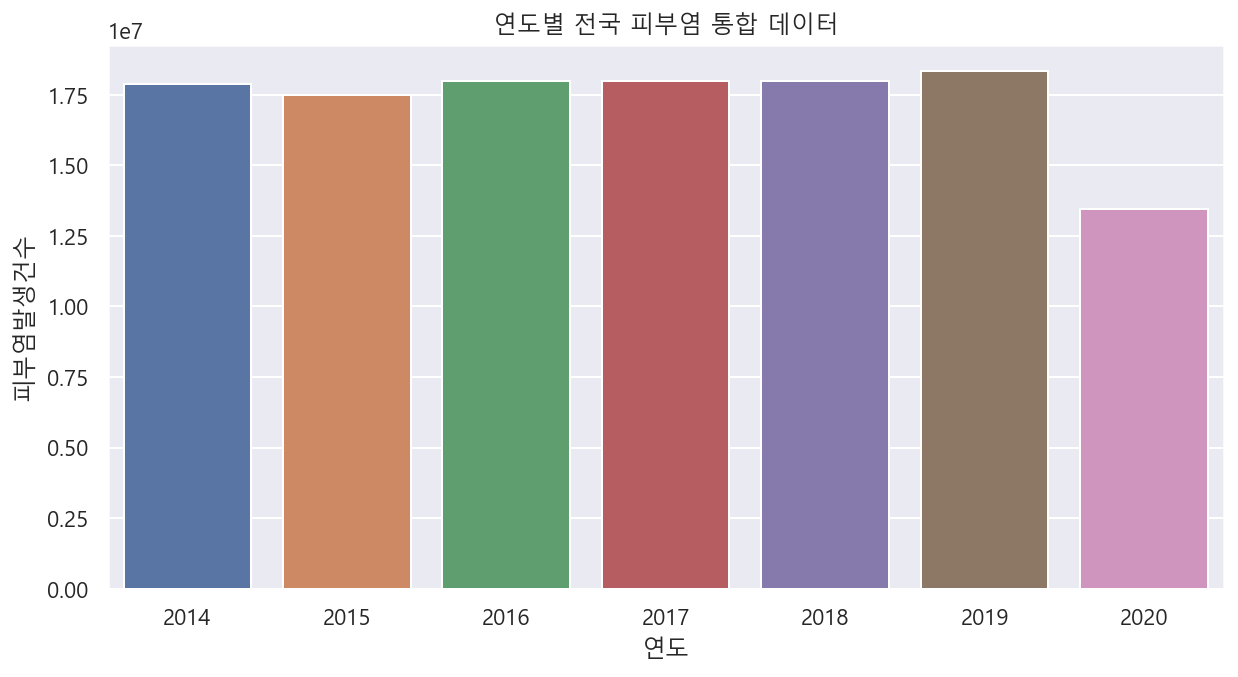

In [176]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 피부염 통합 데이터")
sns.barplot(data=df_year, x="연도", y="피부염발생건수")

## 지역별 연도 데이터

### 서울 연도별 데이터

<AxesSubplot:title={'center':'서울특별시 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

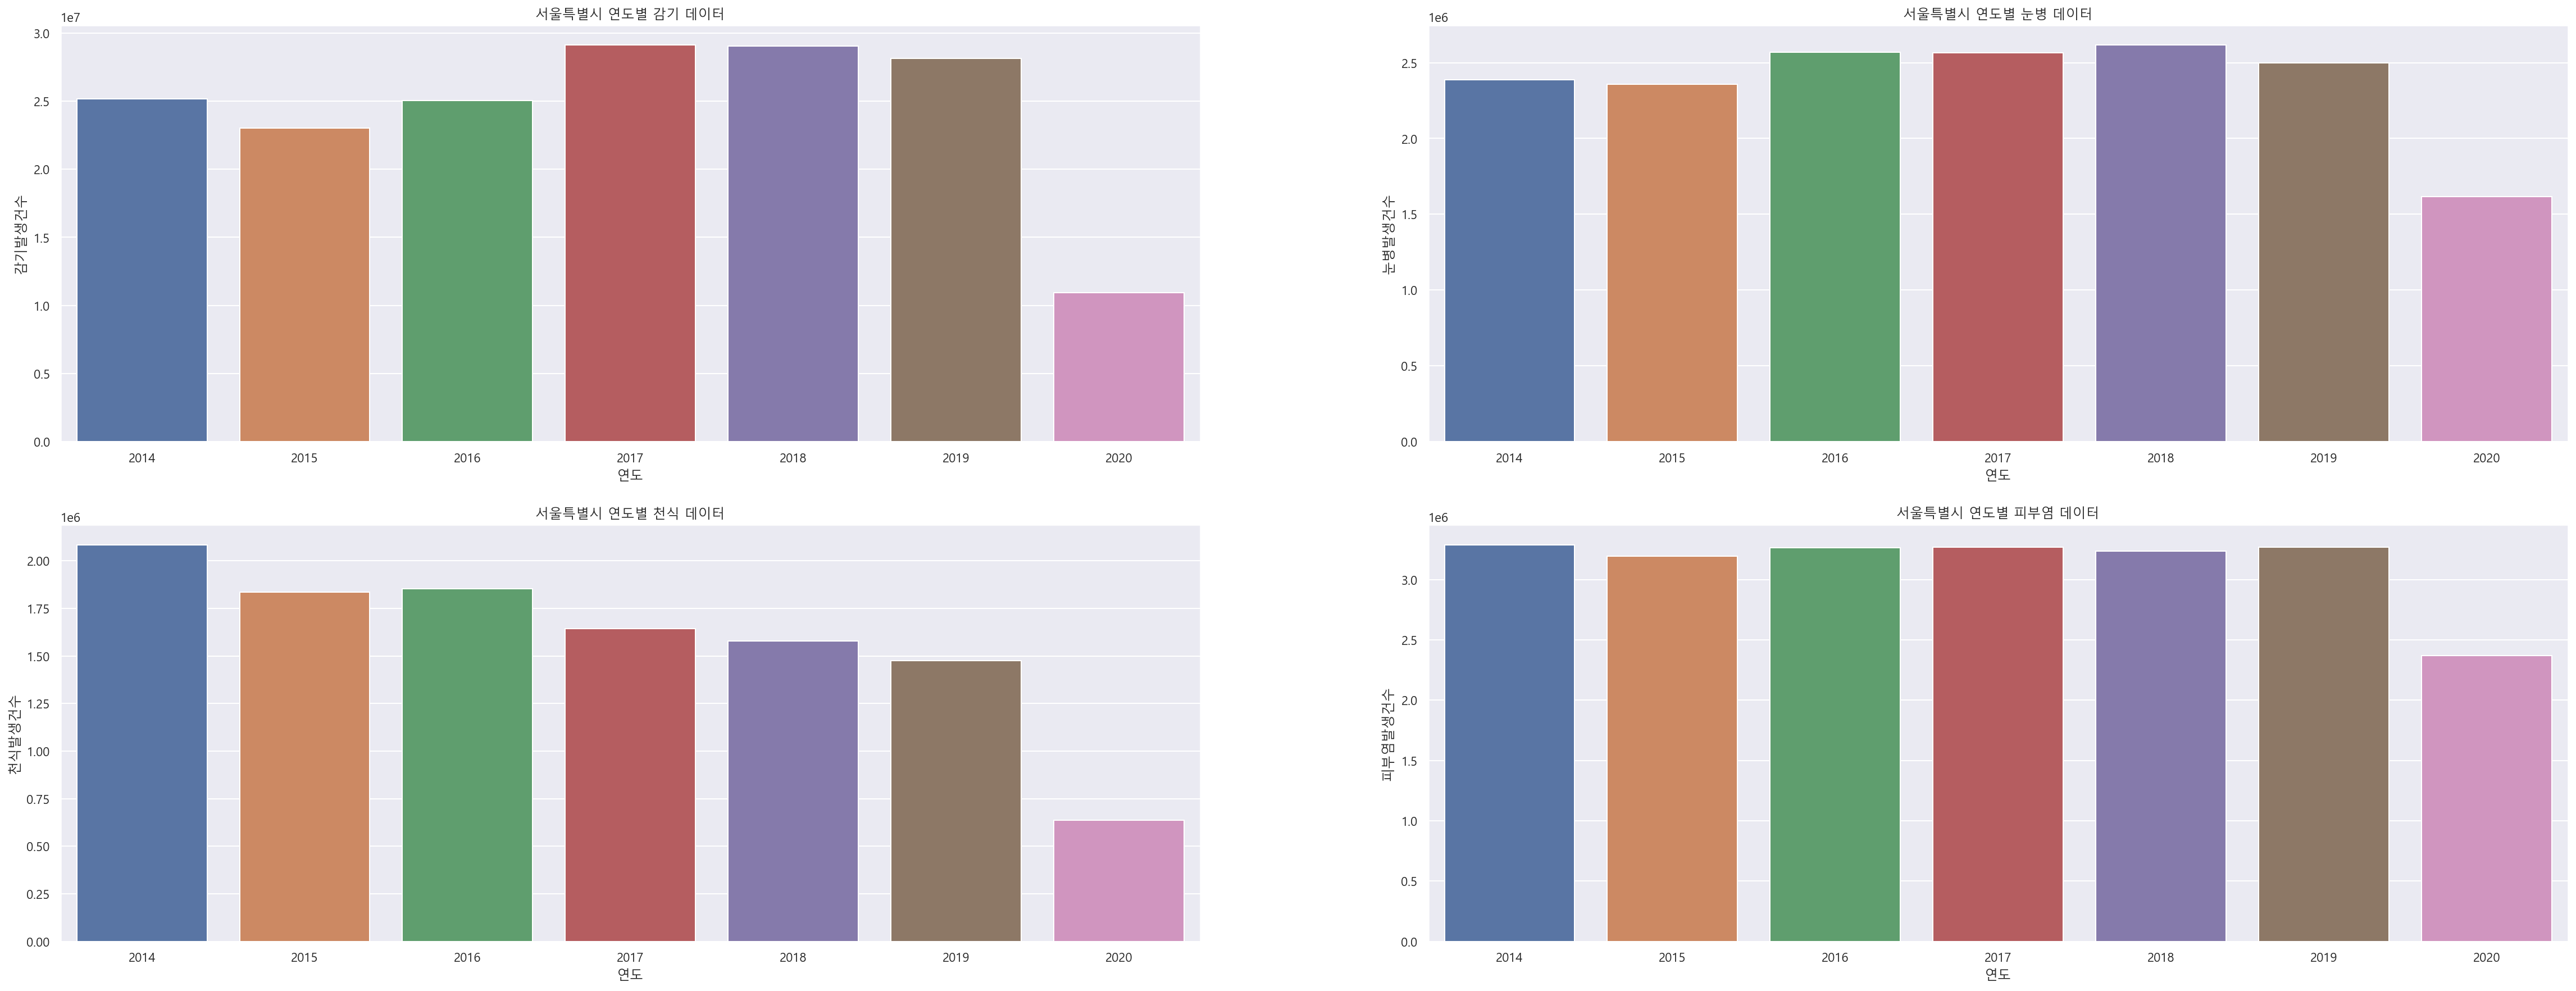

In [177]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("서울특별시 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("서울특별시 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("서울특별시 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("서울특별시 연도별 피부염 데이터")

sns.barplot(data=df_seoul, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_seoul, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_seoul, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_seoul, x="연도", y="피부염발생건수", ax=area04)

In [178]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 감기 데이터")
sns.barplot(data=df_seoul, x="연도", y="감기발생건수")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 눈병 데이터")
sns.barplot(data=df_seoul, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 천식 데이터")
sns.barplot(data=df_seoul, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 피부염 데이터")
sns.barplot(data=df_seoul, x="연도", y="피부염발생건수")

### 경기도 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경기도 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경기도 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경기도 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경기도 연도별 피부염 데이터")

sns.barplot(data=df_gyunggi, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gyunggi, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gyunggi, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gyunggi, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 감기 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 눈병 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 천식 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 피부염 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="피부염발생건수")

### 부산 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("부산 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("부산 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("부산 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("부산 연도별 피부염 데이터")

sns.barplot(data=df_busan, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_busan, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_busan, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_busan, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 감기 데이터")
sns.barplot(data=df_busan, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 눈병 데이터")
sns.barplot(data=df_busan, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 천식 데이터")
sns.barplot(data=df_busan, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 피부염 데이터")
sns.barplot(data=df_busan, x="연도", y="천식발생건수")

### 대구 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("대구 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("대구 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("대구 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("대구 연도별 피부염 데이터")

sns.barplot(data=df_daegu, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_daegu, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_daegu, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_daegu, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 감기 데이터")
sns.barplot(data=df_daegu, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 눈병 데이터")
sns.barplot(data=df_daegu, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 천식 데이터")
sns.barplot(data=df_daegu, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 피부염 데이터")
sns.barplot(data=df_daegu, x="연도", y="피부염발생건수")

### 인천 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("인천 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("인천 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("인천 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("인천 연도별 피부염 데이터")

sns.barplot(data=df_incheon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_incheon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_incheon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_incheon, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 감기 데이터")
sns.barplot(data=df_incheon, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 눈병 데이터")
sns.barplot(data=df_incheon, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 천식 데이터")
sns.barplot(data=df_incheon, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 피부염 데이터")
sns.barplot(data=df_incheon, x="연도", y="피부염발생건수")

### 광주 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("광주 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("광주 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("광주 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("광주 연도별 피부염 데이터")

sns.barplot(data=df_gwangju, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gwangju, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gwangju, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gwangju, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 감기 데이터")
sns.barplot(data=df_gwangju, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 눈병 데이터")
sns.barplot(data=df_gwangju, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 천식 데이터")
sns.barplot(data=df_gwangju, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 피부염 데이터")
sns.barplot(data=df_gwangju, x="연도", y="피부염발생건수")

### 대전 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("대전 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("대전 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("대전 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("대전 연도별 피부염 데이터")

sns.barplot(data=df_daejeon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_daejeon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_daejeon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_daejeon, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 감기 데이터")
sns.barplot(data=df_daejeon, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 눈병 데이터")
sns.barplot(data=df_daejeon, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 천식 데이터")
sns.barplot(data=df_daejeon, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 피부염 데이터")
sns.barplot(data=df_daejeon, x="연도", y="피부염발생건수")

### 울산 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("울산 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("울산 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("울산 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("울산 연도별 피부염 데이터")

sns.barplot(data=df_ulsan, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ulsan, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ulsan, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ulsan, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 감기 데이터")
sns.barplot(data=df_ulsan, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 눈병 데이터")
sns.barplot(data=df_ulsan, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 천식 데이터")
sns.barplot(data=df_ulsan, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 피부염 데이터")
sns.barplot(data=df_ulsan, x="연도", y="피부염발생건수")

### 강원도 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("강원도 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("강원도 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("강원도 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("강원도 연도별 피부염 데이터")

sns.barplot(data=df_gangwon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gangwon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gangwon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gangwon, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 감기 데이터")
sns.barplot(data=df_gangwon, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 눈병 데이터")
sns.barplot(data=df_gangwon, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 천식 데이터")
sns.barplot(data=df_gangwon, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 피부염 데이터")
sns.barplot(data=df_gangwon, x="연도", y="피부염발생건수")

### 충북 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("충북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("충북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("충북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("충북 연도별 피부염 데이터")

sns.barplot(data=df_ccbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ccbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ccbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ccbuk, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 감기 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 눈병 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 천식 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 피부염 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="피부염발생건수")

### 충남 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("충남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("충남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("충남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("충남 연도별 피부염 데이터")

sns.barplot(data=df_ccnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ccnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ccnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ccnam, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 감기 데이터")
sns.barplot(data=df_ccnam, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 눈병 데이터")
sns.barplot(data=df_ccnam, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 천식 데이터")
sns.barplot(data=df_ccnam, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 피부염 데이터")
sns.barplot(data=df_ccnam, x="연도", y="피부염발생건수")

### 전북 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("전북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("전북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("전북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("전북 연도별 피부염 데이터")

sns.barplot(data=df_jlbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jlbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jlbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jlbuk, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 감기 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 눈병 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 천식 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 피부염 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="피부염발생건수")

### 전남 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("전남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("전남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("전남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("전남 연도별 피부염 데이터")

sns.barplot(data=df_jlnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jlnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jlnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jlnam, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 감기 데이터")
sns.barplot(data=df_jlnam, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 눈병 데이터")
sns.barplot(data=df_jlnam, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 천식 데이터")
sns.barplot(data=df_jlnam, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 피부염 데이터")
sns.barplot(data=df_jlnam, x="연도", y="피부염발생건수")

### 경북 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경북 연도별 피부염 데이터")

sns.barplot(data=df_gsbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gsbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gsbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gsbuk, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 감기 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 눈병 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 천식 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 피부염 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="피부염발생건수")

### 경남 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경남 연도별 피부염 데이터")

sns.barplot(data=df_gsnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gsnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gsnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gsnam, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 감기 데이터")
sns.barplot(data=df_gsnam, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 눈병 데이터")
sns.barplot(data=df_gsnam, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 천식 데이터")
sns.barplot(data=df_gsnam, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 피부염 데이터")
sns.barplot(data=df_gsnam, x="연도", y="피부염발생건수")

### 제주 연도별 데이터

In [ ]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("제주 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("제주 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("제주 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("제주 연도별 피부염 데이터")

sns.barplot(data=df_jeju, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jeju, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jeju, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jeju, x="연도", y="피부염발생건수", ax=area04)

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 감기 데이터")
sns.barplot(data=df_jeju, x="연도", y="감기발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 눈병 데이터")
sns.barplot(data=df_jeju, x="연도", y="눈병발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 천식 데이터")
sns.barplot(data=df_jeju, x="연도", y="천식발생건수")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 피부염 데이터")
sns.barplot(data=df_jeju, x="연도", y="피부염발생건수")

## 질의 그래프